## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Data Quality and Customer Understanding

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

In [1]:
# Imports for this part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import scipy.stats as stats

#### Exploratory Data Analysis (EDA)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.

##### EDA for df_customer

**Metrics to measure the data quality**

• *Completeness*:
Data values are present<br><br>
• *Consistency*:
Data satisfies constraints (format, allowable ranges and values, domain rules)<br><br>
• *Correctness*:
Values are true and unbiased with respect to their real-world state<br><br>
• *Uniqueness*:
Records representing a single customer are not replicated<br><br>
• *Timeliness*:
Data is up-to-date to their real-world state for the task in hand<br><br>
• *Stability*:
Data inherent concepts and statistics are comparable among sources over time<br><br>
• *Relevance*:
Data is useful for the task<br><br>
• *Contextualization*:
Data is annotated with the acquisition context, their meaning and semantics<br>
--> Already fullfilled. See descriptions above<br><br>

<u>Metrics that should be used in general, but that I cannot check in this assignment</u>

• *Trustworthiness*:
Data can be trusted based on the reputation of the stakeholders involved in data acquisition

In [2]:
cols_to_use = pd.read_csv("ABC_df_customer.csv", nrows=0) 
cols_to_use = cols_to_use.columns.difference(["ADDRESS_ID", "SOCIAL_SECURITY_NUMBER"]).tolist()

# Loading in the file
df_customer = pd.read_csv("ABC_df_customer.csv", index_col=0, usecols=cols_to_use)

# Looking at each file in order to see overall structures
df_customer.head()

/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_24548/2041133245.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer = pd.read_csv("ABC_df_customer.csv", index_col=0, usecols=cols_to_use)


INDIVIDUAL_ID CUST_ORIG_DATE DATE_OF_BIRTH CUST_START_DATE  \
0   2.213000e+11     2018-12-09    1978-06-23      2018-12-09   
1   2.213001e+11     2018-01-02    1950-05-30      2018-01-02   
2   2.213007e+11     2009-09-23    1967-07-07      2009-09-23   
3   2.213016e+11     2022-07-25    1969-05-25      2022-07-25   
4   2.213016e+11     2006-10-11    1972-09-25      2006-10-11   

   CURR_ANN_AMT_CAR  CURR_ANN_AMT_HEALTH  CURR_ANN_AMT_HOUSE  
0       1318.877997           517.999317                 411  
1       1474.199182           558.417779                 414  
2       1467.375112           701.649310                 442  
3       1492.409561           401.517490                 463  
4       1284.633494           772.857222                 366

Note: While loading in the file, I already disregard two columns to be more memory-efficient: "ADDRESS_ID" and "SOCIAL_SECURITY_NUMBER". If the ADDRESS_ID were a zip code it would have been interesting to look at potential geographical influences of features, but this is simply an identifier, i.e., something without information. Further, it does not act as a key (same goes for SOCIAL_SECURITY_NUMBER), as the other two datasets do not contain those columns. Thus, they are not relevant for any analysis (metric: **Relevance**)

In [3]:
df_customer.shape

(2303124, 7)

This dataset has 2,303,124 rows and 7 columns.

In [4]:
# Checking for missing values
df_customer.isna().sum()

INDIVIDUAL_ID              1
CUST_ORIG_DATE             0
DATE_OF_BIRTH              0
CUST_START_DATE        91213
CURR_ANN_AMT_CAR           0
CURR_ANN_AMT_HEALTH        0
CURR_ANN_AMT_HOUSE         0
dtype: int64

In oder to assure **completeness**, I have to handle all missing values. This is also because machine learning algorithms dont support missing values. I start by looking at the column with a missing entry in INDIVIDUAL_ID: 

In [5]:
df_customer[df_customer.INDIVIDUAL_ID.isna()]

INDIVIDUAL_ID CUST_ORIG_DATE DATE_OF_BIRTH CUST_START_DATE  \
1219186            NaN     2015-03-24    1985-03-05      2015-03-24   

         CURR_ANN_AMT_CAR  CURR_ANN_AMT_HEALTH  CURR_ANN_AMT_HOUSE  
1219186       1160.852375           639.259321                 328

As this is only one column and covers both, the missing value for INDIVIDUAL_ID and ADDRESS_ID, i can simply drop this row. This is further supported by the fact that INDIVIDUAL_ID is the key column for future joins with the other tables.

In [6]:
df_customer_clean = df_customer.dropna(subset=["INDIVIDUAL_ID"]).reset_index(drop=True)

Note: I will address the 91,213 missing values in CUST_START_DATE later.

Next, I will look if there are duplicates in the dataset to assure **uniqueness**:

In [7]:
df_customer_clean[df_customer_clean.duplicated()]

Empty DataFrame
Columns: [INDIVIDUAL_ID, CUST_ORIG_DATE, DATE_OF_BIRTH, CUST_START_DATE, CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, CURR_ANN_AMT_HOUSE]
Index: []

Thus, there are no overall duplicates, but maybe for a subset:

In [8]:
df_customer_clean.INDIVIDUAL_ID.value_counts()

2.213017e+11    2
2.213003e+11    2
2.213028e+11    2
2.213003e+11    2
2.213033e+11    2
               ..
2.213013e+11    1
2.213012e+11    1
2.213016e+11    1
2.213015e+11    1
2.213016e+11    1
Name: INDIVIDUAL_ID, Length: 2280320, dtype: int64

In [9]:
columns = ["INDIVIDUAL_ID", "CUST_ORIG_DATE", "DATE_OF_BIRTH", "CUST_START_DATE"]
df_customer_clean[df_customer_clean.duplicated(subset = columns)]

INDIVIDUAL_ID CUST_ORIG_DATE DATE_OF_BIRTH CUST_START_DATE  \
2280320   2.213003e+11     2007-07-13    1967-07-07             NaN   
2280321   2.213002e+11     2005-09-11    1967-07-07             NaN   
2280322   2.213030e+11     2013-11-06    1968-09-26             NaN   
2280323   2.213031e+11     2005-09-11    1955-12-31             NaN   
2280324   2.213030e+11     2016-04-28    1967-07-07             NaN   
...                ...            ...           ...             ...   
2303118   2.213003e+11     2014-02-15    1967-07-07             NaN   
2303119   2.213031e+11     2022-02-16    1965-05-26             NaN   
2303120   2.213013e+11     2019-08-16    1967-07-07             NaN   
2303121   2.213021e+11     2005-09-11    1948-10-31             NaN   
2303122   2.213025e+11     2008-09-10    1981-04-22             NaN   

         CURR_ANN_AMT_CAR  CURR_ANN_AMT_HEALTH  CURR_ANN_AMT_HOUSE  
2280320       1274.218057           635.898519                 400  
2280321       1523.294382           618.230919                 478  
2280322       1279.222549           289.516368                 390  
2280323       1664.899367           858.397129                 512  
2280324       1485.209558           684.090637                 437  
...                   ...                  ...                 ...  
2303118       1361.290041           623.368014                 426  
2303119       1563.921158           997.482828                 507  
2303120       1128.048444           393.819352                 300  
2303121       1380.204016           556.785305                 424  
2303122       1348.650555           294.226518                 408  

[22803 rows x 7 columns]

Here, I can see that there are 22,803 duplicates for the subset ["INDIVIDUAL_ID", "ADDRESS_ID", "CUST_ORIG_DATE", "DATE_OF_BIRTH", "SOCIAL_SECURITY_NUMBER", "CUST_START_DATE"]. Thus, I can simply groub by that subset take the mean of the missing three features individually:

In [10]:
# In order to be not affected by the missing values, we will replace the rows with missing values in CUST_START_DATE by "-1" and then convert it back to NaN after the grouping
df_customer_clean["CUST_START_DATE"] = df_customer_clean["CUST_START_DATE"].fillna(-1)

# Selecting a subset of columns first
df_customer_clean = df_customer_clean.groupby(columns).mean().reset_index()

# Converting the CUSTOMER_START_DATE back to NaN
df_customer_clean["CUST_START_DATE"] = df_customer_clean["CUST_START_DATE"].replace(-1, np.nan)

Now, the metric **uniqueness** is satisfied.

In [11]:
# Looking at basic statistics in the file
df_customer_clean.describe()

INDIVIDUAL_ID  CURR_ANN_AMT_CAR  CURR_ANN_AMT_HEALTH  \
count   2.280320e+06      2.280320e+06         2.280320e+06   
mean    2.213018e+11      1.431066e+03         5.725274e+02   
std     9.915489e+05      2.439408e+02         1.893146e+02   
min     2.213000e+11      2.869633e+02        -3.516244e+02   
25%     2.213009e+11      1.264805e+03         4.445148e+02   
50%     2.213018e+11      1.425747e+03         5.720153e+02   
75%     2.213027e+11      1.591796e+03         6.998171e+02   
max     2.213033e+11      2.769374e+03         1.617531e+03   

       CURR_ANN_AMT_HOUSE  
count        2.280320e+06  
mean         4.293218e+02  
std          7.605378e+01  
min          9.000000e+01  
25%          3.770000e+02  
50%          4.270000e+02  
75%          4.790000e+02  
max          8.870000e+02

The mean values spent on car insurance, health insurance, and house insurane are approx. 1430, 570, and 430, respectively. It is, however, odd that the minimum value for health insurance is negative. In my opinion this looks like an invalid entry (metric: **correctness**) and should be either replaced with a zero or the entire row should be removed.
Note: In real life those things should be communicated to and discussed with the business experts.

In [12]:
df_customer_clean.loc[df_customer_clean["CURR_ANN_AMT_HEALTH"] < 0, "CURR_ANN_AMT_HEALTH"].size

2712

As this is the case for only 2.7 k out of 2.3 million entries, i.e. approximately 0.1%, those rows can be simply be removed. Removing here is better than replacing the values, because replacing would skew the data. As this is one of the most important columns (see Task 2), skewing its data is not the best option (metric: **Stability**).

In [13]:
df_customer_clean = df_customer_clean.loc[df_customer_clean["CURR_ANN_AMT_HEALTH"] >= 0]

# Alternative: replacing them with zeros. Disadvantage: Skews the data
# df_customer_clean.loc[df_customer_clean["CURR_ANN_AMT_HEALTH"] < 0, "CURR_ANN_AMT_HEALTH"] = 0

The next step is to check whether all datatypes are correct (metric: **Consistency**):

In [14]:
# Checking datatypes of columns
df_customer_clean.dtypes

INDIVIDUAL_ID          float64
CUST_ORIG_DATE          object
DATE_OF_BIRTH           object
CUST_START_DATE         object
CURR_ANN_AMT_CAR       float64
CURR_ANN_AMT_HEALTH    float64
CURR_ANN_AMT_HOUSE     float64
dtype: object

In [15]:
# Converting date columns from str to datetime
df_customer_clean["CUST_ORIG_DATE"] = pd.to_datetime(df_customer_clean["CUST_ORIG_DATE"], format='%Y-%m-%d')
df_customer_clean["DATE_OF_BIRTH"] = pd.to_datetime(df_customer_clean["DATE_OF_BIRTH"], format='%Y-%m-%d')
df_customer_clean["CUST_START_DATE"] = pd.to_datetime(df_customer_clean["CUST_START_DATE"], format='%Y-%m-%d')

Now the datatypes seem to be fine. With a look at the data it seems to be a bit odd, that "CURR_ANN_AMT_CAR" and "CURR_ANN_AMT_HEALTH" are floats (sometimes with more than 13 digits ???), while "CURR_ANN_AMT_HOUSE" is an integer. This is, however, not really a problem.

I should, however, have a look at each variable individually, to see any patterns.

array([[<Axes: title={'center': 'INDIVIDUAL_ID'}>,
        <Axes: title={'center': 'CUST_ORIG_DATE'}>,
        <Axes: title={'center': 'DATE_OF_BIRTH'}>],
       [<Axes: title={'center': 'CUST_START_DATE'}>,
        <Axes: title={'center': 'CURR_ANN_AMT_CAR'}>,
        <Axes: title={'center': 'CURR_ANN_AMT_HEALTH'}>],
       [<Axes: title={'center': 'CURR_ANN_AMT_HOUSE'}>, <Axes: >,
        <Axes: >]], dtype=object)

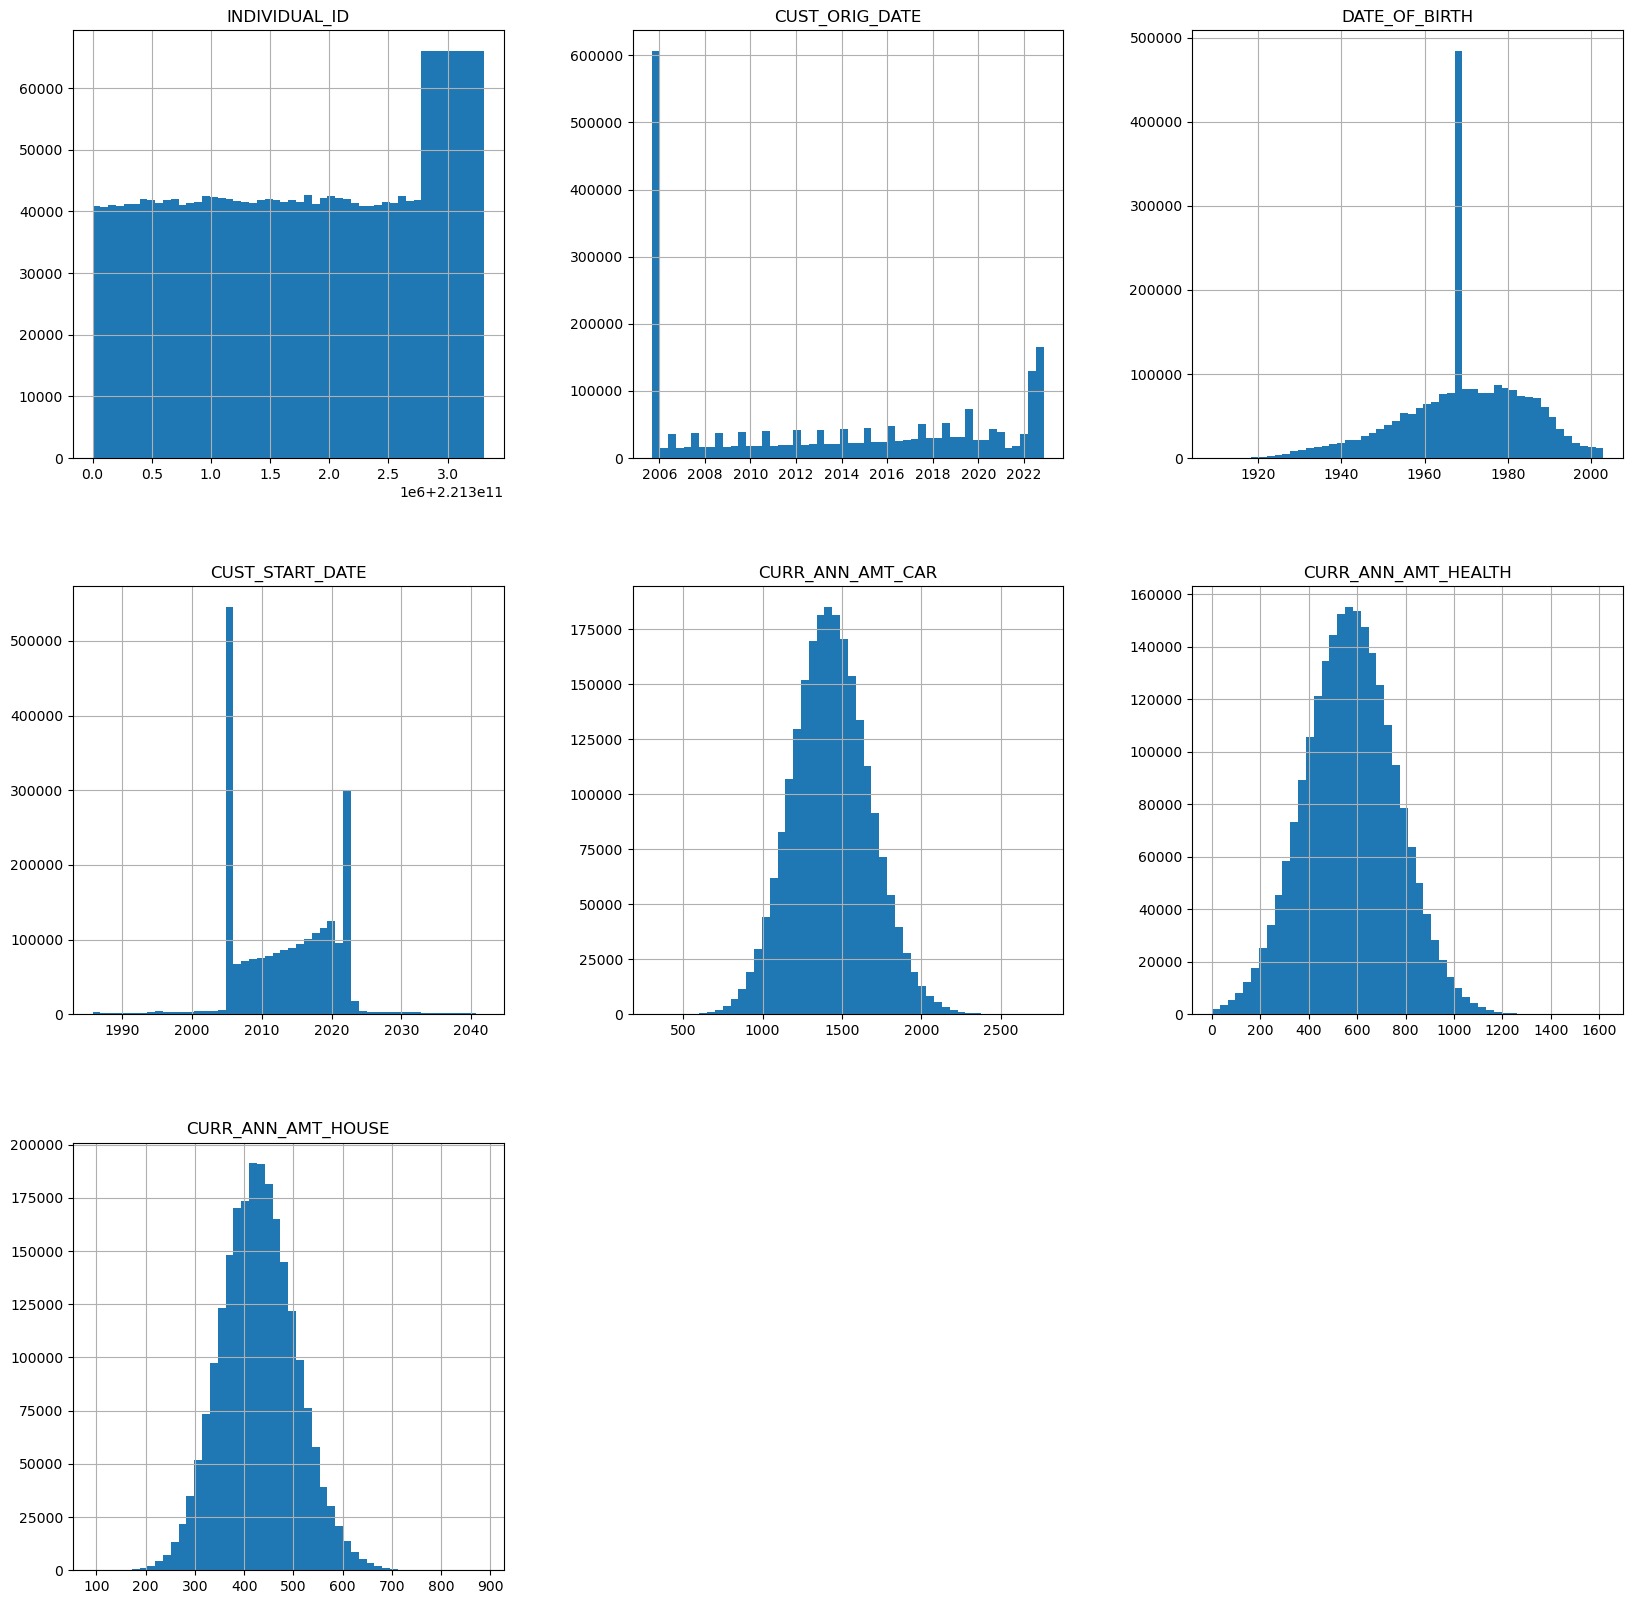

In [16]:
df_customer_clean.hist(figsize=(20, 20), bins=50)

/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_24548/349706438.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_customer_clean.corr(), annot=True, cmap="coolwarm")


<Axes: >

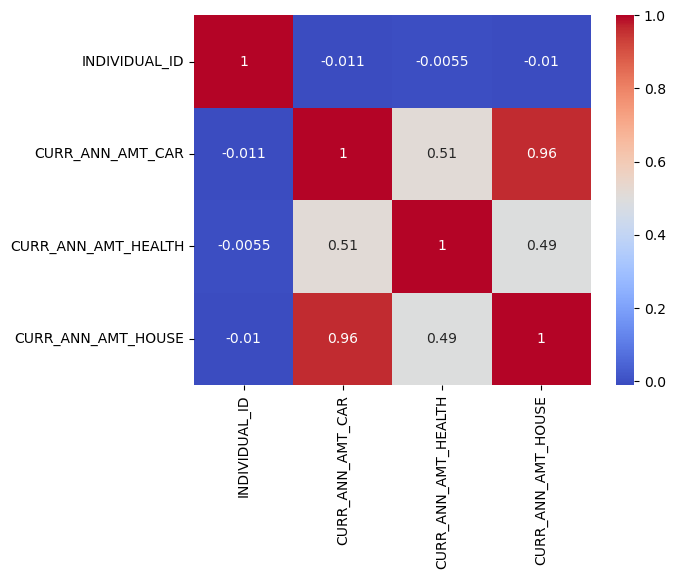

In [17]:
#heatmap
sns.heatmap(df_customer_clean.corr(), annot=True, cmap="coolwarm")


From those two visulizations there are a few things to learn about the data and to note for further cleaning / analysis:

1. There are significant spikes in the `CUST_ORIG_DATE` and `CUST_START_DATE` histograms at certain periods, which may indicate periods of high customer acquisition or data entry anomalies that require further investigation.

2. The `DATE_OF_BIRTH` histogram shows an unusual concentration around a particular year, suggesting a potential issue with the data, such as a default value being used for unknown birth years.

3. The annual rate entries seem to behave normally.

4. The heatmap reveals a strong positive correlation between spending on car-related expenses (`CURR_ANN_AMT_CAR`) and house-related expenses (`CURR_ANN_AMT_HOUSE`), which could imply that customers who spend more on their cars also tend to spend more on their houses.


I will start by deep diving into the first problem to find out what is going on there:

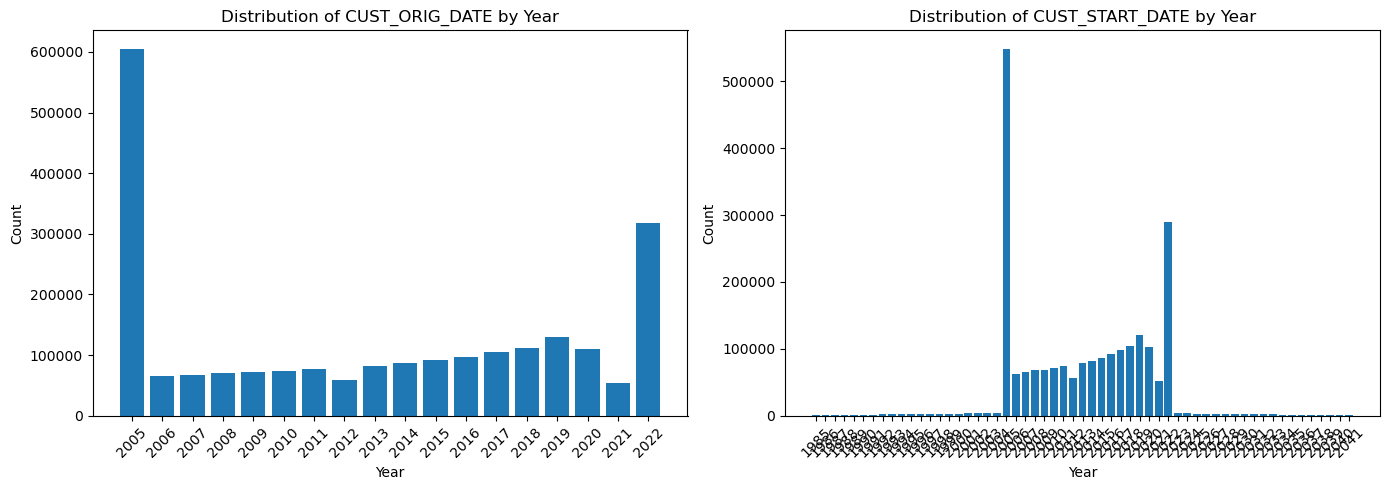

In [18]:
date_features = ["CUST_ORIG_DATE", "CUST_START_DATE"]

# Set up the matplotlib figure and axes for 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

for i, var in enumerate(date_features):
    # Prepare data set - group by the year part of the date
    data = df_customer_clean.groupby(df_customer_clean[var].dt.year).INDIVIDUAL_ID.agg("count")
    data.index = data.index.astype(int)

    # Bar chart
    axes[i].bar(data.index, data.values)
    axes[i].set_xticks(data.index)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Distribution of {var} by Year")

    # Rotate labels
    axes[i].set_xticklabels(data.index, rotation=45)


plt.tight_layout()
plt.show()

Here, we can see more anomalies in the data. The CUST_START_DATE is the start date of the customer's current policy, while the CUST_ORIG_DATE is the original date when the customer joined. Looking at the bar chart from CUST_ORIG_DATE, it seems like there was a boom in 2005 and also 2022 clearly stands out. The anomalies, however, seem to be in the CUST_START_DATE. As in the bar chart about CUST_ORIG_DATE, we have peaks in 2005 and 2022, and also the values seem to match (need to investigate this further). However, the values start in 1985, way before the values for CUST_ORIG_DATE start, which cannot be true. Further, the values reach up until 2041! Welcome to the future! (metrics: **correctness** & **consistency**) Combined with the fact that CUST_START_DATE is the only column with missing values (metric: **completeness**), this shows that those might be misderived.<br>
One approach would be replacing the missing values in CUST_START_DATE with the values from CUST_ORIG_DATE. I would, however, like to first look at the DATE_OF_BIRTH anomalies. Maybe those anomalies are related.

In order to calculate the age of each customer, I assume that the date from which this dataset is, is the upperbound from CUST_ORIG_DATE, i.e., 2022-11-12. I look at the upperbound from CUST_ORIG_DATE, as I cannot really trust the data in CUST_START_DATE, looking at the histogram above.

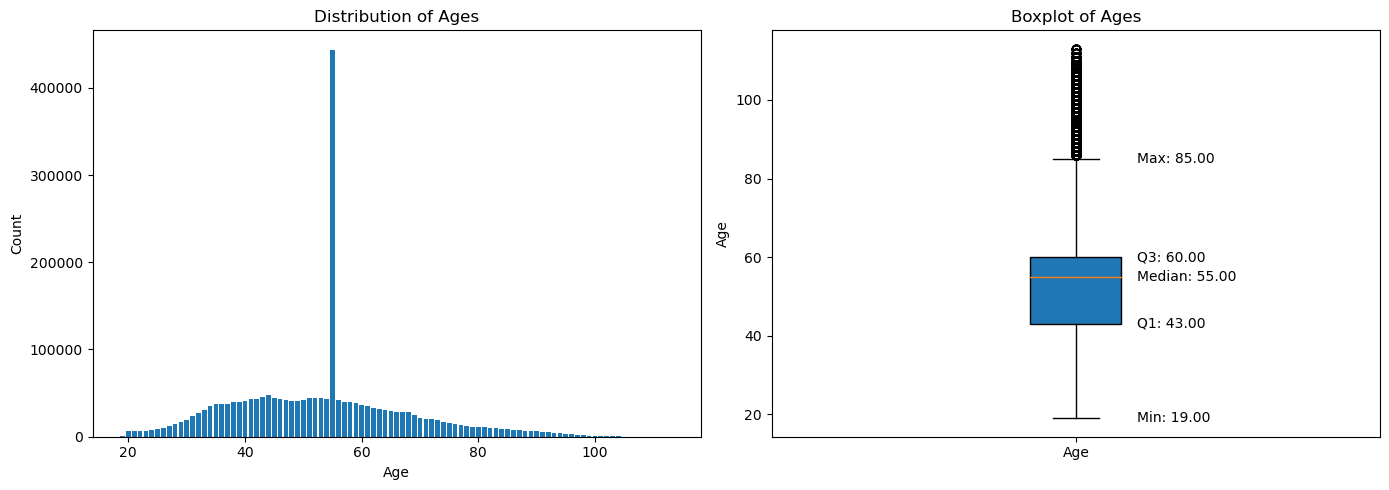

In [19]:
current_date = pd.to_datetime("2022-11-12", format='%Y-%m-%d')

df_customer_clean["AGE"] = current_date.year - df_customer_clean["DATE_OF_BIRTH"].dt.year - (
    (current_date.month < df_customer_clean["DATE_OF_BIRTH"].dt.month) |
    ((current_date.month == df_customer_clean["DATE_OF_BIRTH"].dt.month) & (current_date.day < df_customer_clean["DATE_OF_BIRTH"].dt.day))
)
age_data = df_customer_clean.groupby("AGE").INDIVIDUAL_ID.agg("count")

# Set up the matplotlib figure and axes for 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for age distribution
axes[0].bar(age_data.index, age_data.values)
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Ages")

# Plot boxplot
boxplot_dict = axes[1].boxplot(df_customer_clean["AGE"], patch_artist=True, vert=True)

# Calculate median, quartiles, and whiskers
median = np.median(df_customer_clean["AGE"])
Q1 = np.percentile(df_customer_clean["AGE"], 25)
Q3 = np.percentile(df_customer_clean["AGE"], 75)
whisker_low = boxplot_dict['whiskers'][0].get_ydata()[1]  # Lower whisker
whisker_high = boxplot_dict['whiskers'][1].get_ydata()[1]  # Upper whisker

# Annotations for median, Q1, Q3, and whiskers
axes[1].text(x=1.1, y=median, s=f"Median: {median:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=Q3, s=f"Q3: {Q3:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=Q1, s=f"Q1: {Q1:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=whisker_high, s=f"Max: {whisker_high:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=whisker_low, s=f"Min: {whisker_low:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)

# Set title and labels for boxplot
axes[1].set_title("Boxplot of Ages")
axes[1].set_xticklabels(['Age'])
axes[1].set_ylabel("Age")

plt.tight_layout()  # Adjust layout to make room for the plots
plt.show()

In [20]:
df_customer_clean.DATE_OF_BIRTH.value_counts()

1967-07-07    400059
1970-07-26      4152
1967-06-27      4117
1968-06-26      4108
1970-06-25      4094
               ...  
1909-07-10         1
1908-12-11         1
1910-07-10         1
1910-12-10         1
1910-09-09         1
Name: DATE_OF_BIRTH, Length: 3492, dtype: int64

I can look at the DATE_OF_BIRTH column also from another perspective, being the age of the customer. After plotting this age, it becomes evident that the aforementioned anomaly skews the data. Thus, I am concerned about the **correctness** here as well.

I believe that those rows with DATE_OF_BIRTH = 1967-07-07 with a combination of CUST_START_DATE <= 2005-09-11, >= 2022-11-12, or CUST_START_DATE being a missing value are incorrect and can be confidentely removed from a dataset.<br>

In [21]:
df_customer_clean.shape

(2277608, 8)

In [22]:
df_customer_clean = df_customer_clean.loc[~((df_customer_clean["DATE_OF_BIRTH"] == "1967-07-07") &
    ((df_customer_clean["CUST_START_DATE"] <= "2005-09-11") | 
     (df_customer_clean["CUST_START_DATE"] >= "2022-11-12") | 
     (df_customer_clean["CUST_START_DATE"].isna()))
)]

In [23]:
df_customer_clean.shape

(2231593, 8)

This removal results in a 46,015-row reduction of the dataset, which is yet not enough to get rid of these anomalies or to assure **completeness**. Further, this does not assure **Stability** either.

Looking at the data in the other datasets, it might be that there are many entries with an outlier value in age, have a termination entry in the df_termination. I will take a look at this later on. Now, I should simply add an indicator column, whether a particular entry is an outlier:

In [24]:
# Define the function to calculate outliers
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Determine outliers and encode as -1, 0, 1
    encoded_outliers = dataframe[column].apply(lambda x: -1 if x < lower_bound else (1 if x > upper_bound else 0))
    
    return encoded_outliers



df_customer_clean["AGE_IS_OUTLIER"] = outliers(df_customer_clean, "AGE")

In order to also fix the issue with **completeness** in the CUST_START_DATE column, I simply change those before 2005-09-11 to 2005-09-11 and those after 2022-11-12 to 2022-11-12 (lower and upper bound from CUST_ORIG_DATE). This makes sense, because it cannot be that CUST_START_DATE is smaller than CUST_ORIG_DATE. Also, as aforementioned, I assume that the data is from the 2022-11-12, so every date above 2022-11-12 is in the future.

In [25]:
# Replacing the missing values in CUST_START_DATE with the value in CUST_ORIG_DATE
df_customer_clean["CUST_START_DATE"] = df_customer_clean["CUST_START_DATE"].fillna(df_customer_clean["CUST_ORIG_DATE"])

# The data in CUST_ORIG_DATE starts on 2005-09-11 and ends on 2022-11-12. Thus all the data in CUST_START_DATE that is not in this range should be replaced
# by 2005-09-11 for values below and 2022-11-12 for values above
df_customer_clean.loc[df_customer_clean["CUST_START_DATE"] < "2005-09-11", "CUST_START_DATE"] = "2005-09-11"
df_customer_clean.loc[df_customer_clean["CUST_START_DATE"] > "2022-11-12", "CUST_START_DATE"] = "2022-11-12"

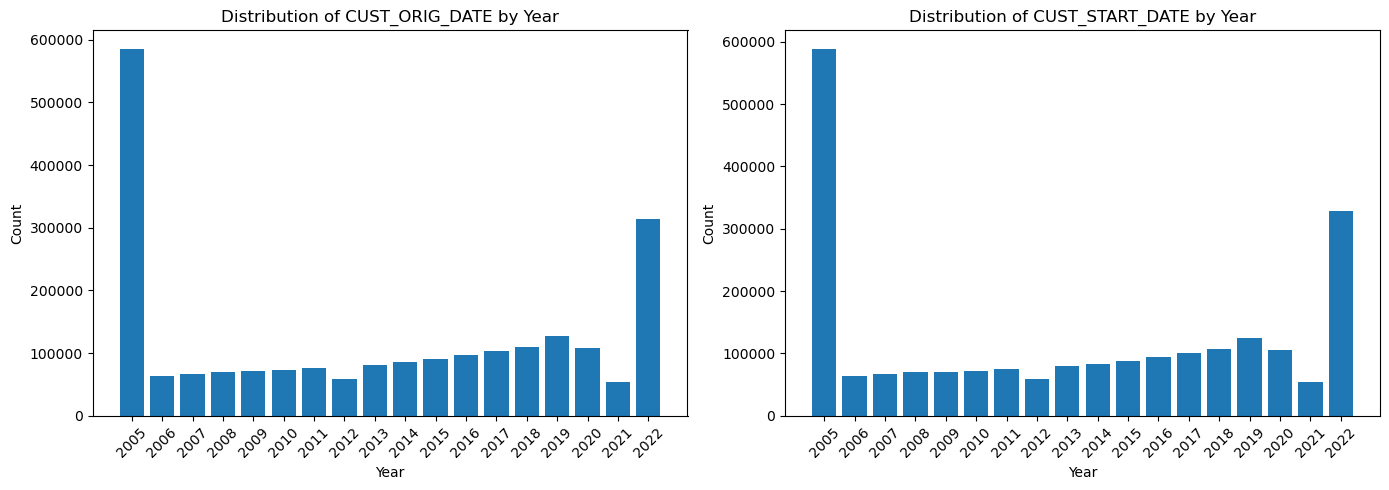

The correlation between -CUST_ORIG_DATE- and -CUST_START_DATE- is 0.9996456155457613


In [26]:
date_features = ["CUST_ORIG_DATE", "CUST_START_DATE"]

# Set up the matplotlib figure and axes for 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
data_series = []

for i, var in enumerate(date_features):
    # Prepare data set - group by the year part of the date
    data = df_customer_clean.groupby(df_customer_clean[var].dt.year).INDIVIDUAL_ID.agg("count")
    data.index = data.index.astype(int)

    # Store this data for correlation analysis later
    data_series.append(data)

    # Bar chart
    axes[i].bar(data.index, data.values)
    axes[i].set_xticks(data.index)
    axes[i].set_xlabel("Year")
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Distribution of {var} by Year")

    # Rotate labels
    axes[i].set_xticklabels(data.index, rotation=45)


plt.tight_layout()  # Adjust layout to make room for the plots
plt.show()

combined_data = pd.concat(data_series, axis=1)
correlation = combined_data.corr().iloc[0, 1]
print(f"The correlation between -CUST_ORIG_DATE- and -CUST_START_DATE- is {correlation}")

The pattern of CUST_ORIG_DATE and CUST_START_DATE are very similar if not the same. The correlation value of 0.9996456155457613 also supports this. Thus, I can also simply drop the entire column CUST_START_DATE.

Note: This also simply solves the issue I had with the **completeness**.

In [27]:
df_customer_clean = df_customer_clean.drop("CUST_START_DATE", axis=1)

Next to the customers age, it might also be interesting to know the entry age of the customer. 

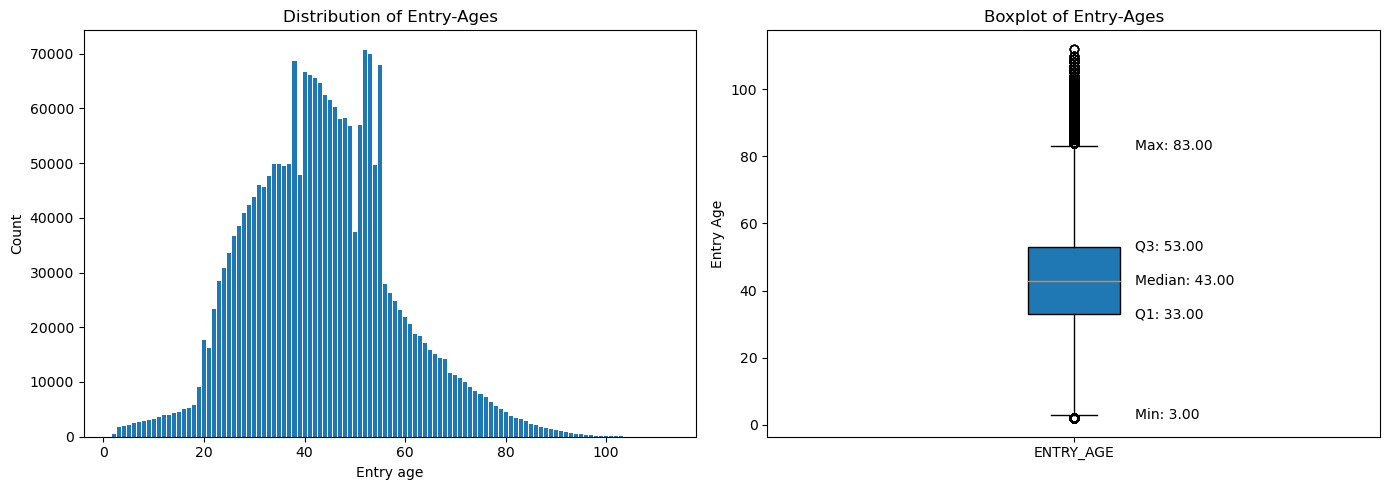

In [28]:
df_customer_clean["ENTRY_AGE"] = df_customer_clean["CUST_ORIG_DATE"].dt.year - df_customer_clean["DATE_OF_BIRTH"].dt.year - (
    (df_customer_clean["CUST_ORIG_DATE"].dt.month < df_customer_clean["DATE_OF_BIRTH"].dt.month) |
    ((df_customer_clean["CUST_ORIG_DATE"].dt.month == df_customer_clean["DATE_OF_BIRTH"].dt.month) & (df_customer_clean["CUST_ORIG_DATE"].dt.day < df_customer_clean["DATE_OF_BIRTH"].dt.day))
)

entry_age_data = df_customer_clean.groupby("ENTRY_AGE").INDIVIDUAL_ID.agg("count")

# Set up the matplotlib figure and axes for 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart for entry age distribution
axes[0].bar(entry_age_data.index, entry_age_data.values)
axes[0].set_xlabel("Entry age")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Entry-Ages")

# Plot boxplot
boxplot_dict = axes[1].boxplot(df_customer_clean["ENTRY_AGE"], patch_artist=True, vert=True)

# Calculate median, quartiles, and whiskers
median = np.median(df_customer_clean["ENTRY_AGE"])
Q1 = np.percentile(df_customer_clean["ENTRY_AGE"], 25)
Q3 = np.percentile(df_customer_clean["ENTRY_AGE"], 75)
whisker_low = boxplot_dict['whiskers'][0].get_ydata()[1]  # Lower whisker
whisker_high = boxplot_dict['whiskers'][1].get_ydata()[1]  # Upper whisker

# Annotations for median, Q1, Q3, and whiskers
axes[1].text(x=1.1, y=median, s=f"Median: {median:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=Q3, s=f"Q3: {Q3:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=Q1, s=f"Q1: {Q1:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=whisker_high, s=f"Max: {whisker_high:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=whisker_low, s=f"Min: {whisker_low:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)

# Set title and labels for boxplot
axes[1].set_title("Boxplot of Entry-Ages")
axes[1].set_xticklabels(['ENTRY_AGE'])
axes[1].set_ylabel("Entry Age")

plt.tight_layout()  # Adjust layout to make room for the plots
plt.show()

Having so many ages above 100 is already weird, but having entry ages for insurances above 80 is simply unrealistic (80 is already quite generous), as no insurance can make profit from those old people. Thus, those values can be dropped.

Further, all entry ages below 18 do not make any sense either, it is not legally possible to conclude a contract at this age.

Note: All this should be checked with the business expert. Here, I simply assume that those information are correct.

In [29]:
df_customer_clean[((df_customer_clean["ENTRY_AGE"] >= 80) | (df_customer_clean["ENTRY_AGE"] <= 18))]

INDIVIDUAL_ID CUST_ORIG_DATE DATE_OF_BIRTH  CURR_ANN_AMT_CAR  \
31        2.213000e+11     2012-01-04    1994-05-22       1463.822914   
94        2.213000e+11     2022-03-24    1935-09-04       1465.039860   
123       2.213000e+11     2016-09-21    1936-03-04       1278.716094   
151       2.213000e+11     2021-05-06    1926-05-06       1270.934089   
162       2.213000e+11     2005-09-11    1995-02-20       1497.462664   
...                ...            ...           ...               ...   
2280237   2.213033e+11     2005-09-11    1988-11-22       1557.658940   
2280243   2.213033e+11     2022-02-01    1921-11-06       1670.859574   
2280270   2.213033e+11     2005-09-11    2002-11-08       1506.921971   
2280305   2.213033e+11     2009-09-23    2000-12-03       1773.267034   
2280311   2.213033e+11     2013-01-09    1999-02-26       1178.706677   

         CURR_ANN_AMT_HEALTH  CURR_ANN_AMT_HOUSE  AGE  AGE_IS_OUTLIER  \
31                464.266323               438.0   28               0   
94                701.836716               467.0   87               0   
123               436.311827               359.0   86               0   
151               647.858806               402.0   96               1   
162               867.572614               490.0   27               0   
...                      ...                 ...  ...             ...   
2280237           653.888819               502.0   33               0   
2280243           786.437546               515.0  101               1   
2280270           802.545687               462.0   20               0   
2280305           569.350555               532.0   21               0   
2280311           791.250765               340.0   23               0   

         ENTRY_AGE  
31              17  
94              86  
123             80  
151             95  
162             10  
...            ...  
2280237         16  
2280243        100  
2280270          2  
2280305          8  
2280311         13  

[90950 rows x 9 columns]

In [30]:
# drop rows where ENTRY_AGE is larger than 80 or smlaler than 18
df_customer_clean = df_customer_clean.loc[~((df_customer_clean["ENTRY_AGE"] >= 80) | (df_customer_clean["ENTRY_AGE"] <= 18))]

This resulted in another ~91k row reduction.

Now, I want to have look at the distributions of the amounts spend on insurance in the three fields (car, health, house):

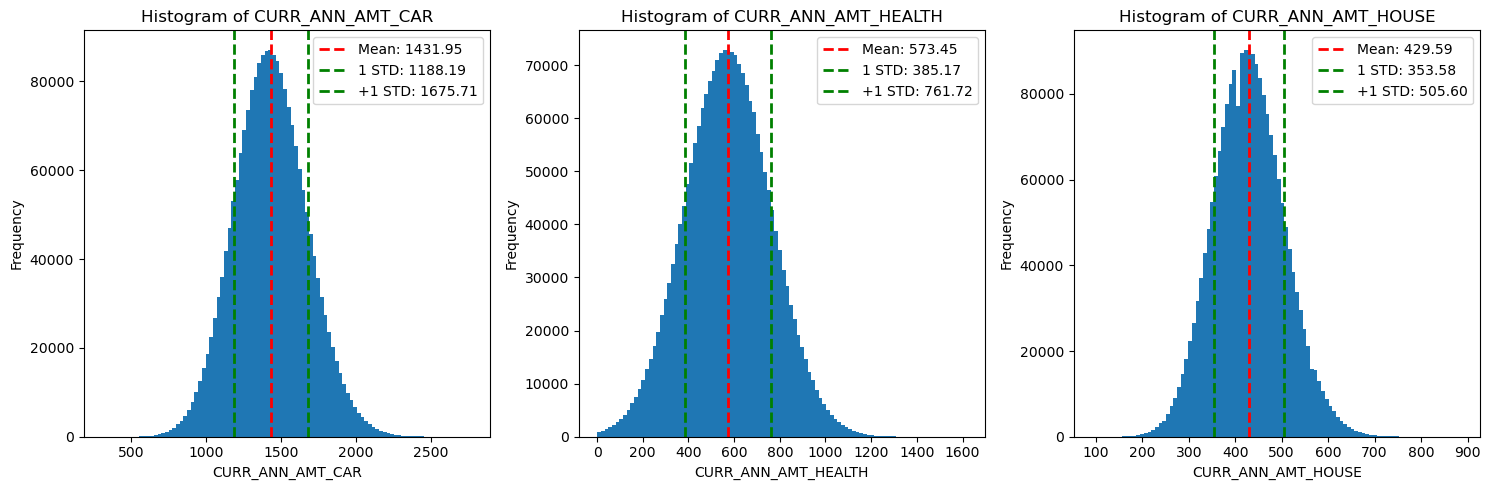

In [31]:
# Features to look at
amount_features = ["CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Go through each variable and create a histogram, mean and std lines
for ax, var in zip(axes, amount_features):
    # Calculate mean and standard deviation for each variable
    
    mean = df_customer_clean[var].mean()
    std = df_customer_clean[var].std()
    
    # Plot histogram
    ax.hist(df_customer_clean[var], bins=100)
    
    # Mean line
    ax.axvline(mean, color="r", linestyle="dashed", linewidth=2, label=f"Mean: {mean:.2f}")
    
    # Standard deviation lines
    ax.axvline(mean - std, color="g", linestyle="dashed", linewidth=2, label=f"1 STD: {mean - std:.2f}")
    ax.axvline(mean + std, color="g", linestyle="dashed", linewidth=2, label=f"+1 STD: {mean + std:.2f}")
    
    # Set title and labels
    ax.set_title(f"Histogram of {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Frequency")
    
    # Add legend
    ax.legend()

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


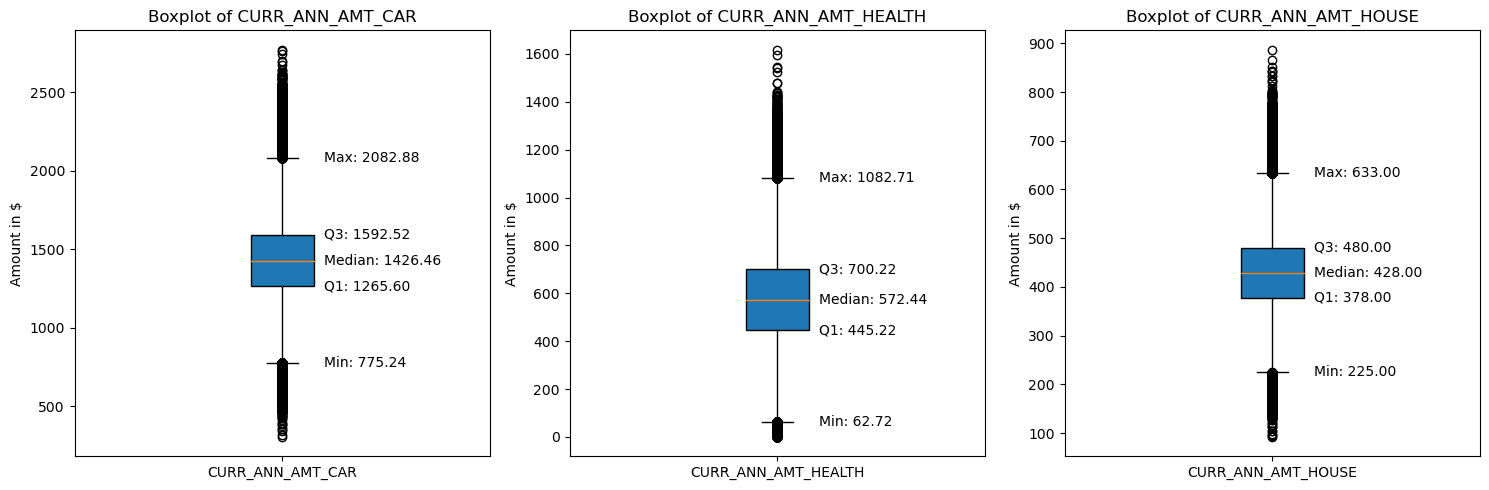

In [32]:
# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Go through each variable and create a histogram, mean and std lines
for ax, var in zip(axes, amount_features):
        
    # Defining the data for the boxplot
    data = df_customer_clean[var]

    # Plot boxplot
    boxplot_dict = ax.boxplot(data, patch_artist=True)

    # Calculate median and quantiles
    median = np.median(data)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    whisker_low = boxplot_dict['whiskers'][0].get_ydata()[1]  # Lower whisker
    whisker_high = boxplot_dict['whiskers'][1].get_ydata()[1]  # Upper whisker

    # Annotations for median, Q1, and Q3
    ax.text(x=1.1, y=median, s=f"Median: {median:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
    ax.text(x=1.1, y=Q3, s=f"Q3: {Q3:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
    ax.text(x=1.1, y=Q1, s=f"Q1: {Q1:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
    ax.text(x=1.1, y=whisker_high, s=f"Max: {whisker_high:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
    ax.text(x=1.1, y=whisker_low, s=f"Min: {whisker_low:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
    
    
    # Set title and labels
    ax.set_title(f"Boxplot of {var}")
    ax.set_xticklabels([var])
    ax.set_ylabel("Amount in $")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

It is evident that people spend by far the most on car insurance. Health and house insurance spending behavior seems to be similar, yet the spending on health insurance trumps the spending on house insurance. 

Further, I see that there are many outliers according to the IQR rule. Thus, it might be a good idea to mark those outliers in a seperate column and plot only the non-outlier values.

In [33]:
# Calculate outlier indicators once for all amount_features
for var in amount_features:
    df_customer_clean[var + "_IS_OUTLIER"] = outliers(df_customer_clean, var)

It might also be interesting not to look at each column seperaterly, but look at the total amount

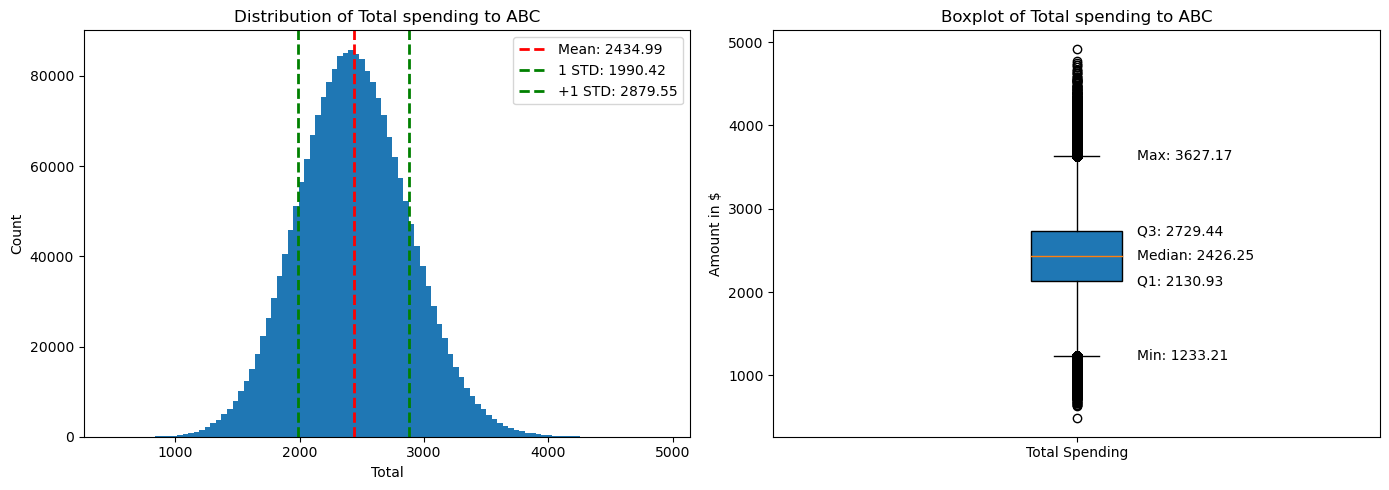

In [34]:
df_customer_clean["CURR_ANN_AMT_TOTAL"] = df_customer_clean["CURR_ANN_AMT_CAR"] + df_customer_clean["CURR_ANN_AMT_HEALTH"] + df_customer_clean["CURR_ANN_AMT_HOUSE"]

# Set up the matplotlib figure and axes for 2 plots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Calculate mean and standard deviation for each variable
mean = df_customer_clean["CURR_ANN_AMT_TOTAL"].mean()
std = df_customer_clean["CURR_ANN_AMT_TOTAL"].std()

# Bar chart for age distribution
axes[0].hist(df_customer_clean["CURR_ANN_AMT_TOTAL"], bins = 100)

# Mean line
axes[0].axvline(mean, color="r", linestyle="dashed", linewidth=2, label=f"Mean: {mean:.2f}")

# Standard deviation lines
axes[0].axvline(mean - std, color="g", linestyle="dashed", linewidth=2, label=f"1 STD: {mean - std:.2f}")
axes[0].axvline(mean + std, color="g", linestyle="dashed", linewidth=2, label=f"+1 STD: {mean + std:.2f}")

# Set title and labels
axes[0].set_xlabel("Total")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Total spending to ABC")

# Add legend
axes[0].legend()

# Plot boxplot
boxplot_dict = axes[1].boxplot(df_customer_clean["CURR_ANN_AMT_TOTAL"], patch_artist=True, vert=True)

# Calculate median, quartiles, and whiskers
median = np.median(df_customer_clean["CURR_ANN_AMT_TOTAL"])
Q1 = np.percentile(df_customer_clean["CURR_ANN_AMT_TOTAL"], 25)
Q3 = np.percentile(df_customer_clean["CURR_ANN_AMT_TOTAL"], 75)
whisker_low = boxplot_dict['whiskers'][0].get_ydata()[1]  # Lower whisker
whisker_high = boxplot_dict['whiskers'][1].get_ydata()[1]  # Upper whisker

# Annotations for median, Q1, Q3, and whiskers
axes[1].text(x=1.1, y=median, s=f"Median: {median:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=Q3, s=f"Q3: {Q3:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=Q1, s=f"Q1: {Q1:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=whisker_high, s=f"Max: {whisker_high:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)
axes[1].text(x=1.1, y=whisker_low, s=f"Min: {whisker_low:.2f}", verticalalignment='center', horizontalalignment='left', color="black", fontsize=10)

# Set title and labels for boxplot
axes[1].set_title("Boxplot of Total spending to ABC")
axes[1].set_xticklabels(["Total Spending"])
axes[1].set_ylabel("Amount in $")

plt.tight_layout()  # Adjust layout to make room for the plots
plt.show()

The histogram shows a unimodal distribution with a mean of approximately 2,400 and a standard deviation of about 450, indicating a moderate spread of values. The boxplot reveals that the median spending is slightly below the mean with a fairly symmetric distribution of expenditures, although several outliers exist beyond the maximum whisker and below the minimum whisker.

Now, I want to know whether there is a relationship between age and the spending behavior.

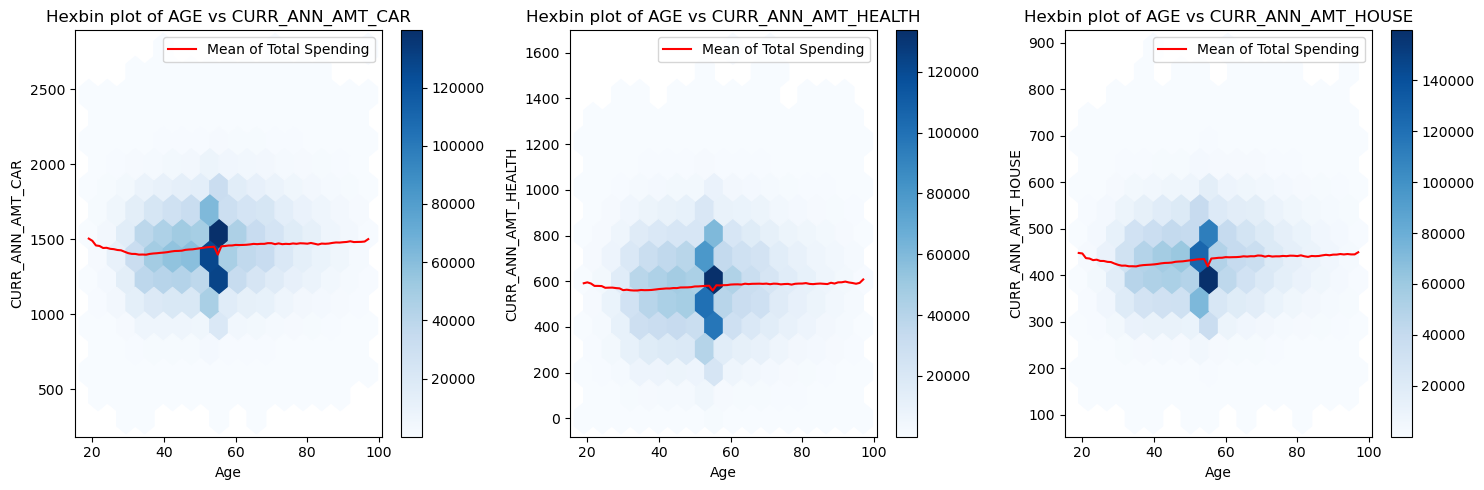

The correlation between AGE and CURR_ANN_AMT_CAR is 0.08
The correlation between AGE and CURR_ANN_AMT_HEALTH is 0.04
The correlation between AGE and CURR_ANN_AMT_HOUSE is 0.08


In [35]:
targets = ["CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"]

corr_age_targets = []

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, target in enumerate(targets):
    # Calculate the correlation between AGE and each target and add to corr_age_items
    corr_age_targets.append(df_customer_clean["AGE"].corr(df_customer_clean[target]))
    
    # Plot hexbin for each combination on its respective subplot
    hb = axes[i].hexbin(df_customer_clean["AGE"], df_customer_clean[target], gridsize=15, cmap='Blues', mincnt=1)
    axes[i].set_title(f"Hexbin plot of AGE vs {target}")

    # Doing the same but with the mean of the total spending
    unique_ages = df_customer_clean.groupby(df_customer_clean["AGE"])[target].mean()
    axes[i].plot(unique_ages.index, unique_ages.values, color="r", label="Mean of Total Spending")
    
    # Set labels
    axes[i].set_xlabel("Age")
    axes[i].set_ylabel(target)

    # Add a color bar to show the count in bins
    plt.colorbar(hb, ax=axes[i])

    # Add legend
    axes[i].legend()

# Adjust layout for a clean look
plt.tight_layout()

# Show the plot
plt.show()

print(f"The correlation between AGE and CURR_ANN_AMT_CAR is {corr_age_targets[0]:.2f}")
print(f"The correlation between AGE and CURR_ANN_AMT_HEALTH is {corr_age_targets[1]:.2f}")
print(f"The correlation between AGE and CURR_ANN_AMT_HOUSE is {corr_age_targets[2]:.2f}")

Both, the hexbin plot and the correlation show that there is no (linear) realtionship between these variabels and age. The mean spending, however, is rather stable around all ages. The small dip in the data comes from the anomality in `AGE` (or `DATE_OF_BIRTH`) that I talked about extensively before already.

Lastly, I want to know whether there is a relationship between joining year and total spending: 

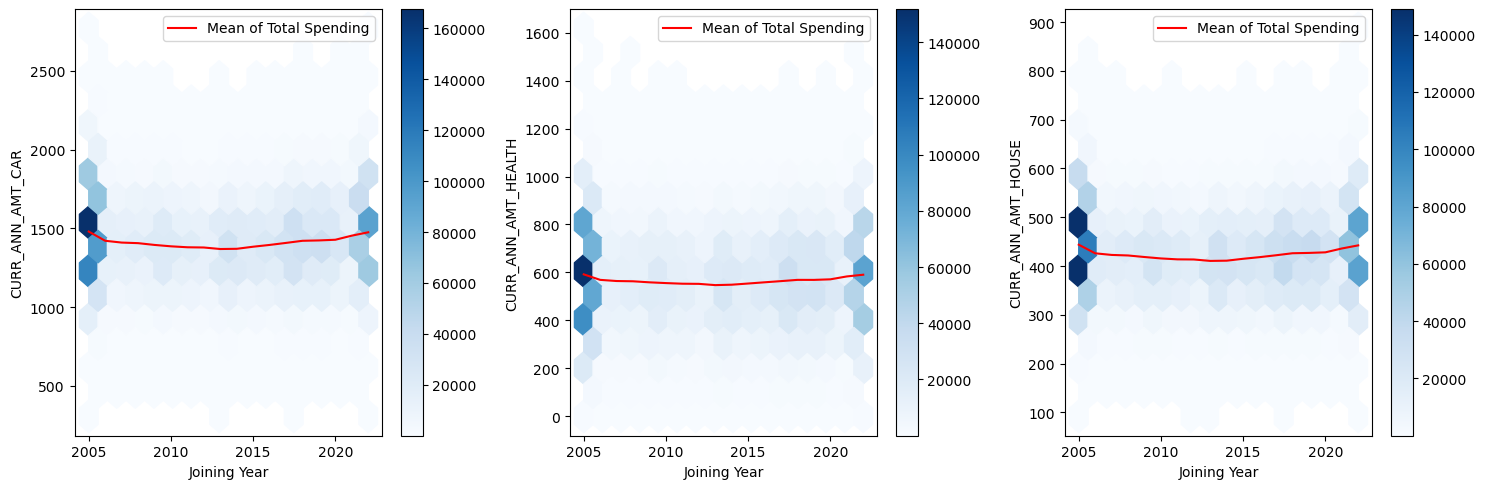

In [36]:
df_customer_clean['CUST_ORIG_YEAR'] = df_customer_clean['CUST_ORIG_DATE'].dt.year

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, target in enumerate(targets):
    
    # Plot hexbin for each combination on its respective subplot
    hb = axes[i].hexbin(df_customer_clean["CUST_ORIG_YEAR"], df_customer_clean[target], gridsize=15, cmap='Blues', mincnt=1)

    # Doing the same but with the mean of the total spending
    unique_years = df_customer_clean.groupby(df_customer_clean["CUST_ORIG_YEAR"])[target].mean()
    axes[i].plot(unique_years.index, unique_years.values, color="r", label="Mean of Total Spending")
    
    # Set labels
    axes[i].set_xlabel("Joining Year")
    axes[i].set_ylabel(target)

    # Add a color bar to show the count in bins
    plt.colorbar(hb, ax=axes[i])

    # Add legend
    axes[i].legend()

# Adjust layout for a clean look
plt.tight_layout()

# Show the plot
plt.show()

Here, I can see the impact of the unusual distribution of `CUST_ORIG_YEAR`. However, it is also notable that the average spending is rather stable accross all those years.

I would like to end this part of the EDA the same way as I started it:

array([[<Axes: title={'center': 'INDIVIDUAL_ID'}>,
        <Axes: title={'center': 'CUST_ORIG_DATE'}>,
        <Axes: title={'center': 'DATE_OF_BIRTH'}>,
        <Axes: title={'center': 'CURR_ANN_AMT_CAR'}>],
       [<Axes: title={'center': 'CURR_ANN_AMT_HEALTH'}>,
        <Axes: title={'center': 'CURR_ANN_AMT_HOUSE'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'AGE_IS_OUTLIER'}>],
       [<Axes: title={'center': 'ENTRY_AGE'}>,
        <Axes: title={'center': 'CURR_ANN_AMT_CAR_IS_OUTLIER'}>,
        <Axes: title={'center': 'CURR_ANN_AMT_HEALTH_IS_OUTLIER'}>,
        <Axes: title={'center': 'CURR_ANN_AMT_HOUSE_IS_OUTLIER'}>],
       [<Axes: title={'center': 'CURR_ANN_AMT_TOTAL'}>,
        <Axes: title={'center': 'CUST_ORIG_YEAR'}>, <Axes: >, <Axes: >]],
      dtype=object)

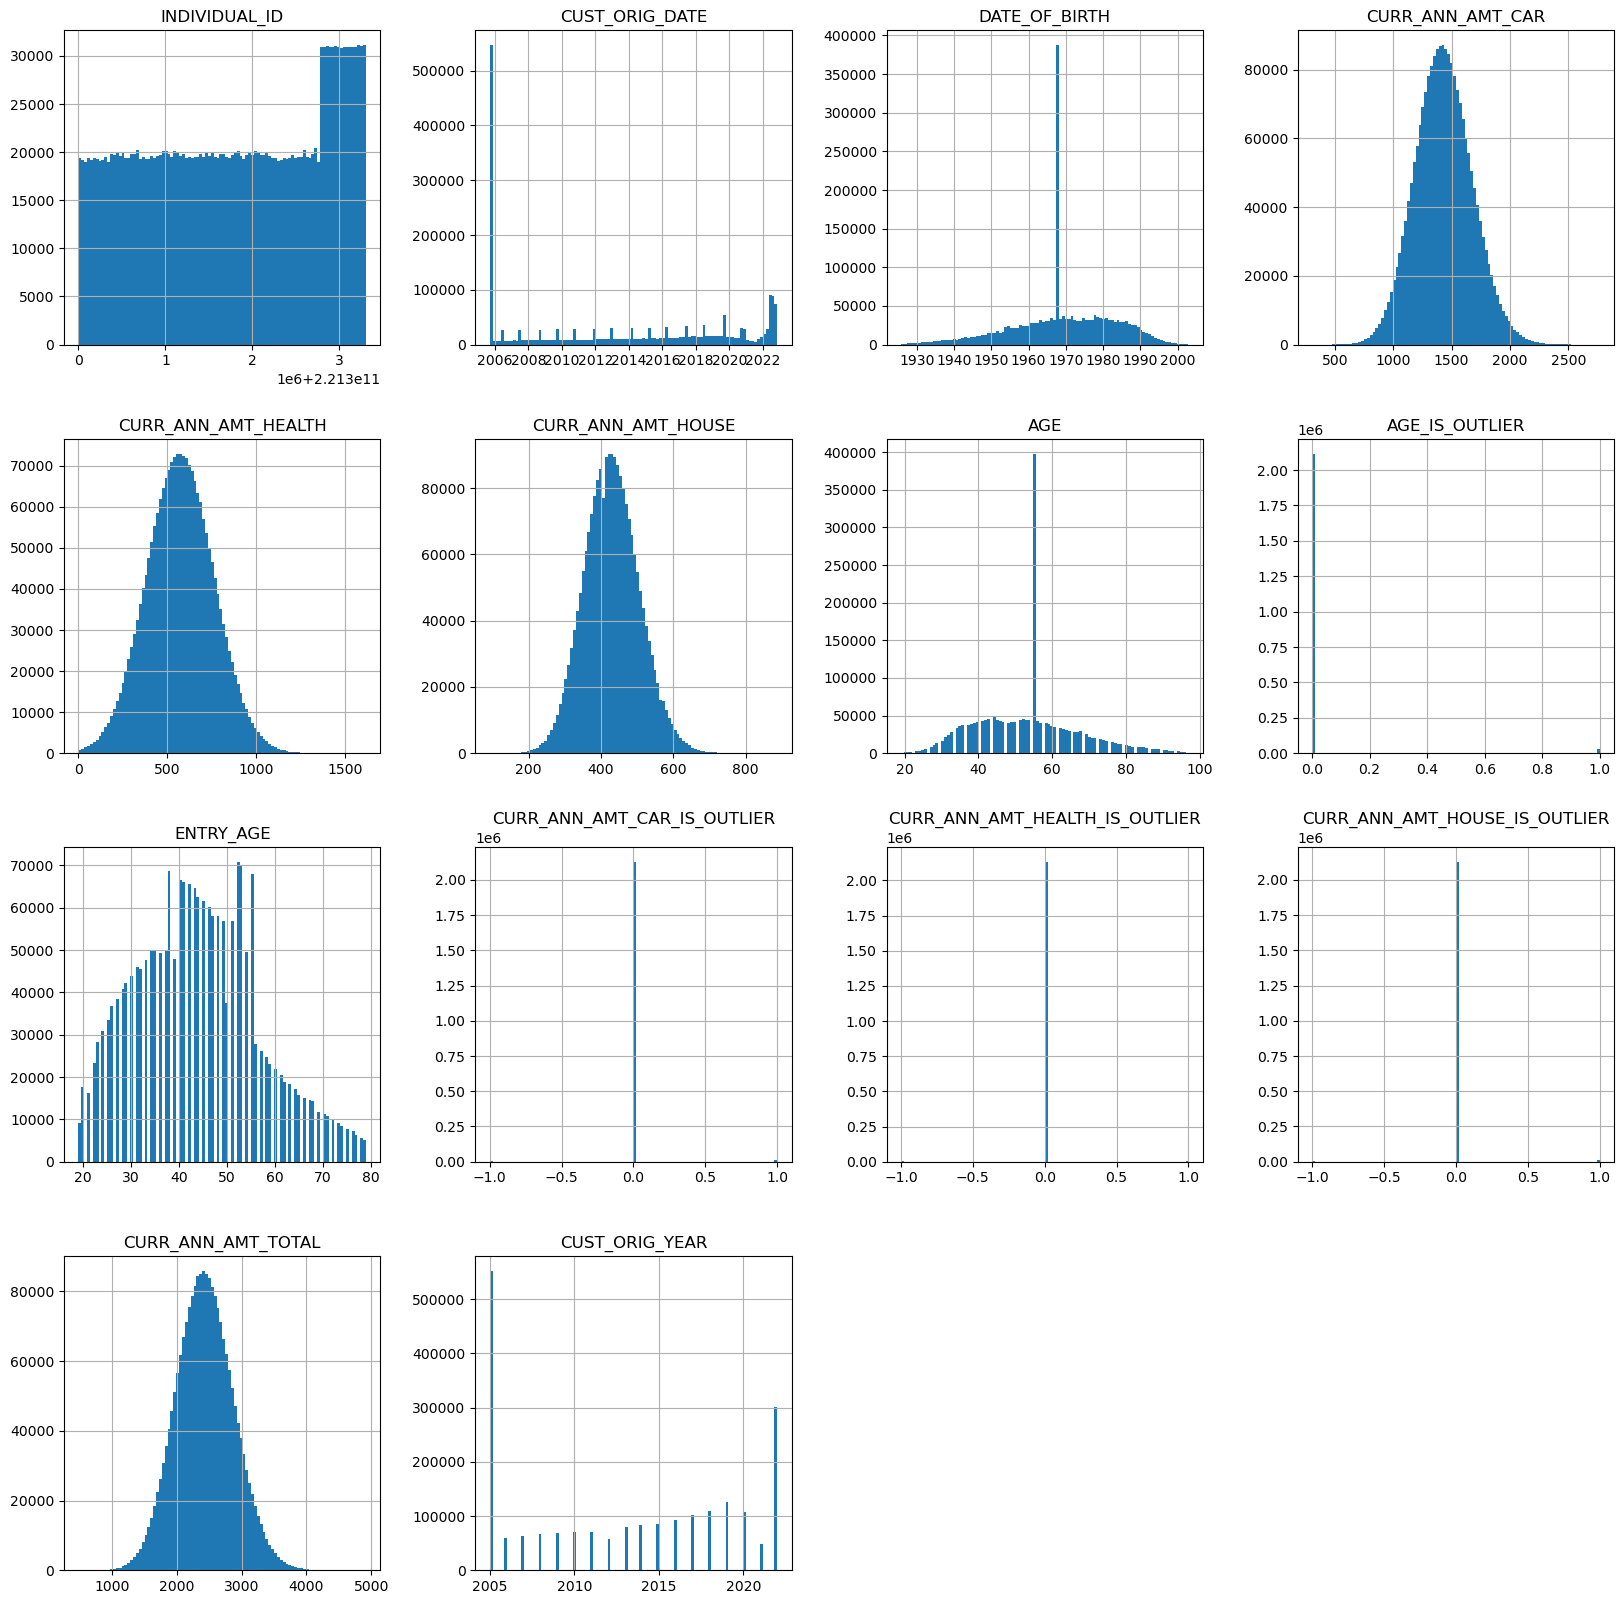

In [37]:
# Histogram
df_customer_clean.hist(figsize=(20, 20), bins=100)

It is notable how little outliers are still left. This is, however, not a problem at all.

/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_24548/3155365313.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_customer_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")


<Axes: >

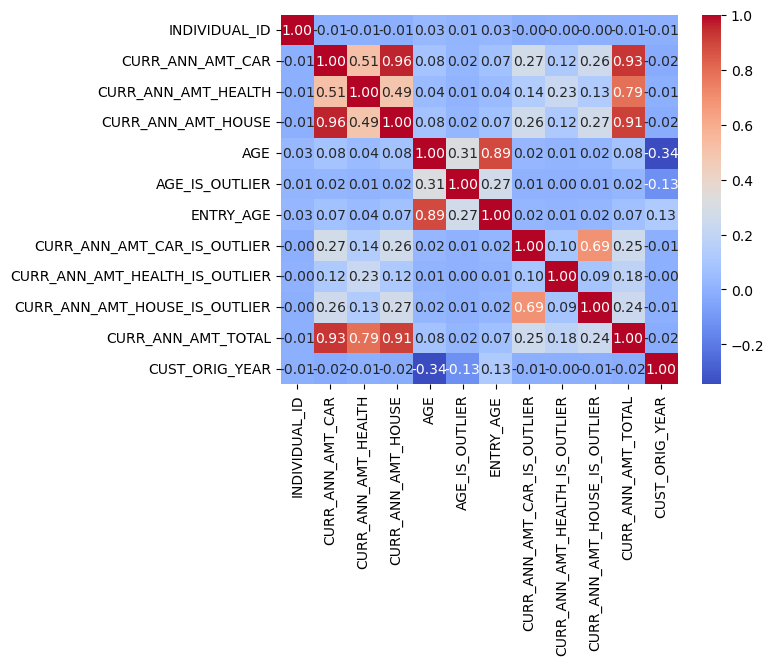

In [38]:
# Heatmap
sns.heatmap(df_customer_clean.corr(), annot=True, cmap="coolwarm", fmt=".2f")

It is evident that there is a very strong positive correlation between the annual amounts paid for car, health, and house insurance. This suggests that customers who pay more for one type of insurance are likely to pay more for the others as well. Further, the total annual amount paid has a high positive correlation with the individual insurance payments. This is expected as the total is simply a sum of these individual amounts.

Note: The distribution of `CUST_ORIG_DATE` (and so also for `CUST_ORIG_YEAR`) is still off. Thus, I should be very careful with using it. Yet, I do believe that it might be useful. Hence, I do not (yet) want to drop it. As `ENTRY_AGE` is based on this and looking at the correlation between `ENTRY_AGE` and `AGE` (0.89), I can already reduce my feature space here by excluding `ENTRY_AGE` from it.

In [39]:
# Transforming boolean columns to binary (int8)
df_customer_clean["CURR_ANN_AMT_CAR_IS_OUTLIER"] = df_customer_clean["CURR_ANN_AMT_CAR_IS_OUTLIER"].astype("int8")
df_customer_clean["CURR_ANN_AMT_HEALTH_IS_OUTLIER"] = df_customer_clean["CURR_ANN_AMT_HEALTH_IS_OUTLIER"].astype("int8")
df_customer_clean["CURR_ANN_AMT_HOUSE_IS_OUTLIER"] = df_customer_clean["CURR_ANN_AMT_HOUSE_IS_OUTLIER"].astype("int8")
df_customer_clean["AGE_IS_OUTLIER"] = df_customer_clean["AGE_IS_OUTLIER"].astype("int8")

# Reordering the columns
new_order_customer = ["INDIVIDUAL_ID", "DATE_OF_BIRTH", "CUST_ORIG_DATE", "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_CAR_IS_OUTLIER", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HEALTH_IS_OUTLIER", "CURR_ANN_AMT_HOUSE", "CURR_ANN_AMT_HOUSE_IS_OUTLIER", "CURR_ANN_AMT_TOTAL", "AGE", "AGE_IS_OUTLIER"]
df_customer_clean = df_customer_clean[new_order_customer]
df_customer_clean.head()

INDIVIDUAL_ID DATE_OF_BIRTH CUST_ORIG_DATE  CURR_ANN_AMT_CAR  \
0   2.213000e+11    1956-07-30     2005-09-11       1694.050321   
1   2.213000e+11    1963-12-29     2010-08-11       1337.936100   
2   2.213000e+11    1986-04-25     2005-09-11       1641.116276   
3   2.213000e+11    1958-04-28     2005-09-11       1195.119342   
4   2.213000e+11    1988-04-21     2021-06-01       1598.554718   

   CURR_ANN_AMT_CAR_IS_OUTLIER  CURR_ANN_AMT_HEALTH  \
0                            0           771.798211   
1                            0           582.349567   
2                            0           618.987259   
3                            0           327.713357   
4                            0           448.258619   

   CURR_ANN_AMT_HEALTH_IS_OUTLIER  CURR_ANN_AMT_HOUSE  \
0                               0               531.0   
1                               0               386.0   
2                               0               461.0   
3                               0               333.0   
4                               0               492.0   

   CURR_ANN_AMT_HOUSE_IS_OUTLIER  CURR_ANN_AMT_TOTAL  AGE  AGE_IS_OUTLIER  
0                              0         2996.848532   66               0  
1                              0         2306.285667   58               0  
2                              0         2721.103535   36               0  
3                              0         1855.832699   64               0  
4                              0         2538.813337   34               0

**Final remarks on Metrics to measure data quality**:

• *Completeness*:
Data values are present<br>
-> I do not have any missing values anymore. ✅<br><br>
• *Consistency*:
Data satisfies constraints (format, allowable ranges and values, domain rules)<br>
-> dytpes are correct & ranges were checked (created indicator columns for outliers). ✅<br><br>
• *Correctness*:
Values are true and unbiased with respect to their real-world state<br>
-> There were a lot of values that did not make sense (values in the future, most of the people having the exact same birthday + birthyear, etc.) I tried to clean it as much as possible, yet I do not know how reliable the correctness of the data is. In my opinion this is the biggest issue here. ❓<br><br>
• *Uniqueness*:
Records representing a single customer are not replicated<br>
-> I checked for and removed duplicates. ✅<br><br>
• *Timeliness*:
Data is up-to-date to their real-world state for the task in hand<br>
-> Assuming that the data was created on the 2022-11-12 (as I mentioned in the calculation for the feature "age") this is fullfilled. ✅<br><br>
• *Stability*:
Data inherent concepts and statistics are comparable among sources over time<br>
-> Here, I have the aforementioned problem with the CUST_ORIG_DATE and the DATE_OF_BIRTH (new features AGE and ENTRY_AGE) columns. ❓<br><br>
• *Relevance*:
Data is useful for the task<br>
-> The correlation analysis does not really show much relevance, besides the three annual amount varibles. Yet, using domain knowledge, the variable age and also the entry year could be relevant later on. (✅)<br><br>
• *Contextualization*:
Data is annotated with the acquisition context, their meaning and semantics<br>
--> Already fullfilled. See descriptions above. ✅<br><br>

<u>Metrics that should be used in general, but that I cannot check in this assignment</u>

• *Trustworthiness*:
Data can be trusted based on the reputation of the stakeholders involved in data acquisition<br>

====================================================================================================================<br>

Overall, I am **not** entirely covinced that the data quality is on a good level.

##### EDA for df_demographics

**Metrics to measure the data quality**

• *Completeness*:
Data values are present<br><br>
• *Consistency*:
Data satisfies constraints (format, allowable ranges and values, domain rules)<br><br>
• *Correctness*:
Values are true and unbiased with respect to their real-world state<br><br>
• *Uniqueness*:
Records representing a single customer are not replicated<br><br>
• *Timeliness*:
Data is up-to-date to their real-world state for the task in hand<br><br>
• *Stability*:
Data inherent concepts and statistics are comparable among sources over time<br><br>
• *Relevance*:
Data is useful for the task<br><br>
• *Contextualization*:
Data is annotated with the acquisition context, their meaning and semantics<br>
--> Already fullfilled. See descriptions above<br><br>

<u>Metrics that should be used in general, but that I cannot check in this assignment</u>

• *Trustworthiness*:
Data can be trusted based on the reputation of the stakeholders involved in data acquisition

In [40]:
# Loading in the file
df_demographics = pd.read_csv("ABC_df_demographic.csv", index_col = 0)

# Looking at each file in order to see overall structures
df_demographics.head()

INDIVIDUAL_ID      INCOME  HAS_CHILDREN  LENGTH_OF_RESIDENCE  \
0   2.213028e+11  187500.000           1.0                  8.0   
1   2.213032e+11   63750.000           0.0                  0.0   
2   2.213032e+11   41250.000           0.0                 15.0   
3   2.213032e+11  120558.264           0.0                  0.0   
4   2.213032e+11  187500.000           0.0                  0.0   

  MARITAL_STATUS HOME_MARKET_VALUE  HOME_OWNER  COLLEGE_DEGREE  GOOD_CREDIT  \
0         Single   300000 - 349999           1               1            1   
1         Single               NaN           0               0            0   
2        Married     75000 - 99999           1               0            1   
3            NaN      1000 - 24999           1               0            0   
4            NaN               NaN           0               0            1   

  ADVANCED_STUDIES  
0                Y  
1                N  
2                N  
3                N  
4                Y

In [41]:
# checking memory usage of the dataframe & its info
df_demographics.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2112579 entries, 0 to 2112578
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   INDIVIDUAL_ID        float64
 1   INCOME               float64
 2   HAS_CHILDREN         float64
 3   LENGTH_OF_RESIDENCE  float64
 4   MARITAL_STATUS       object 
 5   HOME_MARKET_VALUE    object 
 6   HOME_OWNER           int64  
 7   COLLEGE_DEGREE       int64  
 8   GOOD_CREDIT          int64  
 9   ADVANCED_STUDIES     object 
dtypes: float64(4), int64(3), object(3)
memory usage: 497.2 MB


The dataframe has in total 2,112,579 rows and 10 columns.

In [42]:
# Checking for missing values
df_demographics.isna().sum()

INDIVIDUAL_ID               0
INCOME                      0
HAS_CHILDREN                0
LENGTH_OF_RESIDENCE         0
MARITAL_STATUS         431648
HOME_MARKET_VALUE      190205
HOME_OWNER                  0
COLLEGE_DEGREE              0
GOOD_CREDIT                 0
ADVANCED_STUDIES            0
dtype: int64

In [43]:
df_demographics.describe()

INDIVIDUAL_ID        INCOME  HAS_CHILDREN  LENGTH_OF_RESIDENCE  \
count   2.112579e+06  2.112579e+06  2.112579e+06         2.112579e+06   
mean    2.213018e+11  1.205583e+05  4.684885e-01         6.800571e+00   
std     9.916207e+05  7.504165e+04  5.853729e-01         5.090825e+00   
min     2.213000e+11  7.500000e+03  0.000000e+00         0.000000e+00   
25%     2.213009e+11  7.125000e+04  0.000000e+00         2.000000e+00   
50%     2.213018e+11  1.205583e+05  0.000000e+00         6.801000e+00   
75%     2.213027e+11  1.312500e+05  1.000000e+00         1.100000e+01   
max     2.213033e+11  3.750000e+05  6.000000e+00         1.500000e+01   

         HOME_OWNER  COLLEGE_DEGREE   GOOD_CREDIT  
count  2.112579e+06    2.112579e+06  2.112579e+06  
mean   6.983649e-01    3.016152e-01  8.195779e-01  
std    4.589678e-01    4.589592e-01  3.845388e-01  
min    0.000000e+00    0.000000e+00  0.000000e+00  
25%    0.000000e+00    0.000000e+00  1.000000e+00  
50%    1.000000e+00    0.000000e+00  1.000000e+00  
75%    1.000000e+00    1.000000e+00  1.000000e+00  
max    1.000000e+00    1.000000e+00  1.000000e+00

The describe function already shows quite a lot of information. E.g., from that we already know that around 46% of the customers are home owners, again around 46% have a college degree and around 38% have a good credit score.
One can, however, immediately note that there are also several problems that need to be tackeled.
1. The ADVANCED_STUDIES column should be changed to binary (Metric: **Consistency**). 
2. The missing values in MARITAL_STATUS should be replaced with "OTHER". Other imputation methods do not make too much sense, as there are more than only single or married. (Metric: **Completeness**)
3. The describtion of the HAS_CHILDREN colum indicates that this column should be binary, but has a max value of 6. (Metric: **Consistency**)
4. The HOME_MARKET_VALUE should be split into upperbound and lowerbound, because the current format is useless (Metric: **Relevance**). Out of that I could create a new (categorical) feature, which is simply the mean of the lower and upper bound.

While the first three problems can be solved immediately, I should handle the missing values before going on to the third problem.


Problem 1: The ADVANCED_STUDIES column should be changed to binary:

In [44]:
df_demographics_clean = df_demographics
df_demographics_clean["ADVANCED_STUDIES"] = df_demographics_clean["ADVANCED_STUDIES"].replace({"Y": 1, "N": 0})

Problem 2: Replace missing values in "MARITAL_STATUS" with "OTHER":

In [45]:
df_demographics_clean["MARITAL_STATUS"] = df_demographics_clean["MARITAL_STATUS"].fillna("OTHER")

# Applying one-hot encoding to the 'MARITAL_STATUS' column
df_demographics_clean = pd.get_dummies(df_demographics_clean, columns=["MARITAL_STATUS"])

# Defining MARITAL_STATUS_Single as the reference category --> Avoiding the Dummy Variable Trap
df_demographics_clean.drop("MARITAL_STATUS_Single", axis=1, inplace=True)

Problem 3: Changing HAS_CHILDREN column to binary:

In [46]:
df_demographics_clean.HAS_CHILDREN.value_counts()

0.0    1196696
1.0     858821
2.0      45874
3.0       7664
4.0       2130
5.0        726
6.0        668
Name: HAS_CHILDREN, dtype: int64

I assume, that the description ob this column was simply wrong and that this column displays how many children the client has. Thus, I can leave it as it is.

Now, that I have all my binary columns in the binary format, I can change the datatype to be more memory efficient.

In [47]:
df_demographics_clean["HAS_CHILDREN"] = df_demographics_clean["HAS_CHILDREN"].astype('uint8')
df_demographics_clean["HOME_OWNER"] = df_demographics_clean["HOME_OWNER"].astype('uint8')
df_demographics_clean["COLLEGE_DEGREE"] = df_demographics_clean["COLLEGE_DEGREE"].astype('uint8')
df_demographics_clean["GOOD_CREDIT"] = df_demographics_clean["GOOD_CREDIT"].astype('uint8')
df_demographics_clean["ADVANCED_STUDIES"] = df_demographics_clean["ADVANCED_STUDIES"].astype('uint8')

As aforementioned, I will now handle the missing values before moving on to problem 4. My first guess is that most missing values in HOME_MARKET_VALUE is due to the fact that HOME_OWNER == 0, i.e., the customer does not own this home:

In [48]:
print(df_demographics_clean.loc[df_demographics_clean.HOME_OWNER == 1, "HOME_MARKET_VALUE"].isna().sum())
print(df_demographics_clean.loc[df_demographics_clean.HOME_OWNER == 0, "HOME_MARKET_VALUE"].isna().sum())

df_demographics_clean.loc[df_demographics_clean.HOME_OWNER == 0, "HOME_MARKET_VALUE"].value_counts()

6545
183660


75000 - 99999      75117
100000 - 124999    68758
50000 - 74999      55966
125000 - 149999    54654
150000 - 174999    41258
25000 - 49999      28170
175000 - 199999    27843
200000 - 224999    20894
225000 - 249999    15393
1000 - 24999       15011
250000 - 274999    13070
300000 - 349999    10351
275000 - 299999     7197
350000 - 399999     5874
500000 - 749999     5620
400000 - 449999     3284
450000 - 499999     2588
750000 - 999999     1473
1000000 Plus        1047
Name: HOME_MARKET_VALUE, dtype: int64

Unfortunately, this does not give me any more information. As I believe that this column is might be very important for future analysis, I will simply drop the rows where HOME_MARKET_VALUE is missing.

In [49]:
df_demographics_clean = df_demographics_clean.loc[~df_demographics_clean.HOME_MARKET_VALUE.isna()]

Now, I handled all the missing values, i.e. **completeness** is not an issue anymore, and can move on with the fourth problem I identified earlier.<br>
Problem 4: The HOME_MARKET_VALUE should be split into upperbound and lowerbound. Note that I need a numerical value as a feature for the ML part. I can simply use the lowerbound as my category. I could also use the upperbound, mean, etc. but then I run into problems with the upperbound of the highest category, which is a string "Plus".

In [50]:
# Retrieving the lower bound of the range
df_demographics_clean["HOME_MARKET_VALUE"] = df_demographics_clean["HOME_MARKET_VALUE"].str.split(" ").str[0]

# Converting the column to integer
df_demographics_clean["HOME_MARKET_VALUE"] = df_demographics_clean["HOME_MARKET_VALUE"].astype("int32")

After handling those problems and the missing values, I will have a deeper look into each of the variabels.

In [51]:
df_demographics_clean.INDIVIDUAL_ID.value_counts().sort_values()

2.213028e+11    1
2.213031e+11    1
2.213031e+11    1
2.213032e+11    1
2.213032e+11    1
               ..
2.213009e+11    1
2.213009e+11    1
2.213011e+11    1
2.213006e+11    1
2.213006e+11    1
Name: INDIVIDUAL_ID, Length: 1922374, dtype: int64

This already shows, that there are no duplicates, unlike as in the df_customer. Thus, **uniqueness** is here not an issue.

array([[<Axes: title={'center': 'INDIVIDUAL_ID'}>,
        <Axes: title={'center': 'INCOME'}>,
        <Axes: title={'center': 'HAS_CHILDREN'}>],
       [<Axes: title={'center': 'LENGTH_OF_RESIDENCE'}>,
        <Axes: title={'center': 'HOME_MARKET_VALUE'}>,
        <Axes: title={'center': 'HOME_OWNER'}>],
       [<Axes: title={'center': 'COLLEGE_DEGREE'}>,
        <Axes: title={'center': 'GOOD_CREDIT'}>,
        <Axes: title={'center': 'ADVANCED_STUDIES'}>],
       [<Axes: title={'center': 'MARITAL_STATUS_Married'}>,
        <Axes: title={'center': 'MARITAL_STATUS_OTHER'}>, <Axes: >]],
      dtype=object)

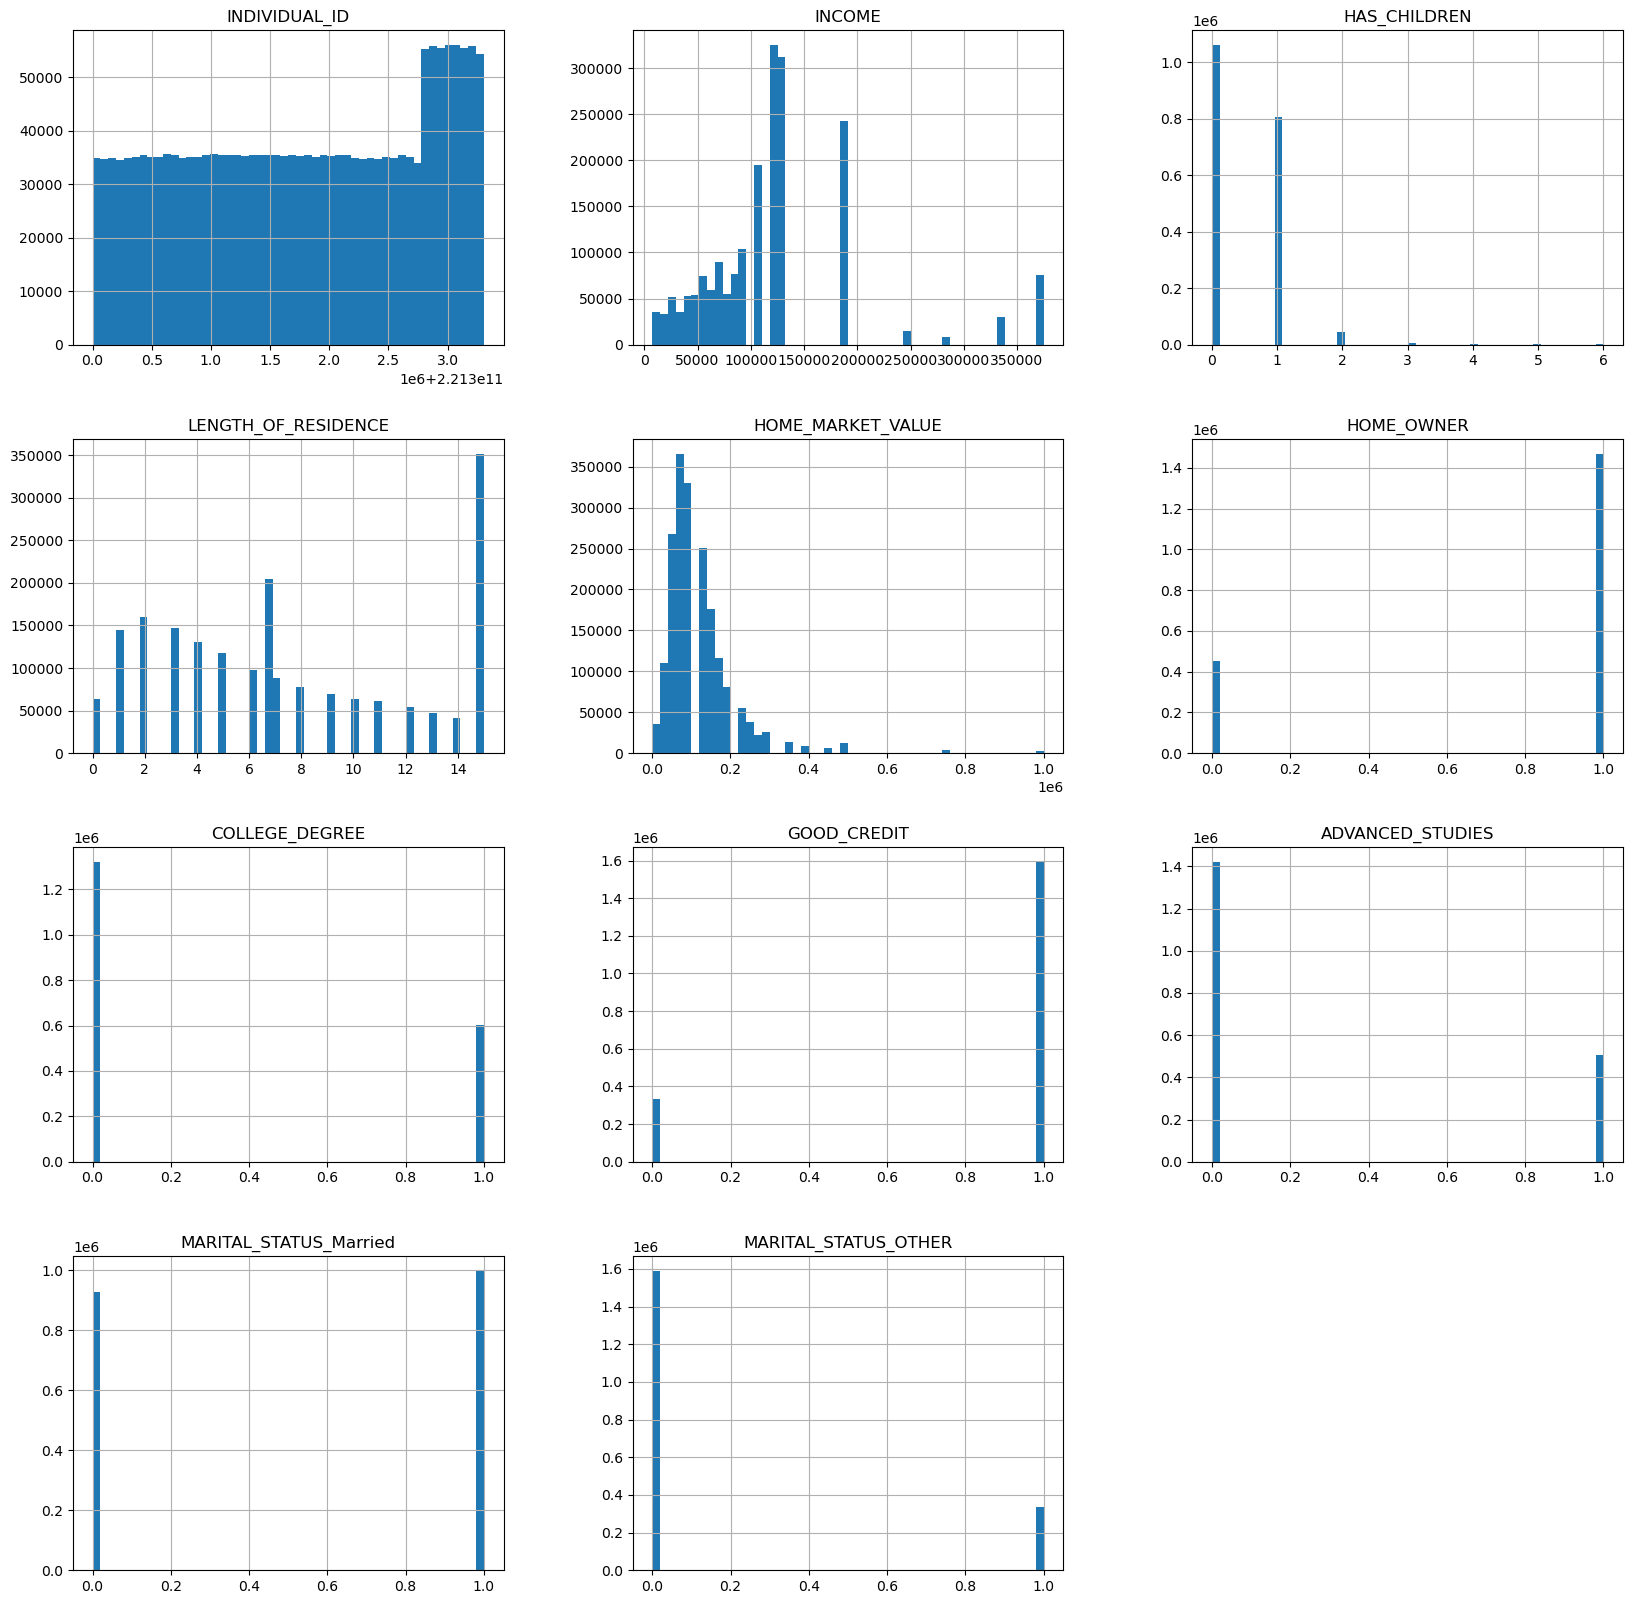

In [52]:
df_demographics_clean.hist(figsize=(20, 20), bins=50)

<Axes: >

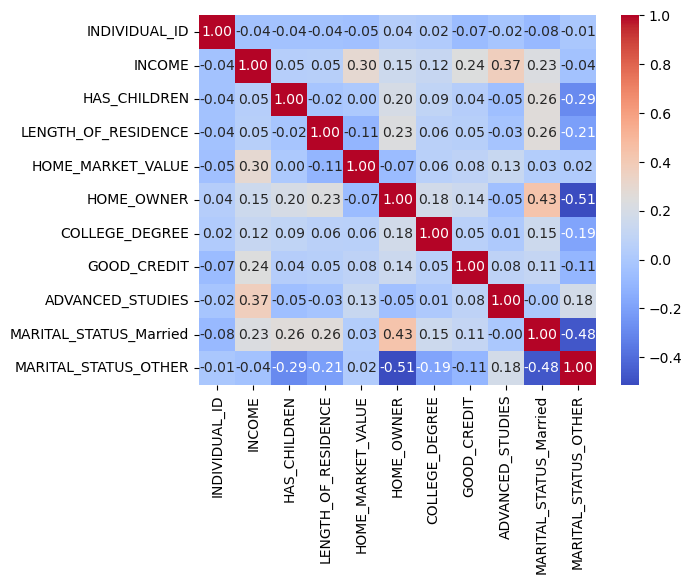

In [53]:
sns.heatmap(df_demographics_clean.corr(), annot=True, cmap="coolwarm", fmt = ".2f")

Based on the provided histograms and heatmap of correlation coefficients, I already have some insights:

1. *Income Distribution*: The `INCOME` histogram suggests a right-skewed distribution with a concentration of individuals at lower income levels and fewer individuals at higher income levels. This is typical for income data.

2. *Home Ownership and Marital Status*: The heatmap shows a moderate positive correlation between being a home owner and being married (`MARITAL_STATUS_Married`). This might suggest that married individuals are more likely to own a home.

3. *Home Ownership and Length of Residence*: The heatmap indicates a positive correlation between them, which could imply that home owners tned to reside longer in their homes. 

4. *ADVANCED_STUDIES and INCOME*: There is a positive correlation between them, suggesting that people with advanced studies tend to have higher income

I will start with investigating the column `LENGTH_OF_RESIDENCE`:

In [54]:
df_demographics_clean.LENGTH_OF_RESIDENCE.value_counts().sort_index()

0.000      63830
1.000     145004
2.000     159752
3.000     147051
4.000     130328
5.000     117949
6.000      98056
6.801     205068
7.000      88383
8.000      78126
9.000      70038
10.000     63443
11.000     61622
12.000     53968
13.000     46605
14.000     41597
15.000    351554
Name: LENGTH_OF_RESIDENCE, dtype: int64

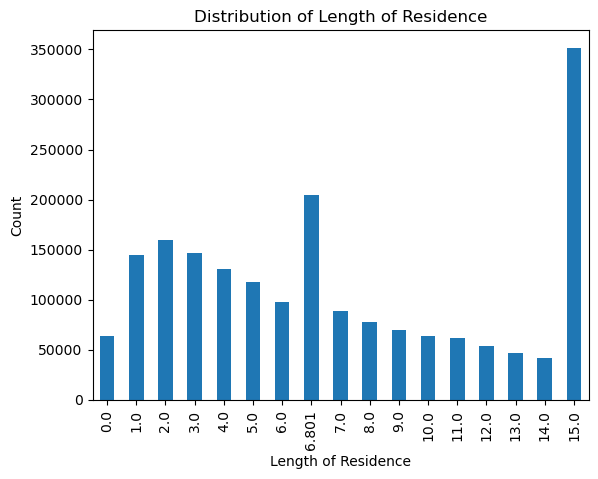

In [55]:
# plot a bar chart of the LENGTH_OF_RESIDENCE
df_demographics_clean.LENGTH_OF_RESIDENCE.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Length of Residence")
plt.ylabel("Count")
plt.title("Distribution of Length of Residence")
plt.show()

Here, it seems that the 6.801 entries are wrong. Note that this is exactly the mean value of this column, thus, I assume that those were missing values that were simply replaced by the mean. This imputation strategy is definitely questionable, but I assume that this was discussed with the business expert beforehand. Thus, for my analysis I assume they can be replaced with the nearest integer, i.e. 7, to keep the format stable (in real life this should be discussed with the business Expert).

In [56]:
df_demographics_clean.loc[df_demographics_clean.LENGTH_OF_RESIDENCE == 6.801,"LENGTH_OF_RESIDENCE"] = 7

# change to type int8 to make more memory efficient
df_demographics_clean["LENGTH_OF_RESIDENCE"] = df_demographics_clean["LENGTH_OF_RESIDENCE"].astype("int8")

This will still result in a not perfectly clean distribution, because of the extreme value counts for 7 and 15. This, however, is not necessarily wrong (should check this with the business expert, but not possible here). 

In [57]:
df_demographics_clean.INCOME.value_counts().sort_index()

7500.000       35528
18750.000      32826
26250.000      51368
33750.000      35234
41250.000      52698
48750.000      53765
56250.000      74471
63750.000      59162
71250.000      89531
78750.000      54553
86250.000      76091
93750.000     103852
105000.000    195177
120558.264    324972
131250.000    312314
187500.000    242540
243750.000     15003
281250.000      8198
337500.000     29801
375000.000     75290
Name: INCOME, dtype: int64

This looks like INCOME is divided into segments, i.e. should be integer. The only float is 120558.264, which can be rounded to 120500. Thus, I can tranform it to integer.

In [58]:
df_demographics_clean.loc[df_demographics_clean.INCOME == 120558.264, "INCOME"] = 120500
df_demographics_clean["INCOME"] = df_demographics_clean["INCOME"].astype("int32")

In [59]:
# check memory usage
df_demographics_clean.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1922374 entries, 0 to 2112578
Data columns (total 11 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   INDIVIDUAL_ID           float64
 1   INCOME                  int32  
 2   HAS_CHILDREN            uint8  
 3   LENGTH_OF_RESIDENCE     int8   
 4   HOME_MARKET_VALUE       int32  
 5   HOME_OWNER              uint8  
 6   COLLEGE_DEGREE          uint8  
 7   GOOD_CREDIT             uint8  
 8   ADVANCED_STUDIES        uint8  
 9   MARITAL_STATUS_Married  uint8  
 10  MARITAL_STATUS_OTHER    uint8  
dtypes: float64(1), int32(2), int8(1), uint8(7)
memory usage: 58.7 MB


Looking at the dtypes, I see that I should change INCOME, HAS_CHILDREN, LENGTH_OF_RESIDENCE, and MARITAL_STATUS to int. Note that even INCOME is an integer. Looking at the output from the value counts, there is only one single float, thus, I assume those to be not the actual incomes, but rather approximations.

Note: I reduced the memory usage for this df from almost 500 MB to only 60 MB. This is a great improvement and will help later on (by making it faster)

The next step includes looking at the distributions of the three numerical variables "INCOME", "LENGTH_OF_RESIDENCE", and "HOME_MV_INTERVAL":

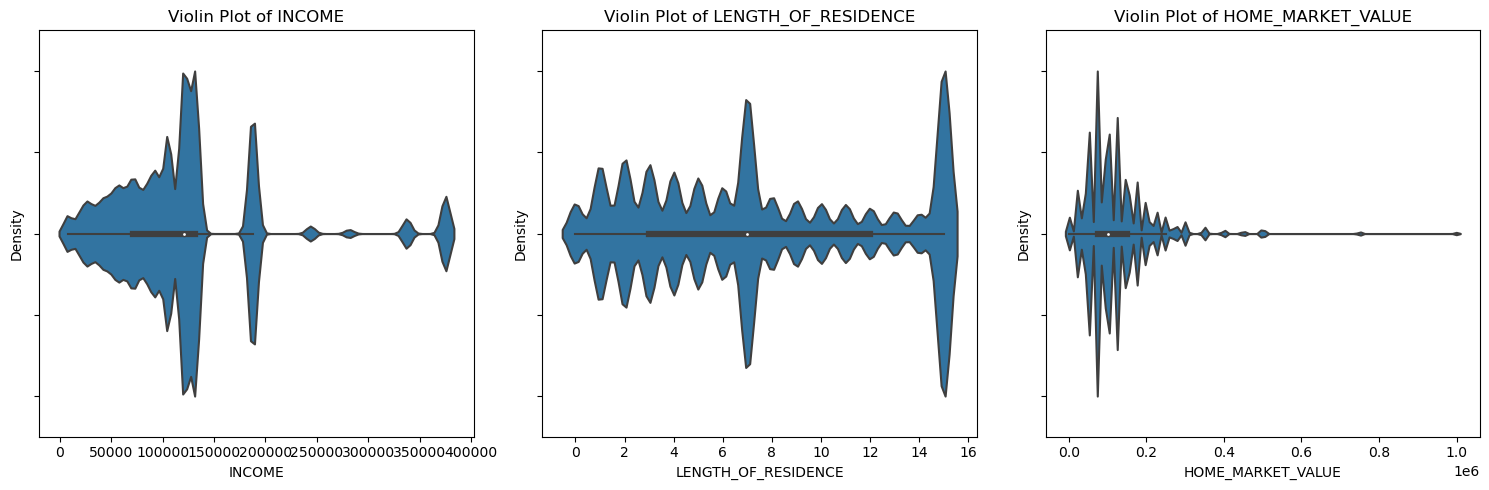

In [60]:
# Features to look at
numerical_features = ["INCOME", "LENGTH_OF_RESIDENCE", "HOME_MARKET_VALUE"]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Go through each variable and create the violin plot
for i, var in enumerate(numerical_features):
    # Plot violin plot for each numerical feature
    sns.violinplot(x=df_demographics_clean[var], ax=axes[i]) 
    axes[i].set_title(f"Violin Plot of {var}")
    
    # Set labels
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Density")
    
    # Improve tick label formatting if necessary
    axes[i].yaxis.set_major_locator(plt.MaxNLocator(6))  # Reduce the number of y-ticks to avoid clutter

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

I decided to plot a violin plot for the two variables INCOME and LENGTH_OF_RESIDENCE, as it offers a rich visualization of data distribution, showing both the multimodality and the spread of the data in a single view, something that a boxplot lacks. Note that the multimodality here is because all of those are integers. As I have a decent range of intergers, a violin plot is still very useful.

INCOME:<br>
Here we can see that there are many datapoints outside the IQR-rule range. An income of around 375k, however, even extremely high, is still possible. Thus, the next step only includes creating an indicator column for the outliers, just as I did in the previous part.

LENGTH_OF_RESIDENCE:<br>
The whiskers of the boxplot end here, however, where the violin plot ends as well, so no need for an outlier column. Here, the mutlimodality is extreme for the values 7 and 15, as found out previously.<br>
Here, the distribution is a bit more problematic because of those two extreme peaks. Note: I assume that the second peak is because all values above 15 are counted as 15, i.e., 15 is a cap-value.

HOME_MV_INTERVAL:<br>
In this right-skewed bar chart, meaning there are more occurrences of lower-valued homes compared to higher-valued ones. Again, an indicator column for the outliers might be useful here.<br>
The distribution is extremely right skewed. This makes, as explained before already, sense.

In [61]:
df_demographics_clean["INCOME_IS_OUTLIER"] = outliers(df_demographics_clean, "INCOME")
df_demographics_clean["HOME_MARKET_VALUE_IS_OUTLIER"] = outliers(df_demographics_clean, "HOME_MARKET_VALUE")

Coming from the univariate EDA of this part and going to the bivariate EDA. It would be interesting to analyze whether the marital status, being a home owner or not, having a college degree, having good credit, or having pursured advanced studies has an impact on INCOME:

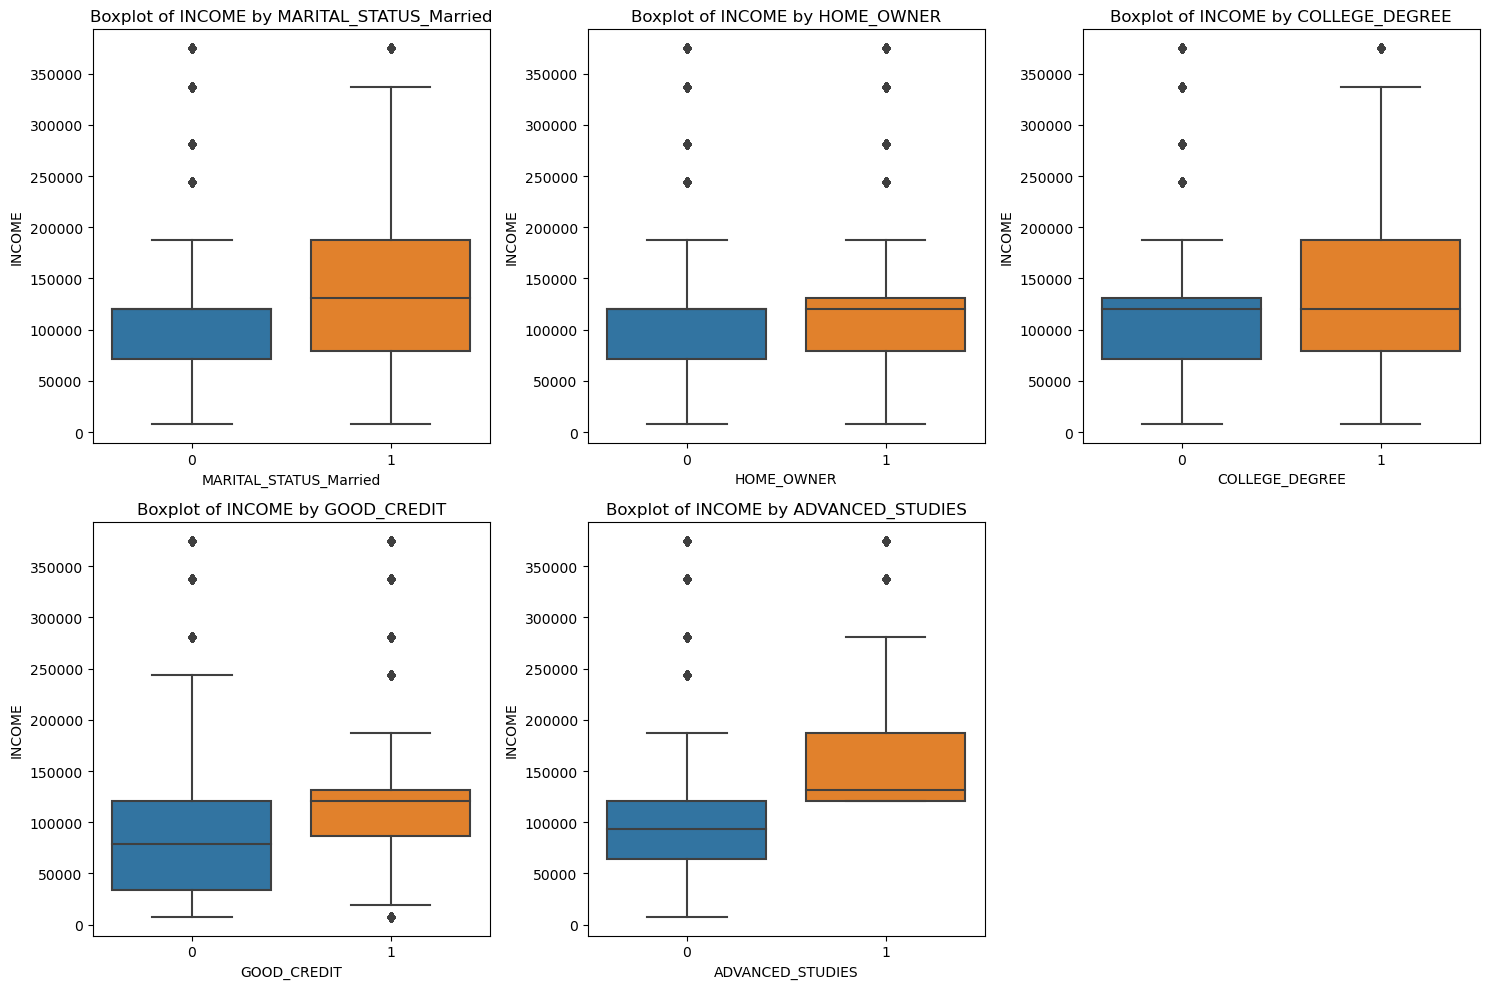

In [62]:
# Features to look at
comp_features = ["MARITAL_STATUS_Married", "HOME_OWNER", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES"]

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # Adjusted for better aspect ratio
axes = axes.flatten()  # Flatten the 2x3 axes array for easy iteration

# Go through each variable and create the appropriate plot
for ax, var in zip(axes, comp_features):
    # Plot boxplot for each feature against INCOME
    sns.boxplot(data=df_demographics_clean, x=var, y="INCOME", ax=ax)
    ax.set_title(f"Boxplot of INCOME by {var}")
    
    # Set labels
    ax.set_xlabel(var)
    ax.set_ylabel("INCOME")

# If there are more axes than features, turn off the remaining axes.
for i in range(len(comp_features), len(axes)):
    axes[i].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


The biggest impact does ADVCANCED_STUDIES have. The lower bound of the Income of people that pursued advanced studies is the same as the Q3 value of others' income. Having a college degree has a similar affect as being married. The lowerbounds seem similar, but the boxplots of married people / people with a college degree reach way further into the high-income segment. The median income for people with a good credit is higher than those without, but the income values of people with a bad credit have a higher range, lowerbound, however, being very similar in both. The least affect seems being a home owner to have. Those two boxplots are very similar.

Further, I could have a look at the relationship between INCOME, LENGTH_OF_RESIDENCE, and HOME_MARKET_VALUE (/HOME_MARKET_VALUE_INTERVAL):

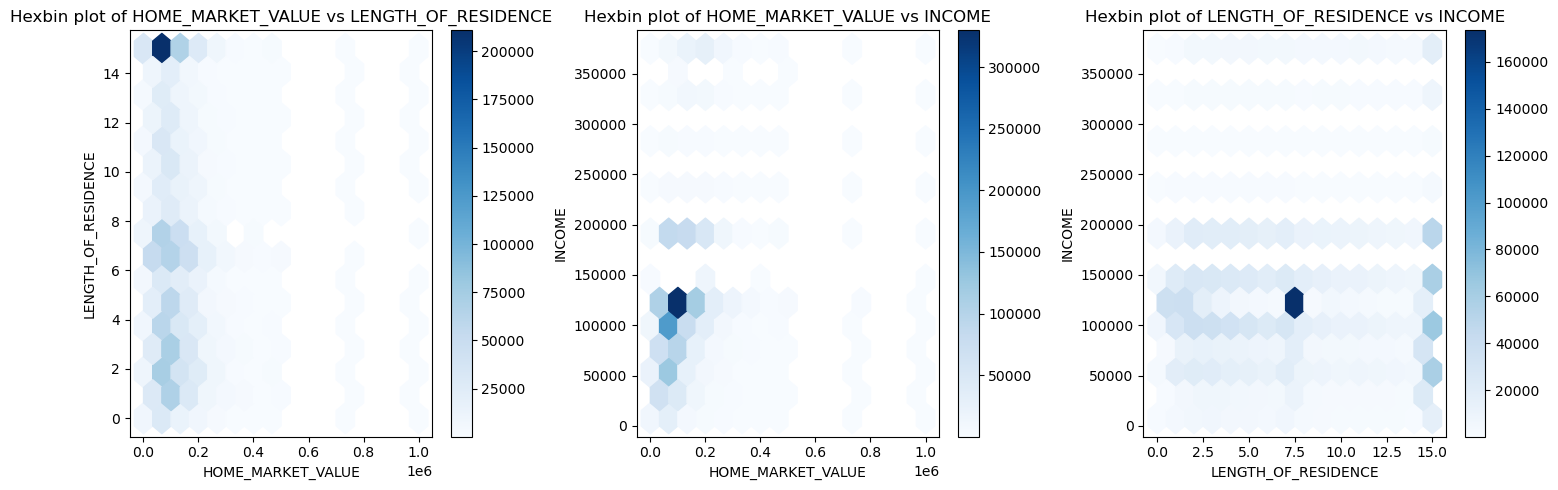

In [63]:
items = ["HOME_MARKET_VALUE", "LENGTH_OF_RESIDENCE", "INCOME"]

# Get all combinations of the given length
comb = list(itertools.combinations(items, 2))

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, pair in enumerate(comb):
    # Plot hexbin for each combination on its respective subplot
    hb = axes[i].hexbin(df_demographics_clean[pair[0]], df_demographics_clean[pair[1]], gridsize=15, cmap='Blues', mincnt=1)
    axes[i].set_title(f"Hexbin plot of {pair[0]} vs {pair[1]}")
    
    # Set labels
    axes[i].set_xlabel(pair[0])
    axes[i].set_ylabel(pair[1])

    # Add a color bar to show the count in bins
    plt.colorbar(hb, ax=axes[i])

# Adjust layout for a clean look
plt.tight_layout()

# Show the plot
plt.show()


There appears to be a fairly even distribution of residence lengths across the various home market value intervals, suggesting no strong relationship between the length of residence and the value interval of homes. A similar pattern can be observed in the third plot between LENGTH_OF_RESIDENCE and INCOME, implying that the length of residence does not strongly correlate with income The second plot, however, suggests that higher income levels are more frequently associated with higher home market value intervals. This could indicate that individuals with higher incomes tend to own or reside in homes with higher market values.

Again, I would like to end this part of the EDA with a short look at the histograms, a short correlation analysis and then reordering the dataframe:

array([[<Axes: title={'center': 'INDIVIDUAL_ID'}>,
        <Axes: title={'center': 'INCOME'}>,
        <Axes: title={'center': 'HAS_CHILDREN'}>,
        <Axes: title={'center': 'LENGTH_OF_RESIDENCE'}>],
       [<Axes: title={'center': 'HOME_MARKET_VALUE'}>,
        <Axes: title={'center': 'HOME_OWNER'}>,
        <Axes: title={'center': 'COLLEGE_DEGREE'}>,
        <Axes: title={'center': 'GOOD_CREDIT'}>],
       [<Axes: title={'center': 'ADVANCED_STUDIES'}>,
        <Axes: title={'center': 'MARITAL_STATUS_Married'}>,
        <Axes: title={'center': 'MARITAL_STATUS_OTHER'}>,
        <Axes: title={'center': 'INCOME_IS_OUTLIER'}>],
       [<Axes: title={'center': 'HOME_MARKET_VALUE_IS_OUTLIER'}>,
        <Axes: >, <Axes: >, <Axes: >]], dtype=object)

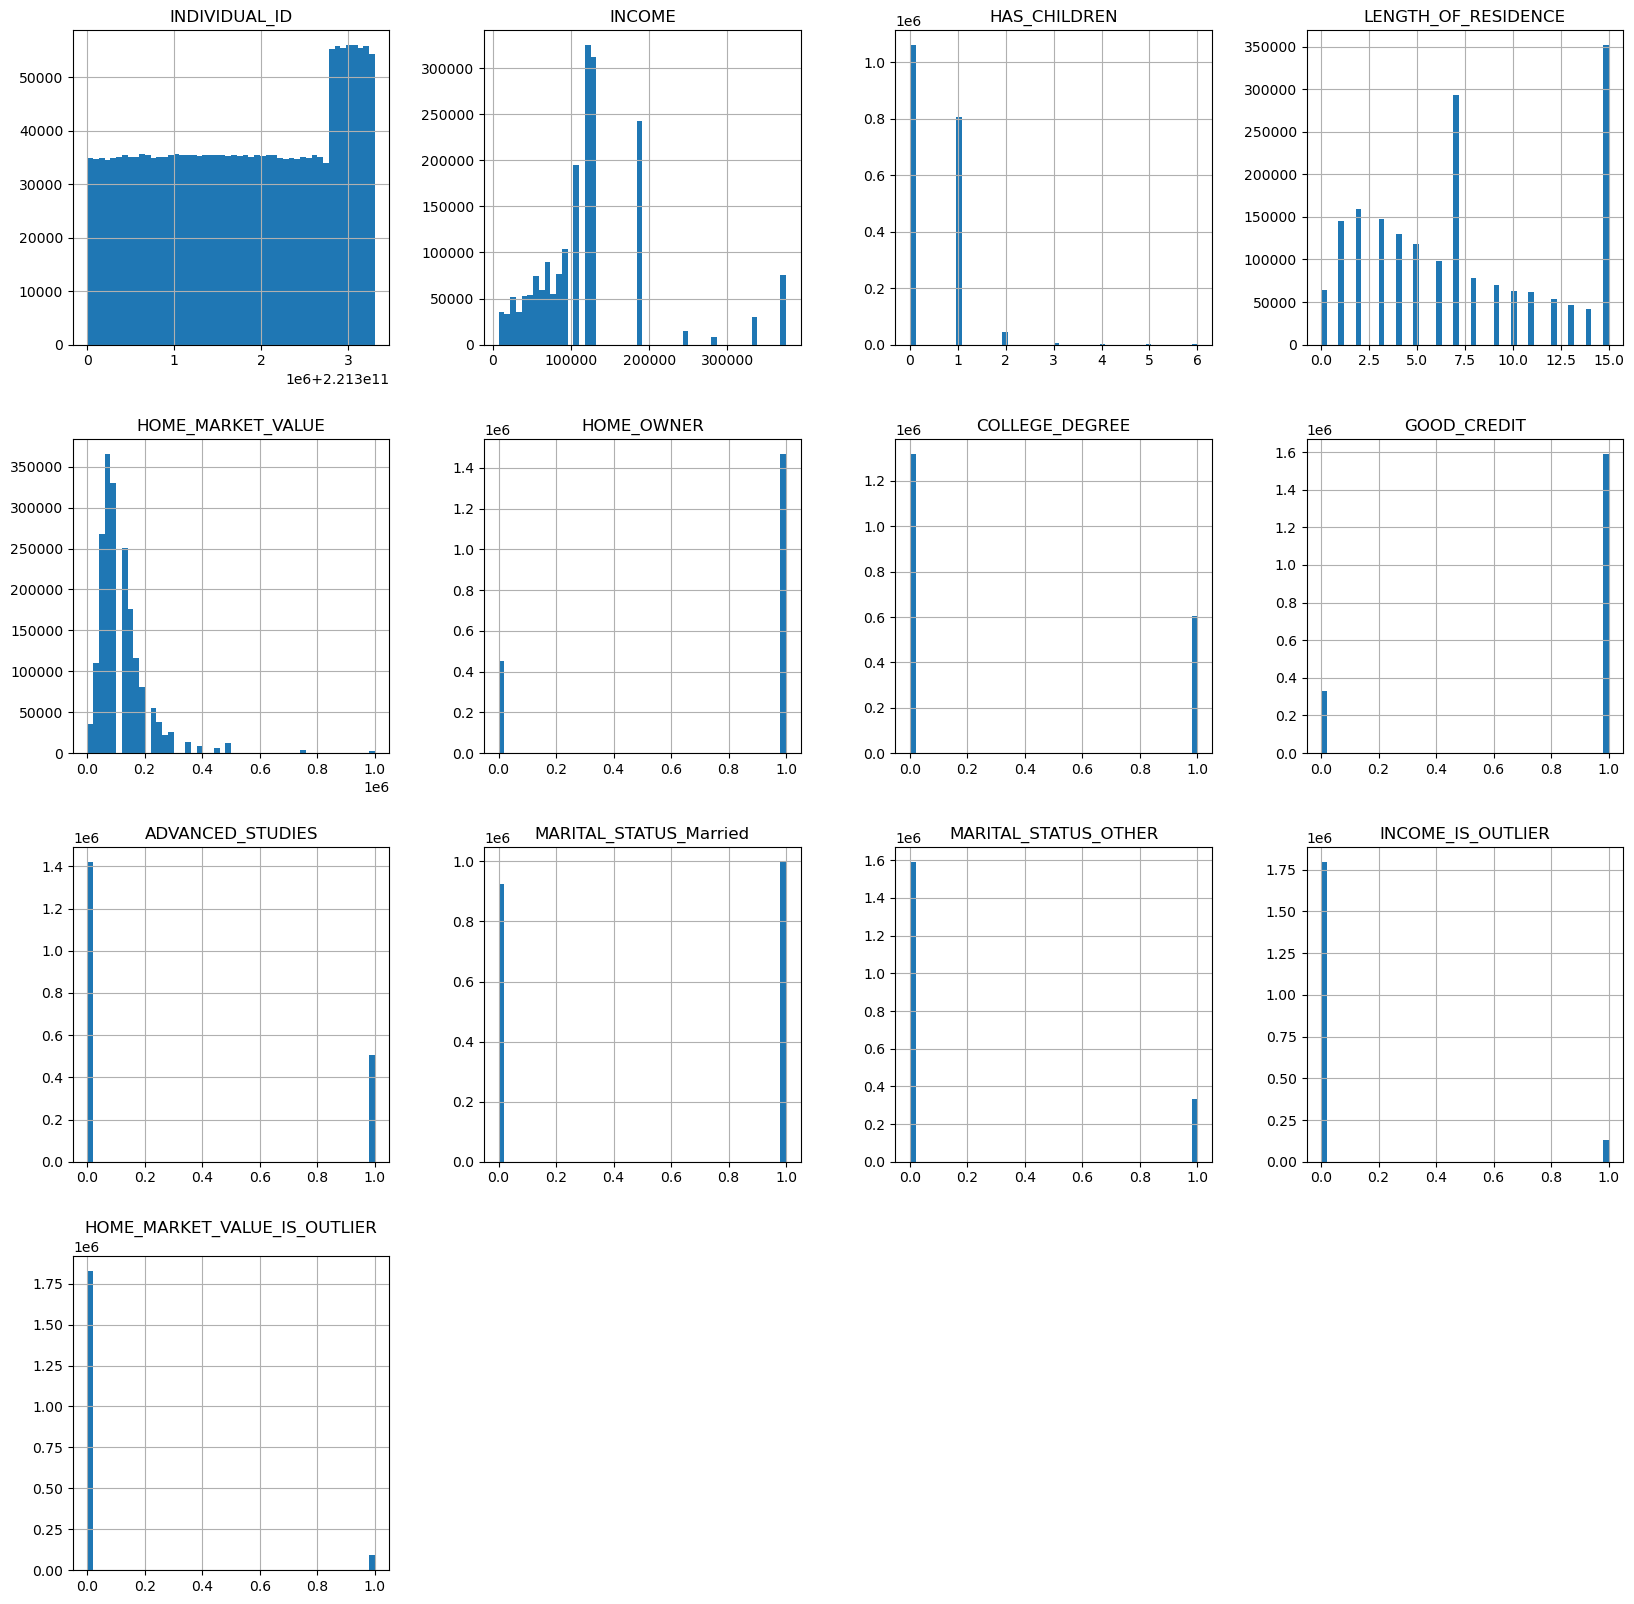

In [64]:
df_demographics_clean.hist(figsize=(20, 20), bins=50)

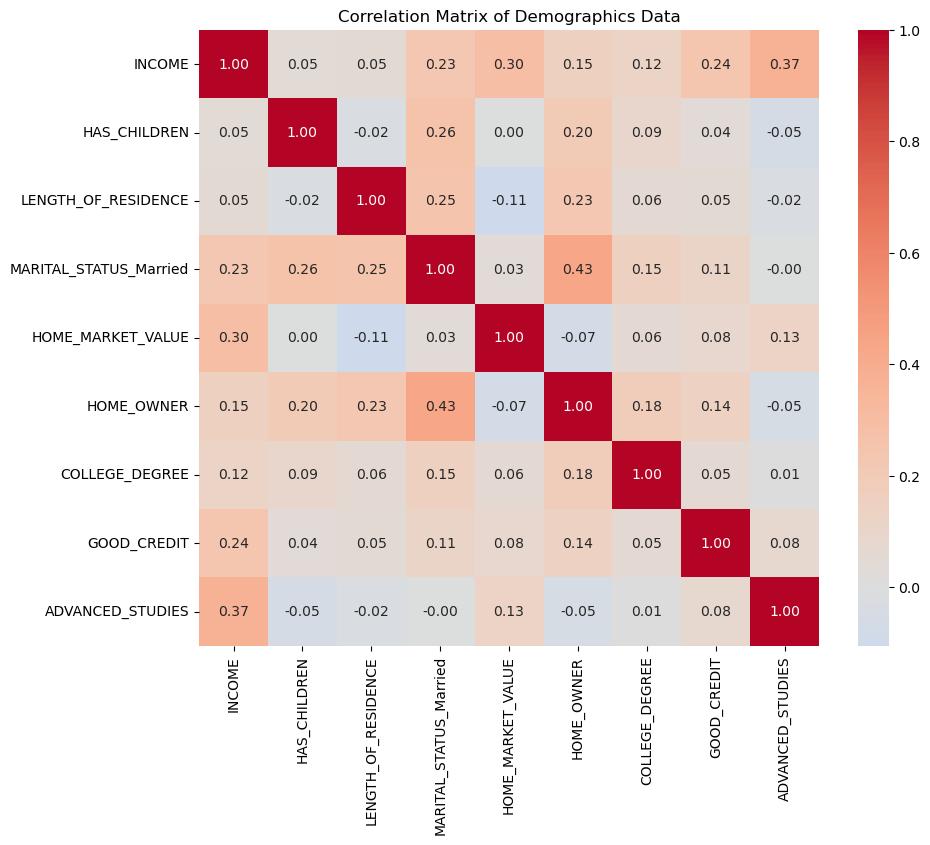

In [65]:
# Heatmap for the correlation matrix of the numerical features and binary features
plt.figure(figsize=(10, 8))
heatmap_demo_features = ["MARITAL_STATUS_Married" if "MARITAL_STATUS" in col else col for col in df_demographics.columns]
heatmap_demo_features.remove("INDIVIDUAL_ID")
sns.heatmap(df_demographics_clean[heatmap_demo_features].corr(), annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Matrix of Demographics Data")
plt.show()

As I already found out earlier, there is a slight positive relationship between `INCOME` & `ADVANCED_STUDIES` and also with `GOOD_CREDIT`. Something that is also observable here is that there is a positive relationship between `HOME_OWNER` & `MARITAL_STATUS_Married`, `LENGTH_OF_RESIDENCE` and also with `HAS_CHILDREN`.

The histograms reveal a skewed distribution in several features, particularly `INCOME` and `HOME_MARKET_VALUE`, indicating that a larger proportion of the dataset's individuals have lower income and home market values, with a few outliers at the higher end.

In [66]:
# Reordering the columns
demographics_order = ["INDIVIDUAL_ID", "INCOME", "INCOME_IS_OUTLIER", "COLLEGE_DEGREE", "GOOD_CREDIT", "ADVANCED_STUDIES", "MARITAL_STATUS_Married", "MARITAL_STATUS_OTHER", "HAS_CHILDREN", "LENGTH_OF_RESIDENCE", "HOME_OWNER", "HOME_MARKET_VALUE", "HOME_MARKET_VALUE_IS_OUTLIER"]
df_demographics_clean = df_demographics_clean[demographics_order]


**Final remarks on Metrics to measure data quality**:✅

• *Completeness*:
Data values are present<br>
-> The cleaned dataset does not have any missing values. ✅<br><br>
• *Consistency*:
Data satisfies constraints (format, allowable ranges and values, domain rules)<br>
-> There are no unrealistic values in the cleaned dataset and all the dtypes were adjusted. ✅<br><br>
• *Correctness*:
Values are true and unbiased with respect to their real-world state<br>
-> I believe that the values in INCOME and HOUSE_MARKET_VALUE are a bit arbitrary. Also, the values in LENGTH_OF_RESIDENCE, that even lead to a not common distribution are in my opinion a bit off. Yet, this is definitely not unusable! (✅)<br><br>
• *Uniqueness*:
Records representing a single customer are not replicated<br>
-> There are no duplicates. ✅<br><br>
• *Timeliness*:
Data is up-to-date to their real-world state for the task in hand<br>
-> I have to assume that this is given, as there is no way for me to check. (✅)<br><br>
• *Stability*:
Data inherent concepts and statistics are comparable among sources over time<br>
-> Here, I have the aforementioned problem with the LENGTH_OF_RESIDENCE column, yet not as much as with the CUST_ORIG_DATE column in df_customer. Besides that it is fine (✅)<br><br>
• *Relevance*:
Data is useful for the task<br>
-> Even though the correlations between variables seem fairly low, I believe that those selected features say a lot about a person and can therefore help in further analyses. ✅<br><br>
• *Contextualization*:
Data is annotated with the acquisition context, their meaning and semantics<br>
--> Already fullfilled. See descriptions above. ✅<br><br>

<u>Metrics that should be used in general, but that I cannot check in this assignment</u>

• *Trustworthiness*:
Data can be trusted based on the reputation of the stakeholders involved in data acquisition

##### EDA for df_termination

**Metrics to measure the data quality**

• *Completeness*:
Data values are present<br><br>
• *Consistency*:
Data satisfies constraints (format, allowable ranges and values, domain rules)<br><br>
• *Correctness*:
Values are true and unbiased with respect to their real-world state<br><br>
• *Uniqueness*:
Records representing a single customer are not replicated<br><br>
• *Timeliness*:
Data is up-to-date to their real-world state for the task in hand<br><br>
• *Stability*:
Data inherent concepts and statistics are comparable among sources over time<br><br>
• *Relevance*:
Data is useful for the task<br><br>
• *Contextualization*:
Data is annotated with the acquisition context, their meaning and semantics<br>
--> Already fullfilled. See descriptions above<br><br>

<u>Metrics that should be used in general, but that I cannot check in this assignment</u>

• *Trustworthiness*:
Data can be trusted based on the reputation of the stakeholders involved in data acquisition

In [67]:
# Loading in the file
df_termination = pd.read_csv("ABC_df_termination.csv", index_col=0)

# Looking at each file in order to see overall structures
df_termination

INDIVIDUAL_ID  SUSPD_DATE
0        2.213026e+11  2022-10-09
1        2.213028e+11  2022-04-24
2        2.213027e+11  2022-05-21
3        2.213002e+11  2022-04-27
4        2.213026e+11  2022-09-16
...               ...         ...
269254   2.213022e+11  2022-01-09
269255   2.213007e+11  2022-02-27
269256   2.213030e+11  2022-03-21
269257   2.213025e+11  2022-02-26
269258   2.213024e+11  2022-09-23

[269259 rows x 2 columns]

Here, we can already see that this dataset is with 269259 rows and 2 columns by far the smallest.

In [68]:
df_termination.INDIVIDUAL_ID.value_counts()

2.213026e+11    1
2.213030e+11    1
2.213023e+11    1
2.213026e+11    1
2.213017e+11    1
               ..
2.213023e+11    1
2.213003e+11    1
2.213008e+11    1
2.213023e+11    1
2.213024e+11    1
Name: INDIVIDUAL_ID, Length: 269259, dtype: int64

Unlike the customer_df dataset, this dataset has no duplicates. Thus, **uniqueness** is not a problem. However, there might be unnecessary null values:

In [69]:
df_termination.isna().sum()

INDIVIDUAL_ID       0
SUSPD_DATE       2693
dtype: int64

Those values that are null can simply be dropped as this is the only column with information. This assures **completeness**.

In [70]:
# drop null values in the column "SUSPD_DATE"
df_termination_clean = df_termination.dropna(subset=["SUSPD_DATE"])

Now, I need to check whether the SUSPD_DATE has the right datatype (Metric: **consistency**):

In [71]:
df_termination_clean.dtypes

INDIVIDUAL_ID    float64
SUSPD_DATE        object
dtype: object

In [72]:
# change dataype of "SUSPD_DATE" to datetime
df_termination_clean["SUSPD_DATE"] = pd.to_datetime(df_termination_clean["SUSPD_DATE"], format='%Y-%m-%d')

/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_24548/3130992324.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_termination_clean["SUSPD_DATE"] = pd.to_datetime(df_termination_clean["SUSPD_DATE"], format='%Y-%m-%d')


If I want to use this as a feature for later on, it might be smart to extract the year and the month from this column

In [73]:
# Extract the year and month from the SUSPD_DATE
df_termination_clean["SUSPD_YEAR"] = df_termination_clean["SUSPD_DATE"].dt.year
df_termination_clean["SUSPD_MONTH"] = df_termination_clean["SUSPD_DATE"].dt.month

/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_24548/48924415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_termination_clean["SUSPD_YEAR"] = df_termination_clean["SUSPD_DATE"].dt.year
/var/folders/dp/96r0nmqx4vjcyxc81yzfj01r0000gn/T/ipykernel_24548/48924415.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_termination_clean["SUSPD_MONTH"] = df_termination_clean["SUSPD_DATE"].dt.month


Now, just as for the analysis with the joining date, it might be interesting to see when people terminate their contracts.

In [74]:
df_termination_clean.SUSPD_DATE.value_counts().sort_values()

2026-10-30      1
2026-04-17      1
2025-12-23      1
2020-07-28      1
2020-11-15      1
             ... 
2022-08-23    920
2021-12-10    923
2022-09-20    923
2022-08-14    936
2022-03-17    938
Name: SUSPD_DATE, Length: 2086, dtype: int64

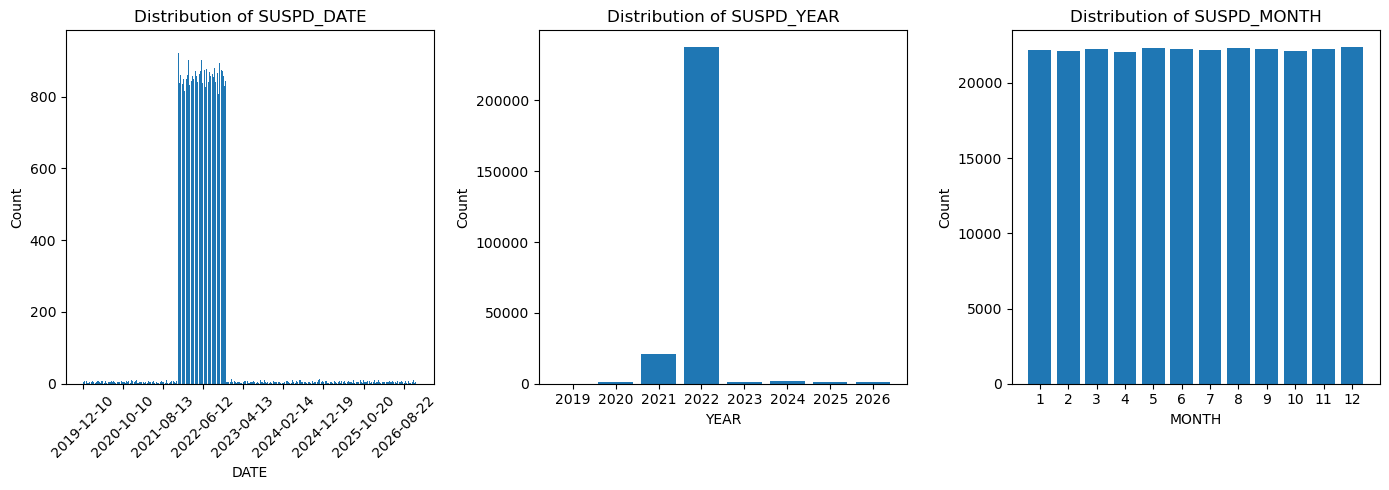

In [75]:
date_features = ["SUSPD_DATE", "SUSPD_YEAR", "SUSPD_MONTH"]

# Set up the matplotlib figure and axes for 2 plots side by side
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
data_series = []

for i, var in enumerate(date_features):
    # Prepare data set - group by the year part of the date
    data = df_termination_clean.groupby(df_termination_clean[var]).INDIVIDUAL_ID.agg("count")
    if var == "SUSPD_DATE":
        data.index = data.index.astype(str)
    else:
        data.index = data.index.astype(int)

    # Bar chart
    axes[i].bar(data.index, data.values)
    axes[i].set_xticks(data.index)
    axes[i].set_xlabel(var.split("_")[1])
    axes[i].set_ylabel("Count")
    axes[i].set_title(f"Distribution of {var}")

    # Rotate labels
    if len(data.index) > 12:
        axes[i].set_xticklabels(data.index, rotation=45)
        # Reduce the number of x-ticks to avoid clutter
        axes[i].xaxis.set_major_locator(plt.MaxNLocator(10))


plt.tight_layout()  # Adjust layout to make room for the plots
plt.show()

Due to those graphs, especially the ones for `SUSPD_DATE` and `SUSPD_YEAR`, it is noticable why the CEO is worried. It is evident that most of the terminations took place in 2022, without any distinction between the months.

It can be further noticed, that some of those dates are in the future. This is, however, not necessarily wrong, as the customer might have the opportunity to cancel the contract well in advance (in the real world this should be checked, if it is indeed possible). Thus, I (naively?)believe in the **correctness** of the data. I need to see this in relation with the ages though. My initial though is that the insurance for most of the people who are in a high age-sector was terminated, because the client passed away.

**Final remarks on Metrics to measure data quality**:

• *Completeness*:
Data values are present<br>
-> I do not have any missing values anymore. ✅<br><br>
• *Consistency*:
Data satisfies constraints (format, allowable ranges and values, domain rules)<br>
-> dytpes are correct ranges are assumed to be okay. ✅<br><br>
• *Correctness*:
Values are true and unbiased with respect to their real-world state<br>
-> As aforementioned, this still needs to be checked, when combining it with the other dataframes! ❓ <br><br>
• *Uniqueness*:
Records representing a single customer are not replicated<br>
-> There are no duplicates. ✅<br><br>
• *Timeliness*:
Data is up-to-date to their real-world state for the task in hand<br>
-> Just as with correctness, I will look at this metric later on again. ❓<br><br>
• *Stability*:
Data inherent concepts and statistics are comparable among sources over time<br>
-> As I have only one column, this is given. ✅<br><br>
• *Relevance*:
Data is useful for the task<br>
-> Especially when analyzing the churn, this is an extremely valuable dataset ✅<br><br>
• *Contextualization*:
Data is annotated with the acquisition context, their meaning and semantics<br>
--> Already fullfilled. See descriptions above. ✅<br><br>

<u>Metrics that should be used in general, but that I cannot check in this assignment</u>

• *Trustworthiness*:
Data can be trusted based on the reputation of the stakeholders involved in data acquisition

##### [Cross-EDA] df_cust_term: df_customer_clean with df_termination_clean

Not all customers already have a termination date, thus the df_customer_clean and df_termination_clean should be merged with a left join. This will result in df_cust_term.

In [76]:
# joining df_customer_clean and df_termination_clean on "INDIVIDUAL_ID"
df_cust_term = df_customer_clean.merge(df_termination_clean, on="INDIVIDUAL_ID", how="left")

# adding a new column "CUST_TERM" to df_cust_term indicating whether the customer has terminated (1) or not (0)
df_cust_term["CUST_TERM"] = df_cust_term["SUSPD_DATE"].notna().astype(int).astype('uint8')

df_cust_term.head()

INDIVIDUAL_ID DATE_OF_BIRTH CUST_ORIG_DATE  CURR_ANN_AMT_CAR  \
0   2.213000e+11    1956-07-30     2005-09-11       1694.050321   
1   2.213000e+11    1963-12-29     2010-08-11       1337.936100   
2   2.213000e+11    1986-04-25     2005-09-11       1641.116276   
3   2.213000e+11    1958-04-28     2005-09-11       1195.119342   
4   2.213000e+11    1988-04-21     2021-06-01       1598.554718   

   CURR_ANN_AMT_CAR_IS_OUTLIER  CURR_ANN_AMT_HEALTH  \
0                            0           771.798211   
1                            0           582.349567   
2                            0           618.987259   
3                            0           327.713357   
4                            0           448.258619   

   CURR_ANN_AMT_HEALTH_IS_OUTLIER  CURR_ANN_AMT_HOUSE  \
0                               0               531.0   
1                               0               386.0   
2                               0               461.0   
3                               0               333.0   
4                               0               492.0   

   CURR_ANN_AMT_HOUSE_IS_OUTLIER  CURR_ANN_AMT_TOTAL  AGE  AGE_IS_OUTLIER  \
0                              0         2996.848532   66               0   
1                              0         2306.285667   58               0   
2                              0         2721.103535   36               0   
3                              0         1855.832699   64               0   
4                              0         2538.813337   34               0   

  SUSPD_DATE  SUSPD_YEAR  SUSPD_MONTH  CUST_TERM  
0        NaT         NaN          NaN          0  
1        NaT         NaN          NaN          0  
2        NaT         NaN          NaN          0  
3        NaT         NaN          NaN          0  
4        NaT         NaN          NaN          0

As aforementioned, some of the contract terminations could be attributed to the passing of the client.

Text(0.5, 1.0, 'Percentage of terminated customers by age')

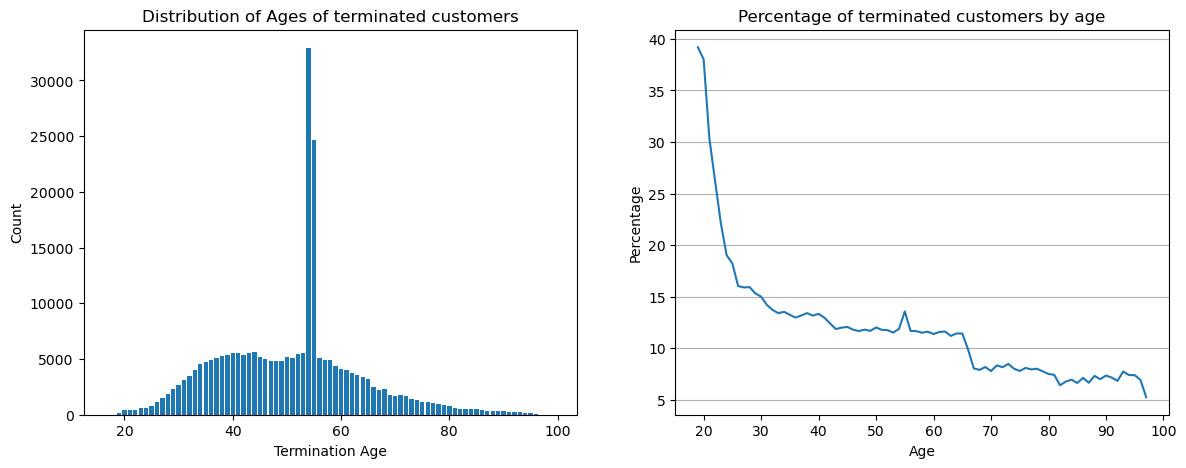

In [77]:
# Calulating the termination age with DATE_OF_BIRTH and SUSPD_DATE
df_cust_term["TERM_AGE"] = df_cust_term["SUSPD_DATE"].dt.year - df_cust_term["DATE_OF_BIRTH"].dt.year - (
    (df_cust_term["SUSPD_DATE"].dt.month < df_cust_term["DATE_OF_BIRTH"].dt.month) |
    ((df_cust_term["SUSPD_DATE"].dt.month == df_cust_term["DATE_OF_BIRTH"].dt.month) & (df_cust_term["SUSPD_DATE"].dt.day < df_cust_term["DATE_OF_BIRTH"].dt.day))
)

# filtering the rows with SUSPD_DATE not null
df_terminated_cust = df_cust_term.dropna(subset=["TERM_AGE"])

# grouping by TERM_AGE and counting the number of terminated customers
term_data = df_terminated_cust.groupby("TERM_AGE").INDIVIDUAL_ID.agg("count")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Looking at the age distribution of the terminated customers
axes[0].bar(term_data.index, term_data.values)
axes[0].set_xlabel("Termination Age")
axes[0].set_ylabel("Count")
axes[0].set_title("Distribution of Ages of terminated customers")

# What is the percentage of customers who have terminated their contract for each age?
age_termination = df_terminated_cust.groupby("AGE").INDIVIDUAL_ID.count()
age_total = df_customer_clean.groupby("AGE").INDIVIDUAL_ID.count()
age_termination_percentage = (age_termination / age_total) * 100

# Plot the percentage of customers who have terminated their contract for each age
axes[1].plot(age_termination_percentage)
axes[1].grid(axis="y")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Percentage")
axes[1].set_title("Percentage of terminated customers by age")

Those two graphs depict the age distribution of terminated customers, with the first graph showing an absolute count and the second graph showing the relative percentage by age. The distribution appears to be right-skewed with a peak in the earlier age ranges, which might suggest that customer terminations are more frequent at younger ages. This could reflect a variety of factors, such as younger individuals being more prone to changing service providers or lifestyles leading to higher customer turnover. The percentage graph shows a steep decline from the youngest ages and then levels off, indicating that termination as a percentage of the age group is much higher for younger customers. This is in contrast to what might be expected if terminations were primarily due to mortality, as one would typically expect an increase in terminations with increasing age due to higher mortality rates in older populations. The data suggests that factors other than age-related mortality are driving customer terminations.

Even though the data **correctness** here is questionable, I can look at how long each customer is at ABC insurance. The customer lifetime value was also a concern of the CEO. This can, however, not be computed, because I only have the current annual data of the customer value, not a time series. Thus, the data does not get a 10/10 in the data-quality category **Relevance**.

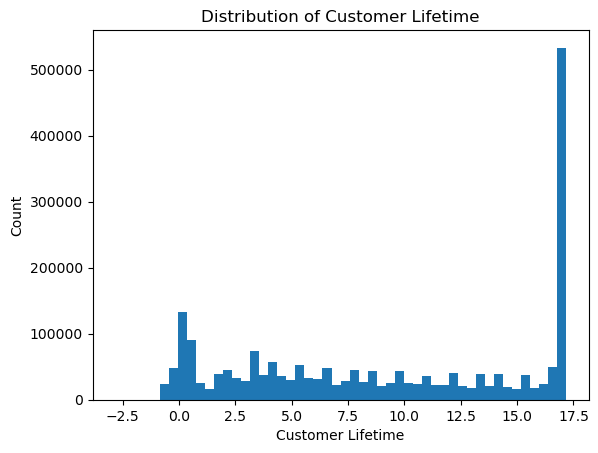

In [78]:
# Calculating the customer lifespan
# For those where SUSP_DATE is not null, we calculate the difference between SUSP_DATE and CUST_ORIG_DATE
df_cust_term["CUST_LIFETIME"] = (df_cust_term["SUSPD_DATE"].dt.year - df_cust_term["CUST_ORIG_DATE"].dt.year) \
                                + ((df_cust_term["SUSPD_DATE"].dt.month - df_cust_term["CUST_ORIG_DATE"].dt.month) / 12)

# For those where SUSP_DATE is null or SUSP_DATE is in the futzre, we calculate the difference between the current date and CUST_ORIG_DATE
condition = (df_cust_term["SUSPD_DATE"].isna()) | (df_cust_term["SUSPD_DATE"] > current_date)
df_cust_term.loc[condition, "CUST_LIFETIME"] = (current_date.year - df_cust_term.loc[condition, "CUST_ORIG_DATE"].dt.year) \
                                + ((current_date.month - df_cust_term.loc[condition, "CUST_ORIG_DATE"].dt.month) / 12)

# Plot the histogram of the customer lifetime
plt.hist(df_cust_term["CUST_LIFETIME"], bins = 50)
plt.xlabel("Customer Lifetime")
plt.ylabel("Count")
plt.title("Distribution of Customer Lifetime")
plt.show()

In [79]:
df_cust_term[df_cust_term.CUST_LIFETIME < 0].count()

INDIVIDUAL_ID                     74094
DATE_OF_BIRTH                     74094
CUST_ORIG_DATE                    74094
CURR_ANN_AMT_CAR                  74094
CURR_ANN_AMT_CAR_IS_OUTLIER       74094
CURR_ANN_AMT_HEALTH               74094
CURR_ANN_AMT_HEALTH_IS_OUTLIER    74094
CURR_ANN_AMT_HOUSE                74094
CURR_ANN_AMT_HOUSE_IS_OUTLIER     74094
CURR_ANN_AMT_TOTAL                74094
AGE                               74094
AGE_IS_OUTLIER                    74094
SUSPD_DATE                        74094
SUSPD_YEAR                        74094
SUSPD_MONTH                       74094
CUST_TERM                         74094
TERM_AGE                          74094
CUST_LIFETIME                     74094
dtype: int64

Some of the customer lifetimes are negative, i.e., they terminated their contract before entering it. This cannot be true. Note that it is not only this column that is weird for those entries, but also `CUST_ORIG_DATE` and `SUSPD_DATE` are affected (obviously). From those insights it might be, however, sufficient to simply keep the boolean column indicating whether a customer terminated or not and the customer lifetime. Again, I doubt the **correctness** of those values, but this is all I have. That being the case, I can replace the values in `CUST_LIFETIME` < 0 simply with zero and remove the non-necessary columns.

In [80]:
# replace the values where CUST_LIFETIME < 0 with 0
df_cust_term.loc[df_cust_term.CUST_LIFETIME < 0, "CUST_LIFETIME"] = 0

In [81]:
# drop the columns that are not needed
df_cust_term = df_cust_term.drop(["DATE_OF_BIRTH", "CUST_ORIG_DATE", "SUSPD_DATE", "SUSPD_YEAR", "SUSPD_MONTH", "TERM_AGE"], axis=1)

##### [Cross-EDA] df_combined: df_cust_term with df_demographics_clean

The correct join for the dataframes df_cust_term and df_demographics_clean is inner join as a left join would cause 167,562 NaN values which cannot be used for any ML approach later on. A right join makes least sense as demographics without the business related data don't give me anything.<br>
Note: Direction: df_cust_term (Left) and df_demographics_clean (right) as shown in the code below.

In [82]:
# joining df_cust_term and df_demographics_clean on "INDIVIDUAL_ID"
df_combined= df_cust_term.merge(df_demographics_clean, on="INDIVIDUAL_ID", how="inner")

df_combined.head()

INDIVIDUAL_ID  CURR_ANN_AMT_CAR  CURR_ANN_AMT_CAR_IS_OUTLIER  \
0   2.213000e+11       1694.050321                            0   
1   2.213000e+11       1337.936100                            0   
2   2.213000e+11       1195.119342                            0   
3   2.213000e+11       1598.554718                            0   
4   2.213000e+11       1692.408062                            0   

   CURR_ANN_AMT_HEALTH  CURR_ANN_AMT_HEALTH_IS_OUTLIER  CURR_ANN_AMT_HOUSE  \
0           771.798211                               0               531.0   
1           582.349567                               0               386.0   
2           327.713357                               0               333.0   
3           448.258619                               0               492.0   
4           545.820165                               0               486.0   

   CURR_ANN_AMT_HOUSE_IS_OUTLIER  CURR_ANN_AMT_TOTAL  AGE  AGE_IS_OUTLIER  \
0                              0         2996.848532   66               0   
1                              0         2306.285667   58               0   
2                              0         1855.832699   64               0   
3                              0         2538.813337   34               0   
4                              0         2724.228227   69               0   

   ...  COLLEGE_DEGREE  GOOD_CREDIT  ADVANCED_STUDIES  MARITAL_STATUS_Married  \
0  ...               1            1                 1                       0   
1  ...               0            1                 1                       0   
2  ...               1            1                 0                       1   
3  ...               0            1                 1                       0   
4  ...               0            1                 0                       1   

   MARITAL_STATUS_OTHER  HAS_CHILDREN  LENGTH_OF_RESIDENCE  HOME_OWNER  \
0                     1             0                    7           0   
1                     0             1                    2           1   
2                     0             1                    7           1   
3                     0             0                    3           1   
4                     0             1                   11           1   

   HOME_MARKET_VALUE  HOME_MARKET_VALUE_IS_OUTLIER  
0             500000                             1  
1             500000                             1  
2             125000                             0  
3             100000                             0  
4             125000                             0  

[5 rows x 24 columns]

In [83]:
df_combined.shape

(1852916, 24)

In [84]:
# check memory usage
df_combined.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852916 entries, 0 to 1852915
Data columns (total 24 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   INDIVIDUAL_ID                   float64
 1   CURR_ANN_AMT_CAR                float64
 2   CURR_ANN_AMT_CAR_IS_OUTLIER     int8   
 3   CURR_ANN_AMT_HEALTH             float64
 4   CURR_ANN_AMT_HEALTH_IS_OUTLIER  int8   
 5   CURR_ANN_AMT_HOUSE              float64
 6   CURR_ANN_AMT_HOUSE_IS_OUTLIER   int8   
 7   CURR_ANN_AMT_TOTAL              float64
 8   AGE                             int64  
 9   AGE_IS_OUTLIER                  int8   
 10  CUST_TERM                       uint8  
 11  CUST_LIFETIME                   float64
 12  INCOME                          int32  
 13  INCOME_IS_OUTLIER               int64  
 14  COLLEGE_DEGREE                  uint8  
 15  GOOD_CREDIT                     uint8  
 16  ADVANCED_STUDIES                uint8  
 17  MARITAL_STATUS_Married     

The dataset that combines all datasets analyzed before has 1,580,149 rows and 25 columns.

In [85]:
df_combined.isna().sum()

INDIVIDUAL_ID                     0
CURR_ANN_AMT_CAR                  0
CURR_ANN_AMT_CAR_IS_OUTLIER       0
CURR_ANN_AMT_HEALTH               0
CURR_ANN_AMT_HEALTH_IS_OUTLIER    0
CURR_ANN_AMT_HOUSE                0
CURR_ANN_AMT_HOUSE_IS_OUTLIER     0
CURR_ANN_AMT_TOTAL                0
AGE                               0
AGE_IS_OUTLIER                    0
CUST_TERM                         0
CUST_LIFETIME                     0
INCOME                            0
INCOME_IS_OUTLIER                 0
COLLEGE_DEGREE                    0
GOOD_CREDIT                       0
ADVANCED_STUDIES                  0
MARITAL_STATUS_Married            0
MARITAL_STATUS_OTHER              0
HAS_CHILDREN                      0
LENGTH_OF_RESIDENCE               0
HOME_OWNER                        0
HOME_MARKET_VALUE                 0
HOME_MARKET_VALUE_IS_OUTLIER      0
dtype: int64

For this part of the EDA, I will focus on the following three questions:
1. What effect do the binary features from df_demographics_clean (COLLEGE_DEGREE, GOOD_CREDIT, ADVANCED_STUDIES, MARITAL_STATUS_Married, MARITAL_STATUS_OTHER, HAS_CHILDREN, HOME_OWNER) have on the numerical features from df_customer_clean (CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, CURR_ANN_AMT_HOUSE, CURR_ANN_AMT_TOTAL)?

2. What effect do the binary features from df_demographics_clean (mentioned above) have on CUST_TERM?

3. What effect do the numerical features from df_customer_clean (mentined above) have on the CUST_TERM?

array([[<Axes: title={'center': 'CURR_ANN_AMT_CAR'}>,
        <Axes: title={'center': 'CURR_ANN_AMT_HEALTH'}>,
        <Axes: title={'center': 'CURR_ANN_AMT_HOUSE'}>],
       [<Axes: title={'center': 'CURR_ANN_AMT_TOTAL'}>,
        <Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'CUST_LIFETIME'}>],
       [<Axes: title={'center': 'INCOME'}>,
        <Axes: title={'center': 'LENGTH_OF_RESIDENCE'}>,
        <Axes: title={'center': 'HOME_MARKET_VALUE'}>]], dtype=object)

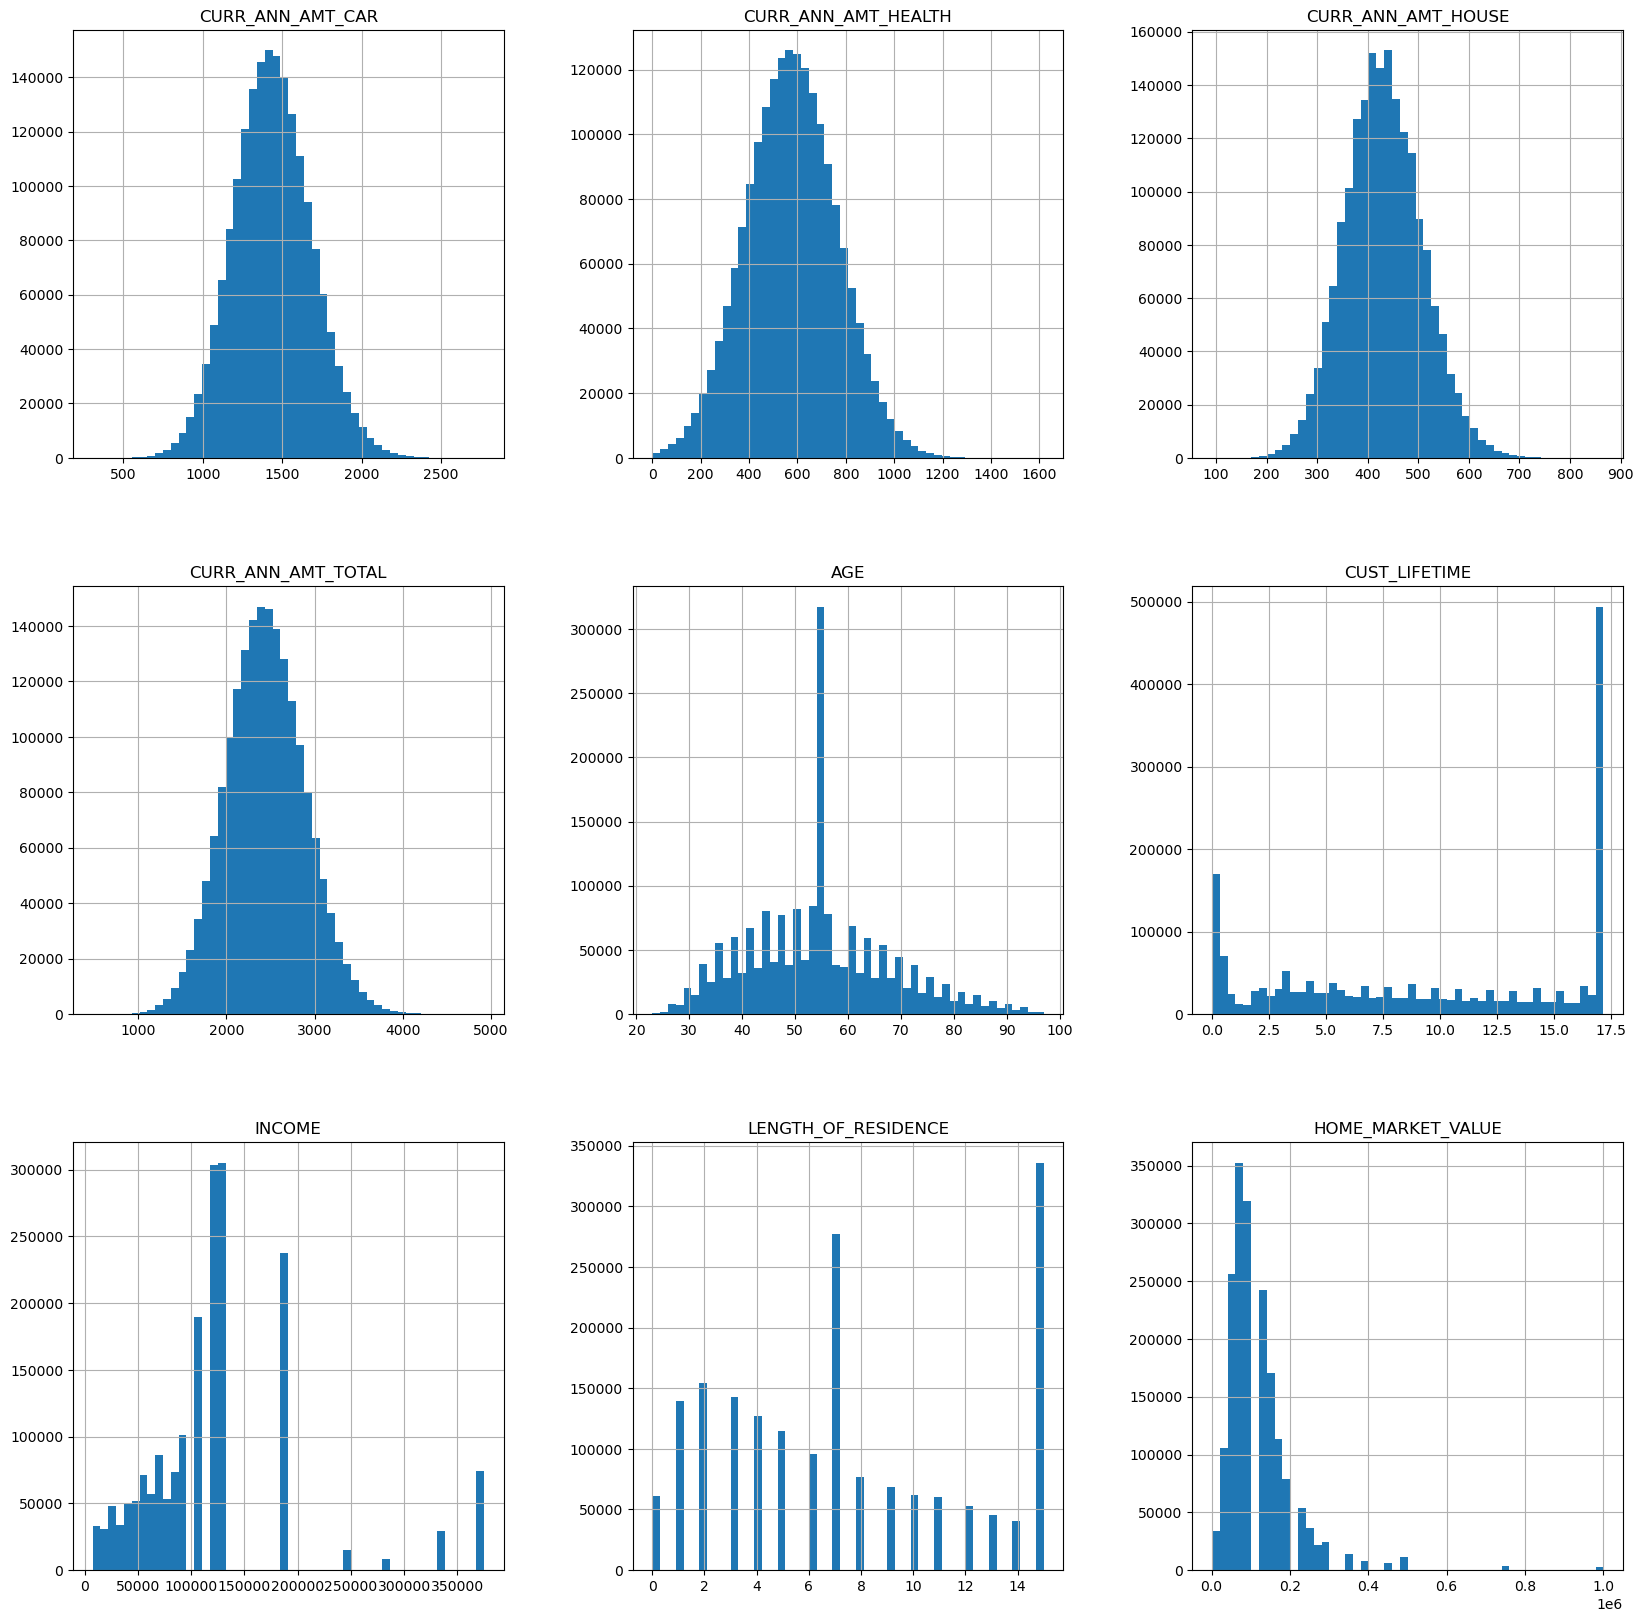

In [86]:
features = ['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'CURR_ANN_AMT_TOTAL', 'AGE',
             'CUST_LIFETIME', 'INCOME', 'LENGTH_OF_RESIDENCE', 'HOME_MARKET_VALUE']
df_combined[features].hist(figsize=(20, 20), bins=50)

<Axes: >

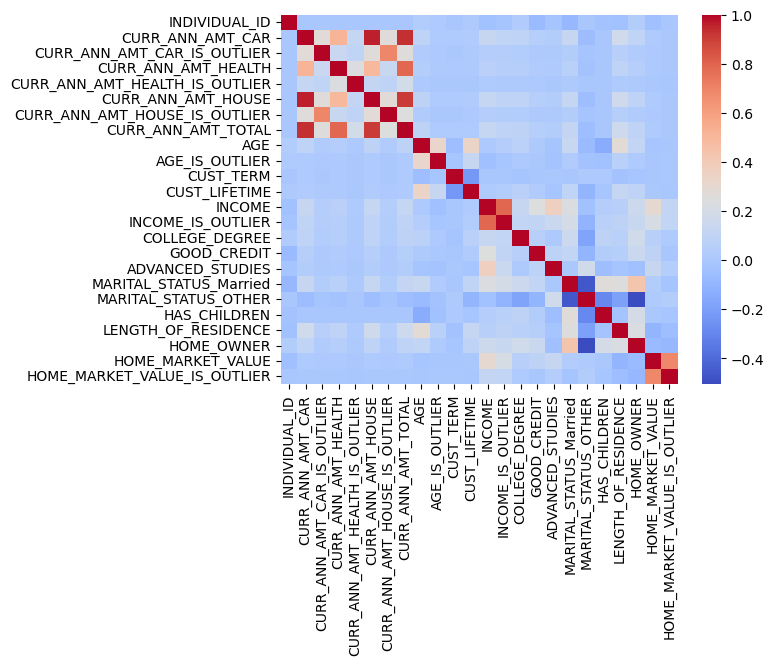

In [87]:
# heatmap
sns.heatmap(df_combined.corr(), annot = False, cmap="coolwarm")

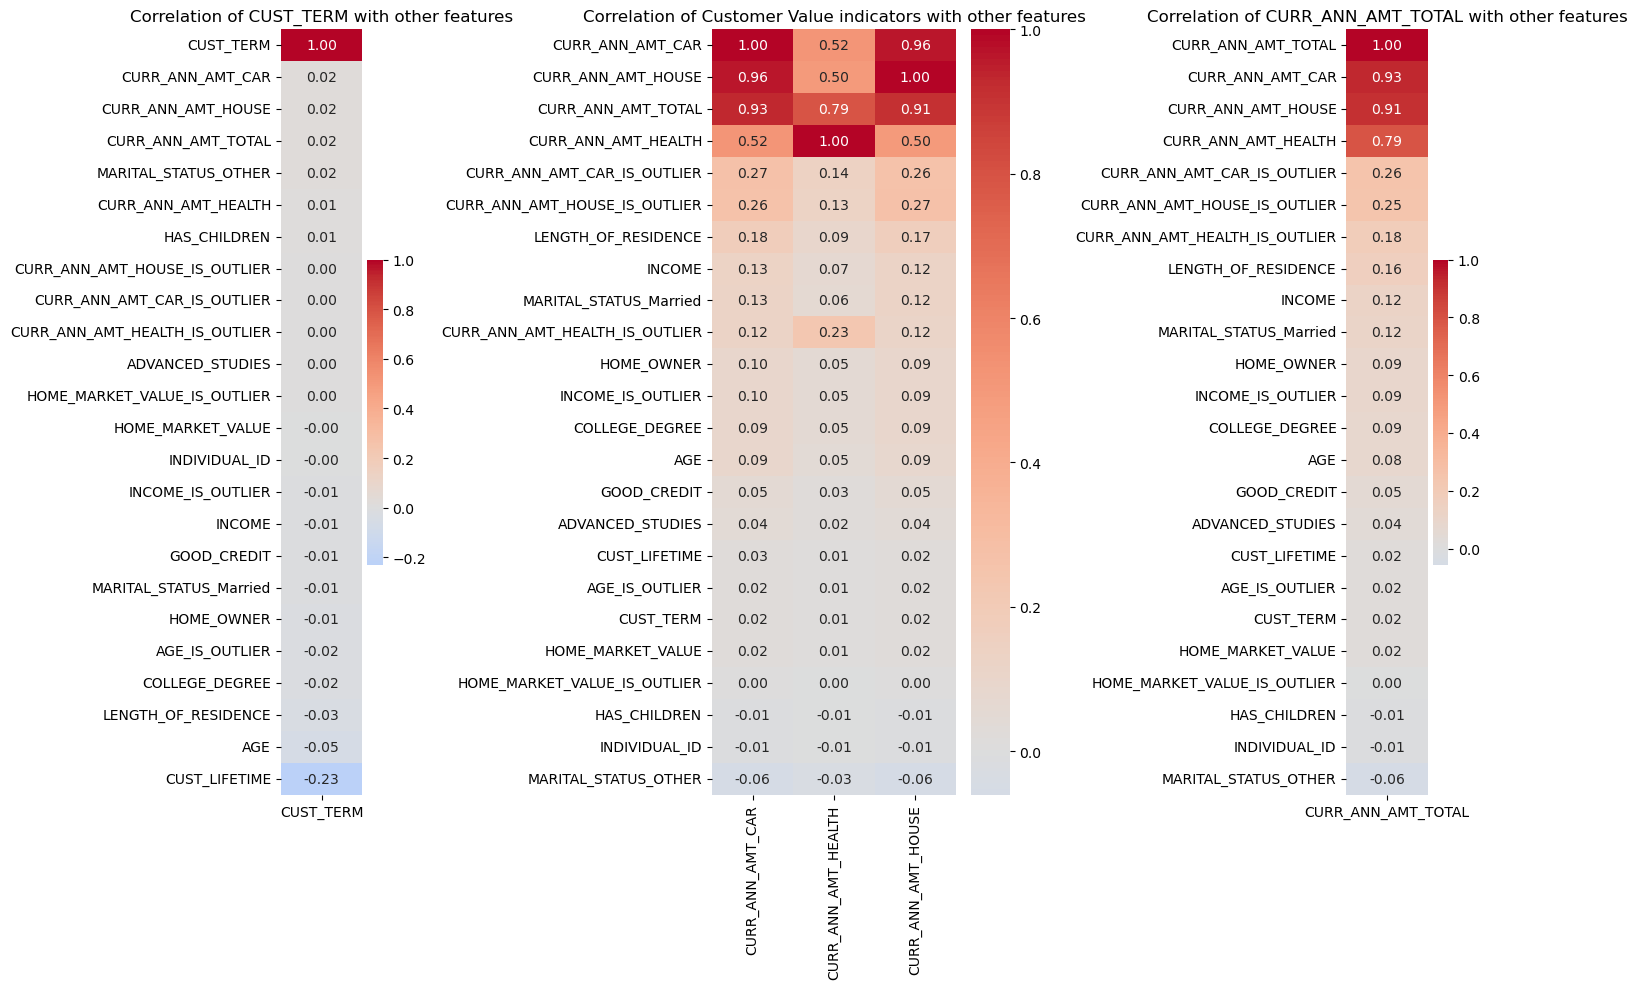

In [88]:
feature_of_interest_1 = "CUST_TERM"
feature_of_interest_2 = ["CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"]
feature_of_interest_3 = "CURR_ANN_AMT_TOTAL"

# Isolate the correlations of the feature of interest with all other features
feature_corr_1 = df_combined.corr()[[feature_of_interest_1]].sort_values(by=feature_of_interest_1, ascending=False)
feature_corr_2 = df_combined.corr()[feature_of_interest_2].sort_values(by=feature_of_interest_2, ascending=False)
feature_corr_3 = df_combined.corr()[[feature_of_interest_3]].sort_values(by=feature_of_interest_3, ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 3, 1]})
sns.heatmap(feature_corr_1, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=axes[0])
sns.heatmap(feature_corr_2, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=axes[1])
sns.heatmap(feature_corr_3, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=axes[2])

# Set title
axes[0].set_title(f"Correlation of {feature_of_interest_1} with other features")
axes[1].set_title(f"Correlation of Customer Value indicators with other features")
axes[2].set_title(f"Correlation of {feature_of_interest_3} with other features")

# Adjust the layout
plt.tight_layout()

plt.show()

Based on the histograms and correlation matrix above:

1. The binary features from `df_demographics_clean` seem to have varying degrees of association with the numerical features from `df_customer_clean`. Notably, `COLLEGE_DEGREE`, `GOOD_CREDIT`, and `ADVANCED_STUDIES` appear to have positive correlations (but low) with `CURR_ANN_AMT_TOTAL`, indicating that individuals with higher education or good credit might have higher total annual amounts. The marital status categories show some correlation with the `CURR_ANN_AMT_HOUSE`, possibly suggesting that marital status could influence the annual amount spent on housing. Being a `HOME_OWNER` also shows a correlation (but low) with `CURR_ANN_AMT_HOUSE` and `CURR_ANN_AMT_TOTAL`, which is intuitive as homeowners might have higher associated costs.

2. The binary features' impact on CUST_TERM is not very pronounced, suggesting that factors such as having children or being a homeowner do not significantly influence customer termination directly.

3. There is no substantial correlation between the numerical features related to customers' annual spending and the `CUST_TERM` variable. This observation suggests that higher or lower spending in these categories is not a strong predictor of contract termination.

### Main data insights connected to the business-case


The analysis of ABC Insurance's customer data offers actionable insights for reversing the trend in customer churn and boosting customer lifetime value. It's clear that the interconnection between car and house-related expenses among our customers is not just coincidental but indicative of a segment with specific lifestyle and financial priorities. This discovery opens the door for ABC Insurance to craft bundled or cross-sell opportunities that resonate more deeply with our customers' needs, thereby enhancing our value proposition and cementing customer loyalty. Moreover, the identified anomalies and patterns in customer demographics, particularly around acquisition dates, signal a pressing need to refine our data management practices and customer engagement strategies. By addressing these data integrity issues and dissecting the underlying factors contributing to periods of high churn, we can sharpen our approach to customer acquisition and retention.

Furthermore, the insights into demographic characteristics—highlighting the significant impact of factors like education, income, homeownership, and marital status on customer behavior—equip us to tailor our marketing and product development efforts more precisely. Recognizing that younger customers represent a higher churn risk necessitates a strategic shift to develop offerings that align with their evolving preferences and lifestyles. By leveraging these insights to design targeted marketing campaigns and loyalty programs, especially for our more stable and engaged segments such as educated, high-income, married homeowners, ABC Insurance stands to not only reduce churn but also to significantly increase customer lifetime value. This data-driven approach will ensure we remain competitive and responsive to our customers' needs, ultimately securing our position as a market leader in the insurance industry.

Note: There are many more insights, but I was limited to 2 paragraphs. Most of the insights, however, are in the EDA itself already.

## Predictive Modeling estimate Costumer Value

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

In [92]:
# imports for this part
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import uniform, loguniform
from sklearn.pipeline import Pipeline

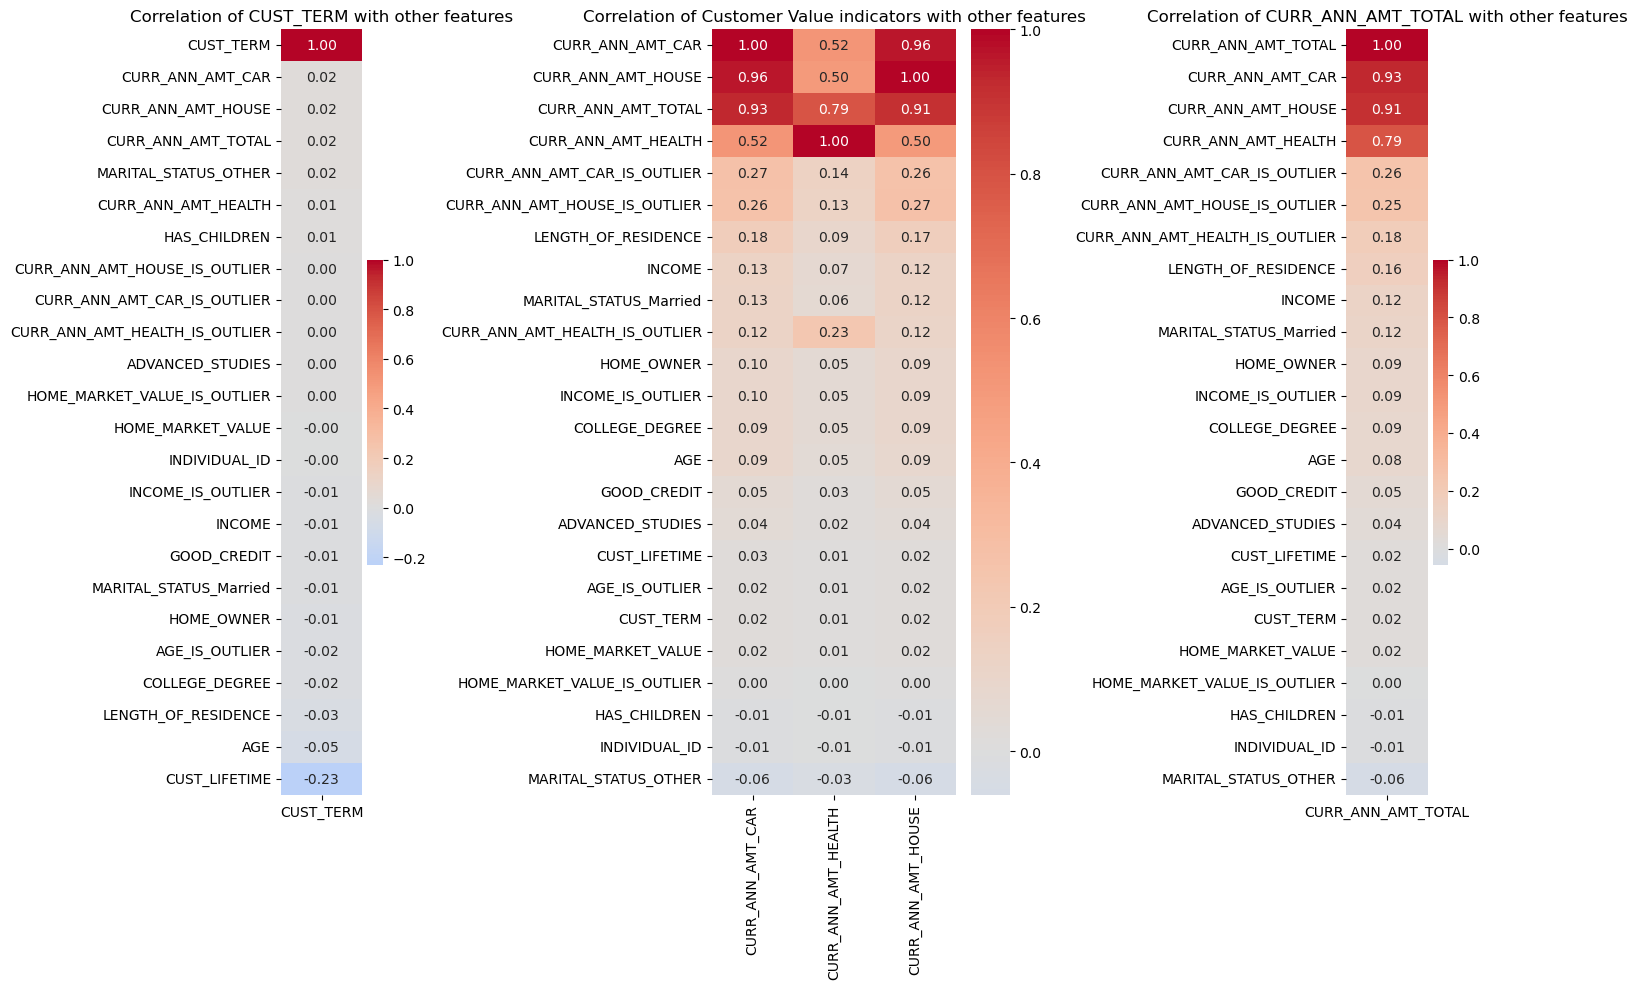

In [93]:
# Simply as a reminder 

feature_of_interest_1 = "CUST_TERM"
feature_of_interest_2 = ["CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"]
feature_of_interest_3 = "CURR_ANN_AMT_TOTAL"

# Isolate the correlations of the feature of interest with all other features
feature_corr_1 = df_combined.corr()[[feature_of_interest_1]].sort_values(by=feature_of_interest_1, ascending=False)
feature_corr_2 = df_combined.corr()[feature_of_interest_2].sort_values(by=feature_of_interest_2, ascending=False)
feature_corr_3 = df_combined.corr()[[feature_of_interest_3]].sort_values(by=feature_of_interest_3, ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 3, 1]})
sns.heatmap(feature_corr_1, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=axes[0])
sns.heatmap(feature_corr_2, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=axes[1])
sns.heatmap(feature_corr_3, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=axes[2])

# Set title
axes[0].set_title(f"Correlation of {feature_of_interest_1} with other features")
axes[1].set_title(f"Correlation of Customer Value indicators with other features")
axes[2].set_title(f"Correlation of {feature_of_interest_3} with other features")

# Adjust the layout
plt.tight_layout()

plt.show()

#### Baseline model to estimate the costumer value based on their characteristics.

<u> Feature selection with domain knowledge </u>

- As I use the `CURR_ANN_AMT_TOTAL` as a target variable, which is the sum of `CURR_ANN_AMT_CAR`, `CURR_ANN_AMT_HEALTH`, and `CURR_ANN_AMT_HOUSE`, I cannot use those columns nor the respective `..._IS_OUTLIER`column as a feature. 

- It is obvious that `ÌNDIVIDUAL_ID` cannot be a feature either.

- Customers that terminated cannot be the most valuable customers anymore. Thus, I will exclude those rows where `CUST_TERM`= 1 from this analysis. Thus, the column itself can also be dropped.

This would, however, still result into 16 features (target included), which is too much. Thus, I look at the heatmap above and select those features, with an absolute value of correlation to the target > 5%. Those features are:
- AGE_IS_OUTLIER
- CUST_LIFETIME
- GOOD_CREDIT
- ADVANCED_STUDIES
- HAS_CHILDREN
- HOME_MARKET_VALUE
- HOME_MARKET_VALUE_IS_OUTLIER

I, however, believe that `HOME_MARKET_VALUE` might be very useful. Thus, I keep including it in my feature space for further analysis.


In [94]:
df_reg = df_combined[df_combined.CUST_TERM == 0]

no_features = ["INDIVIDUAL_ID", "CURR_ANN_AMT_CAR", "CURR_ANN_AMT_CAR_IS_OUTLIER", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HEALTH_IS_OUTLIER", "CURR_ANN_AMT_HOUSE",
                "CURR_ANN_AMT_HOUSE_IS_OUTLIER", "CUST_TERM", "AGE_IS_OUTLIER", "CUST_LIFETIME", "GOOD_CREDIT", "ADVANCED_STUDIES", "HAS_CHILDREN", "HOME_MARKET_VALUE_IS_OUTLIER"]
df_reg = df_reg.drop(columns=no_features)
df_reg.columns

Index(['CURR_ANN_AMT_TOTAL', 'AGE', 'INCOME', 'INCOME_IS_OUTLIER',
       'COLLEGE_DEGREE', 'MARITAL_STATUS_Married', 'MARITAL_STATUS_OTHER',
       'LENGTH_OF_RESIDENCE', 'HOME_OWNER', 'HOME_MARKET_VALUE'],
      dtype='object')

My baseline model is a multivariate linear regression that employs a *SGDRegressor*, i.e., *Stochastic Gradient Descent*, with *Elastic Net* regularization to predict the `CURR_ANN_AMT_TOTAL` variable, which is simply the sum of all individual amounts, i.e., `CURR_ANN_AMT_CAR`, `CURR_ANN_AMT_HOUSE`, and `CURR_ANN_AMT_HOUSE`, focusing on balancing feature selection and preventing overfitting. It preprocesses the data by filtering binary features for low variance and standardizing all features, crucial steps for optimizing SGD's performance. The model utilizes *RandomizedSearchCV* for hyperparameter tuning and cross-validation, ensuring the selection of optimal parameters while estimating generalization error. Finally, it assesses performance using the *mean squared error* on both cross-validated training data and an unseen test set, providing a comprehensive view of its predictive accuracy.

In [96]:
y = df_reg["CURR_ANN_AMT_TOTAL"]
# X is the feature matrix including all columns except the target
X = df_reg.drop(columns=["CURR_ANN_AMT_TOTAL"])

# Identify binary columns
binary_columns = [col for col in X.columns if X[col].dropna().value_counts().index.isin([0, 1]).all()]

# Separate binary columns from the rest
X_binary = X[binary_columns]
X_non_binary = X.drop(columns=binary_columns)

# Apply VarianceThreshold on binary features
selector = VarianceThreshold(threshold=0.01) # Adjust threshold as needed
X_binary_selected = selector.fit_transform(X_binary)

# Convert the result back to DataFrame (optional, for merging)
X_binary_selected_df = pd.DataFrame(X_binary_selected, columns=np.array(binary_columns)[selector.get_support()])

# Merge back with non-binary features
X_final = pd.concat([X_non_binary.reset_index(drop=True), X_binary_selected_df.reset_index(drop=True)], axis=1)

print(X_final.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42)

# Feature scaling for better performance of SGD
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model_reg1 = SGDRegressor(penalty="elasticnet", tol=1e-3, max_iter=1000, validation_fraction=0.2, random_state=42, loss="squared_error")

# Define the parameter space for the grid search
param_dist_reg1 = {
    "alpha": loguniform(1e-4, 1e0),  # Regularization strength
    "l1_ratio": uniform(0, 1),       # The ElasticNet mixing parameter, with 0<=l1_ratio<=1
    "eta0": loguniform(1e-4, 1e0)    # Learning rate
}

# Define RandomizedSearchCV
random_search_reg1 = RandomizedSearchCV(model_reg1, param_distributions=param_dist_reg1, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs = -1)

# Fit the model
random_search_reg1.fit(X_train_scaled, y_train)

# Best model after random search
best_model_reg1 = random_search_reg1.best_estimator_

# Perform cross-validation and calculate MSE
cv_scores_reg1 = cross_val_score(best_model_reg1, X_train_scaled, y_train, cv=5, scoring="neg_mean_squared_error", n_jobs = -1)
mse_scores_reg1 = -cv_scores_reg1  # Convert to positive mean squared error
mean_mse_cv_reg1 = np.mean(mse_scores_reg1)
print(f"Cross-validation MSE: {mean_mse_cv_reg1}")

# Make predictions using the best model
y_pred_reg1 = best_model_reg1.predict(X_test_scaled)

# Calculate the mean squared error on the test set
mse_test_reg1 = mean_squared_error(y_test, y_pred_reg1)
print(f"Test MSE: {mse_test_reg1}")

Index(['AGE', 'INCOME', 'LENGTH_OF_RESIDENCE', 'HOME_MARKET_VALUE',
       'INCOME_IS_OUTLIER', 'COLLEGE_DEGREE', 'MARITAL_STATUS_Married',
       'MARITAL_STATUS_OTHER', 'HOME_OWNER'],
      dtype='object')
Cross-validation MSE: 188911.86951278296
Test MSE: 188475.5186489322


The cross-validation MSE of 188911.87 and the test MSE of 188475.52 indicate that the model has a consistent performance between training (cross-validation) and testing phases, suggesting good generalization. However, the magnitude of the MSE suggests that the model's predictions are, on average, around 434.74 units (the square root of MSE) away from the actual values. This is not a a good result, as this hinders from predicting accurately the most valuable customer. Nevertheless, based on the dataset, this result is not unexpected, as it is based on a dataset that does not has high data quality, as established in the EDA: Garbage in - garbage out.

Note: The feature selection with the variance-threshold, did not deselect any features.

<Figure size 3000x500 with 0 Axes>

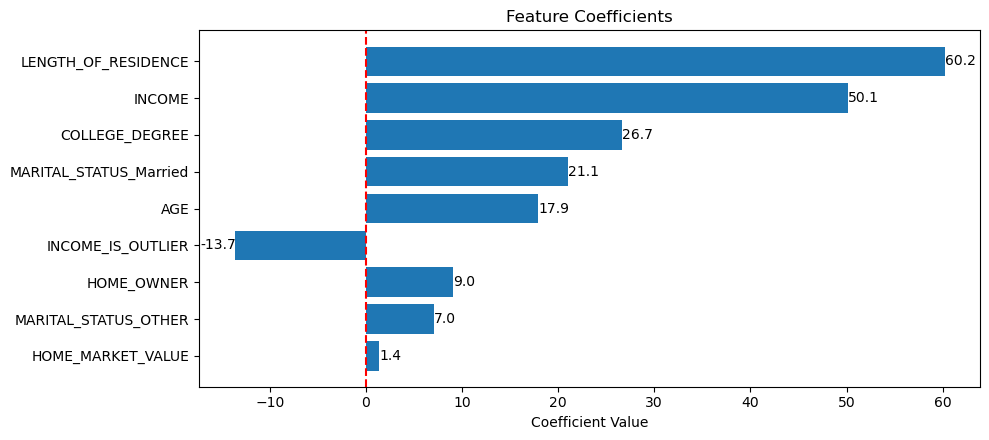

In [98]:
# defining size of the plot
plt.figure(figsize=(30, 5))

# Extract feature names and coefficients
feature_names_reg1 = X_final.columns 
coefficients_reg1 = best_model_reg1.coef_

# Create a DataFrame to hold feature names and their corresponding coefficients
coef_df_reg1 = pd.DataFrame({'Feature': feature_names_reg1, 'Coefficient': coefficients_reg1})

# Sort the DataFrame by the absolute values of the coefficients to highlight the most influential features
coef_df_reg1 = coef_df_reg1.reindex(coef_df_reg1.Coefficient.abs().sort_values(ascending=True).index)

# Plotting
plt.figure(figsize=(10, len(coef_df_reg1) / 2))  # Adjust figure size as needed
bars = plt.barh(coef_df_reg1['Feature'], coef_df_reg1['Coefficient'])
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients')

# Add labels to each bar
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width > 0 else width - 3.6
    plt.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.1f}', va='center')

plt.tight_layout()
plt.show()


This chart showing the coefficients of the features highlights that `LENGTH_OF_RESIDENCE` and `INCOME` have the strongest positive influence on the model's predictions, which was predictable as those were the features with the highest correlation to the target. `INCOME_IS_OUTLIER`, on the other hand, notably decreases them, even though it had a positive correlation of 0.09 to the target `CURR_ANN_AMT_TOTAL`. `HOME_MARKET_VALUE` has a marginal positive effect, suggesting it's less significant in this context, as expected.

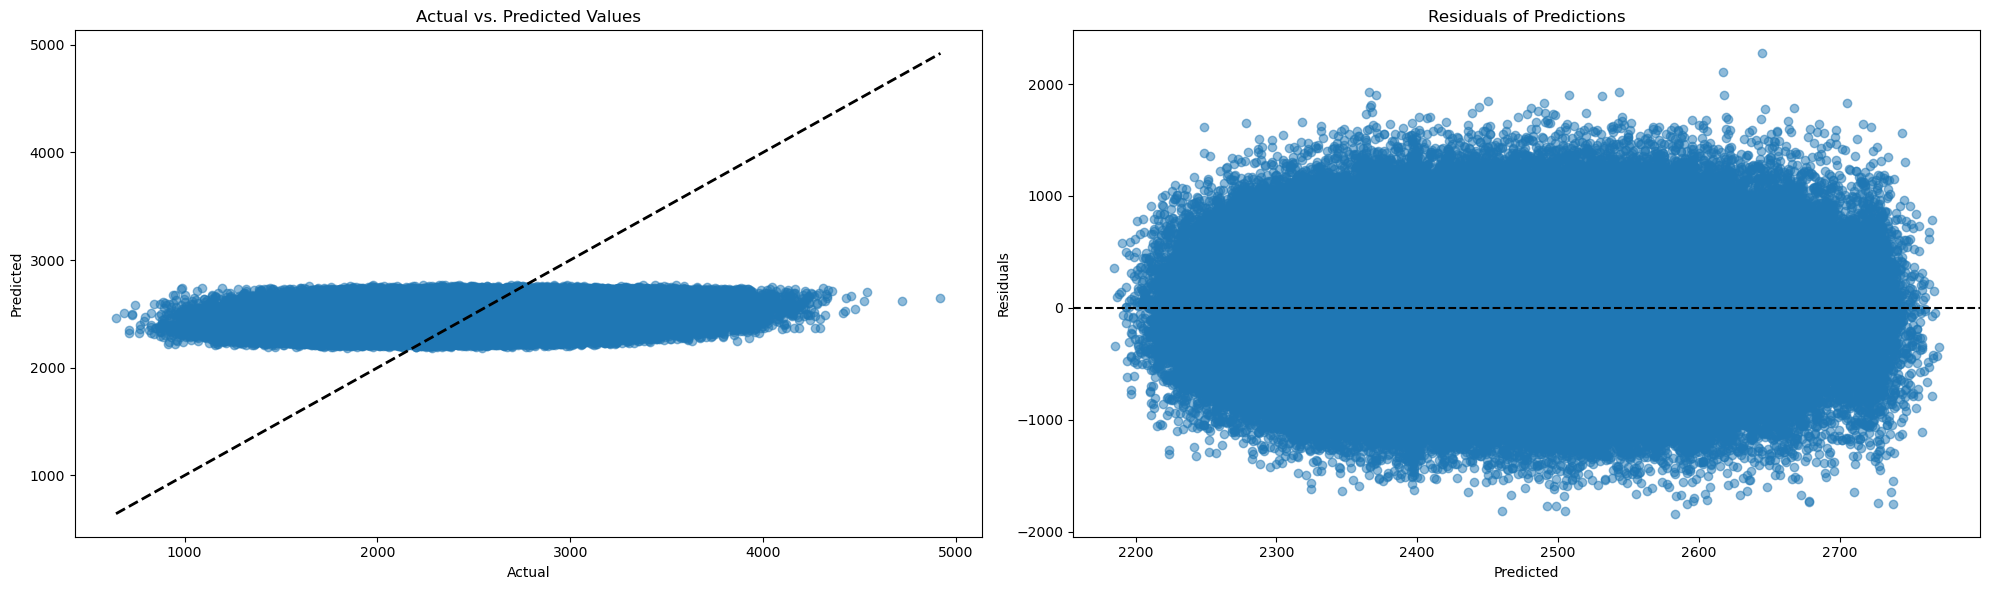

In [99]:
# Setup for side-by-side plots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))

# Actual vs. Predicted values plot
axs[0].scatter(y_test, y_pred_reg1, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line for reference
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')
axs[0].set_title('Actual vs. Predicted Values')

# Residuals plot
residuals = [a - b for a, b in zip(y_test, y_pred_reg1)]
axs[1].scatter(y_pred_reg1, residuals, alpha=0.5)
axs[1].axhline(y=0, color='k', linestyle='--')
axs[1].set_xlabel('Predicted')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals of Predictions')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

1. **Actual vs. Predicted Values Plot**: This plot shows the relationship between the actual values of the target variable and the values predicted by the model. Ideally, points should lie close to the diagonal line, indicating that the predictions are accurate across the range of the data.

2. **Residuals Plot**: This plot shows the residuals (errors) of the predictions against the predicted values. Ideally, residuals should be randomly scattered around the horizontal line at 0, indicating that the model's errors are distributed evenly and there's no systematic bias in predictions. Patterns or trends in this plot might indicate issues with the model, such as non-linearity, heteroscedasticity, or outliers.

================================================================================================================================================================================
*My observations*: <br>
The "*Actual vs. Predicted Values Plot*" - scatter plot indicates a concentration of predicted values around 2500 regardless of the actual values, suggesting that the baseline model has a consistent bias or variance issue and is not accurately predicting across the full range of actual values, as shown by the deviation from the dashed line representing perfect predictions. <br>
The residual plot shows a wide spread of residuals that does not center around zero, indicating a potential issue with heteroscedasticity or model misspecification, as the model's errors are not randomly distributed around the zero line.

#### Second model to estimate the costumer value based on their characteristics and comparison of model performances.

My next step, i.e. the second model, includes polynomial features of degree 2 and 3, which can significantly enhance the models ability to capture complex relationships between the features and the target variable. This step is particularly beneficial when the relationship between the independent variables and the dependent variable is not merely linear but involves higher-degree interactions.

To incorporate polynomial features of degree 2 and 3, I first transform my existing features to include their polynomial combinations and interactions. This process expands the feature space, allowing the linear model to fit a much more complex boundary.

However, it's important to proceed with caution: adding polynomial features increases the model's complexity and the risk of overfitting. To mitigate this, I ensure that my model includes regularization (as I already did in the baseline model with ElasticNet) and consider using cross-validation to select the optimal degree of polynomials and regularization parameters.

Overall, the approach is similar to the one demonstrated in the baseline model.

In [105]:
# Split the data into training and testing sets. Note: X_final and y are already defined in the baseline model
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.4, random_state=42)

# Define the pipeline
sgd_pipeline = Pipeline([
    ("poly", PolynomialFeatures(include_bias=False)),
    ("scaler", StandardScaler()),
    ("sgd", SGDRegressor(penalty="elasticnet", tol=1e-3, max_iter=1000, validation_fraction=0.2, random_state=42, loss="squared_error"))
])

# Define the parameter space for the grid search
param_dist_reg2 = {
    "poly__degree": [1, 2, 3],  # Degree of the polynomial features
    "sgd__alpha": loguniform(1e-4, 1e0),  # Regularization strength
    "sgd__l1_ratio": uniform(0, 1),  # The ElasticNet mixing parameter, with 0<=l1_ratio<=1
    "sgd__eta0": loguniform(1e-4, 1e0)  # Initial learning rate for the 'adaptive' schedule
}

# Define RandomizedSearchCV
random_search_reg2 = RandomizedSearchCV(sgd_pipeline, param_distributions=param_dist_reg2, n_iter=10, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=2)

# Fit the model
random_search_reg2.fit(X_train, y_train)  # Note: We fit on the original X_train, as the pipeline handles scaling

# Best model after random search
best_model_reg2 = random_search_reg2.best_estimator_

# Perform cross-validation and calculate MSE
cv_scores_reg2 = cross_val_score(best_model_reg2, X_train, y_train, cv=3, scoring="neg_mean_squared_error", n_jobs=-1)
mse_scores_reg2 = -cv_scores_reg2  # Convert to positive mean squared error
mean_mse_cv_reg2 = np.mean(mse_scores_reg2)
print(f"Cross-validation MSE: {mean_mse_cv_reg2}")

# Make predictions using the best model
y_pred_reg2 = best_model_reg2.predict(X_test)  # Note: We predict on the original X_test, as the pipeline handles scaling

# Calculate the mean squared error on the test set
mse_test_reg2 = mean_squared_error(y_test, y_pred_reg2)
print(f"Test MSE: {mse_test_reg2}")

Cross-validation MSE: 188779.90168857435
Test MSE: 188426.82124429452


After increasing the complexity and with it decreasing the interpretability of the model, I obtain a cross-validation MSE of 188779.9 and a test MSE of 188426.82. Comparing this to the cross-validation and test MSE (188898.15 and 188601.83, respectively) of the baseline multivariate regression model, the improvements in MSE offered by the polynomial regression are relatively minor. This marginal gain in accuracy does not justify the significant increase in complexity and the loss of interpretability associated with the polynomial model. The linear model, with its slightly higher MSE, provides a more straightforward, interpretable solution that is easier to explain and understand, making it more suitable for situations where model transparency is crucial. Furthermore, the simpler linear model is less prone to overfitting and likely to be more robust on unseen data, making it a more reliable choice for predicting new observations.

#### Suggestion of a model to the head of marketing based on the analysis

Based on the analysis, I would advise the head of marketing that while the baseline multivariate linear regression model is the preferred choice over the polynomial regression model due to its simplicity and interpretability, we must acknowledge that both models are significantly constrained by the quality of the underlying data. The phrase "garbage in, garbage out" is pertinent here; even the baseline model shows a considerable mean squared error, indicating a limitation in the data's ability to produce highly accurate predictions.

The linear model's performance is not optimal, but it remains the more practical option. It is transparent and less complex, making it suitable for drawing initial insights and informing basic marketing strategies. However, the head of marketing should be cautioned against relying heavily on the model's predictions for high-stakes decisions.

## Churn Analysis and Prevention Strategy

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

In [101]:
# Imports for this part
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

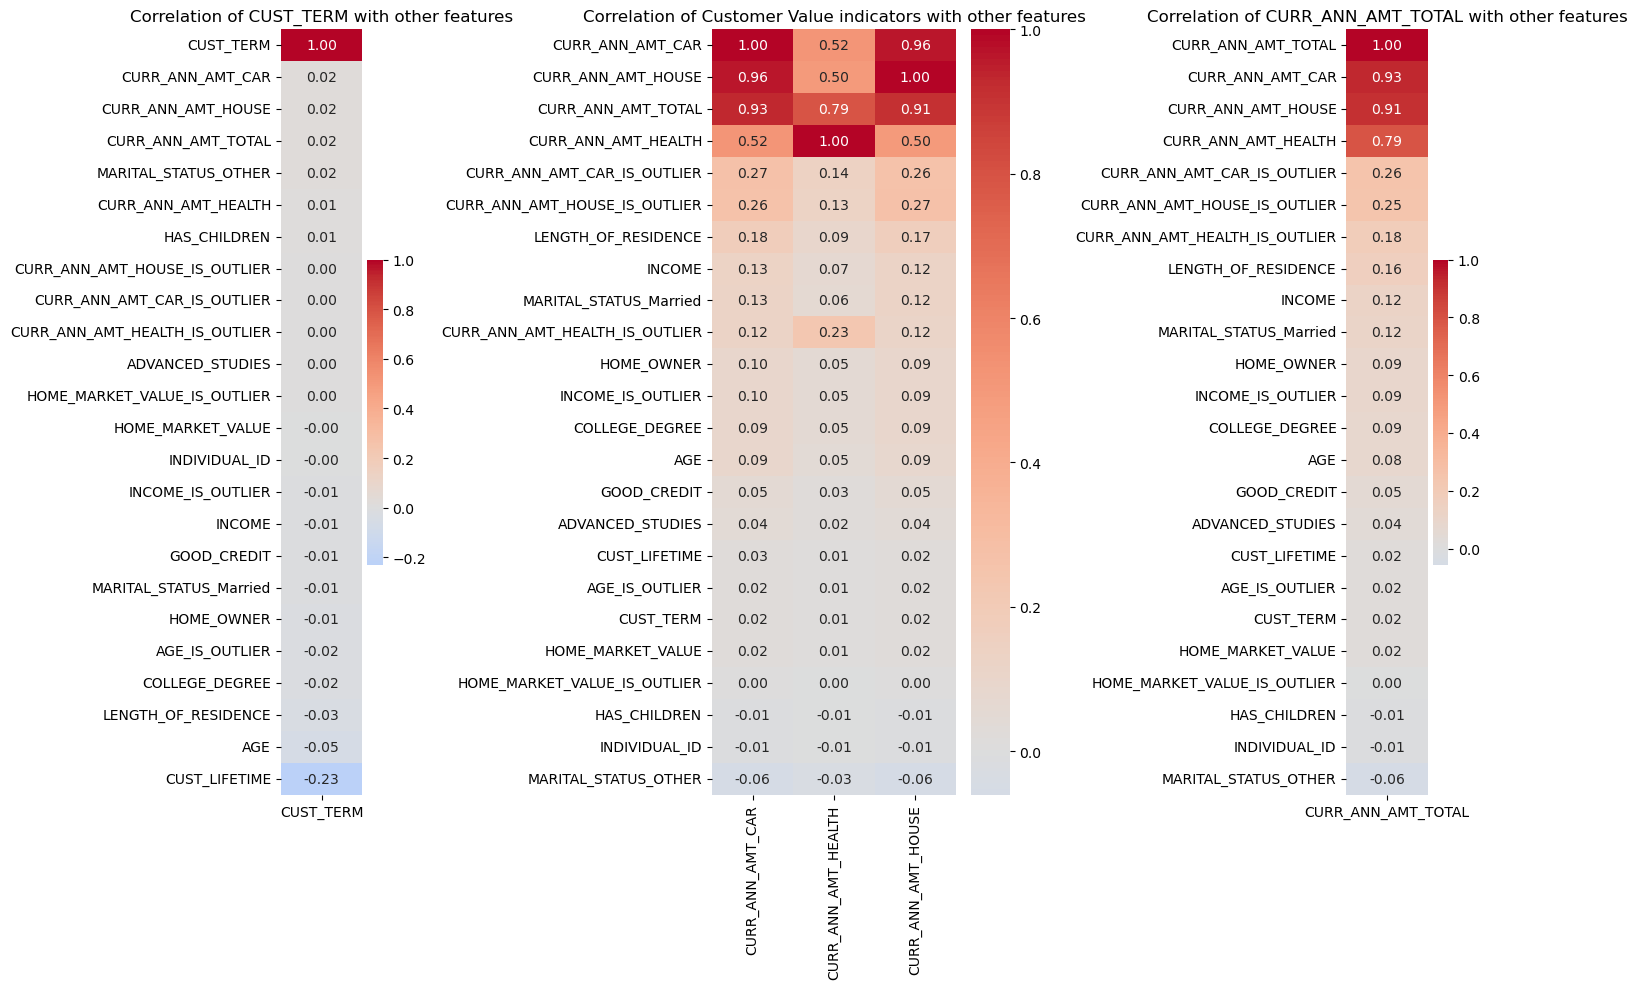

In [107]:
# Simply as a reminder 

feature_of_interest_1 = "CUST_TERM"
feature_of_interest_2 = ["CURR_ANN_AMT_CAR", "CURR_ANN_AMT_HEALTH", "CURR_ANN_AMT_HOUSE"]
feature_of_interest_3 = "CURR_ANN_AMT_TOTAL"

# Isolate the correlations of the feature of interest with all other features
feature_corr_1 = df_combined.corr()[[feature_of_interest_1]].sort_values(by=feature_of_interest_1, ascending=False)
feature_corr_2 = df_combined.corr()[feature_of_interest_2].sort_values(by=feature_of_interest_2, ascending=False)
feature_corr_3 = df_combined.corr()[[feature_of_interest_3]].sort_values(by=feature_of_interest_3, ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(15, 10), gridspec_kw={'width_ratios': [1, 3, 1]})
sns.heatmap(feature_corr_1, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=axes[0])
sns.heatmap(feature_corr_2, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=axes[1])
sns.heatmap(feature_corr_3, annot=True, cmap='coolwarm', center=0, fmt=".2f", ax=axes[2])

# Set title
axes[0].set_title(f"Correlation of {feature_of_interest_1} with other features")
axes[1].set_title(f"Correlation of Customer Value indicators with other features")
axes[2].set_title(f"Correlation of {feature_of_interest_3} with other features")

# Adjust the layout
plt.tight_layout()

plt.show()

#### Baseline model to predict customers that will churn

As we do not have time-series data, I will use the binary column `CUST_TERM` as the target variable for this task. Thus, this model will be a classification model, trying to identify if a customer will churn or not. 

In [108]:
df_combined.CUST_TERM.value_counts()

0    1638339
1     214577
Name: CUST_TERM, dtype: int64

My baseline model uses a SGDClassifier with a pipeline that standardizes features, applies L1 regularization for feature selection, and then predicts customer churn with Elastic Net regularization to balance between feature importance and model complexity. The inclusion of `stratify = y"` is crucial, as my target variable `CUST_TERM`is highly imbalanced and the train and test set should have a similar distribution. <br>
The use of `RandomizedSearchCV` with cross-validation optimizes hyperparameters and validates the model's performance, ensuring that the model generalizes well to unseen data while the `neg_log_loss` scoring provides a robust metric considering the probability estimates of class membership. Overall, this approach is similar to the regression approach above but as a classification model.

In [102]:
# Define the target variable and the feature matrix
y = df_combined["CUST_TERM"]
X = df_combined.drop(columns=["CUST_TERM", "INDIVIDUAL_ID"])

# Identify binary columns
binary_columns = [col for col in X.columns if X[col].dropna().value_counts().index.isin([0, 1]).all()]

# Separate binary columns from the rest
X_binary = X[binary_columns]
X_non_binary = X.drop(columns=binary_columns)

# Apply VarianceThreshold on binary features
selector = VarianceThreshold(threshold=0.01)
X_binary_selected = selector.fit_transform(X_binary)

# Convert the result back to DataFrame
X_binary_selected_df = pd.DataFrame(X_binary_selected, columns=np.array(binary_columns)[selector.get_support()])

# Merge back with non-binary features
X_final = pd.concat([X_non_binary.reset_index(drop=True), X_binary_selected_df.reset_index(drop=True)], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=42, stratify=y)

# Define the pipeline with SGDClassifier
sgd_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("feature_selection", SelectFromModel(SGDClassifier(loss="log_loss", penalty="l1", max_iter=1000, random_state=42))),
    ("sgd", SGDClassifier(loss="log_loss", penalty="elasticnet", max_iter=1000, random_state=42))
])

# Define the parameter space for the grid search
param_dist_sgd = {
    "sgd__alpha": loguniform(1e-4, 1e0),  # Regularization strength
    "sgd__l1_ratio": uniform(0, 1),  # The ElasticNet mixing parameter, with 0<=l1_ratio<=1
    "sgd__eta0": loguniform(1e-4, 1e-1)  # Learning rate
}

# Define RandomizedSearchCV
random_search_sgd = RandomizedSearchCV(sgd_pipeline, param_distributions=param_dist_sgd, n_iter=10, cv=5, scoring="neg_log_loss", random_state=42, n_jobs=-1)

# Fit the model
random_search_sgd.fit(X_train, y_train)

# Best model after random search
best_model_sgd = random_search_sgd.best_estimator_

# Perform cross-validation and calculate accuracy (or log loss for more insight into performance)
cv_scores_sgd = cross_val_score(best_model_sgd, X_train, y_train, cv=5, scoring="neg_log_loss", n_jobs=-1)
mean_cv_accuracy = - np.mean(cv_scores_sgd)
print(f"Cross-validation Accuracy: {mean_cv_accuracy:.2f}")

# Make predictions using the best model
y_pred = best_model_sgd.predict(X_test)

# Classification report
class_report = classification_report(y_test, y_pred, zero_division=0)
print("Classification Report:")
print(class_report)


Cross-validation Accuracy: 0.33
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94    491502
           1       0.00      0.00      0.00     64373

    accuracy                           0.88    555875
   macro avg       0.44      0.50      0.47    555875
weighted avg       0.78      0.88      0.83    555875



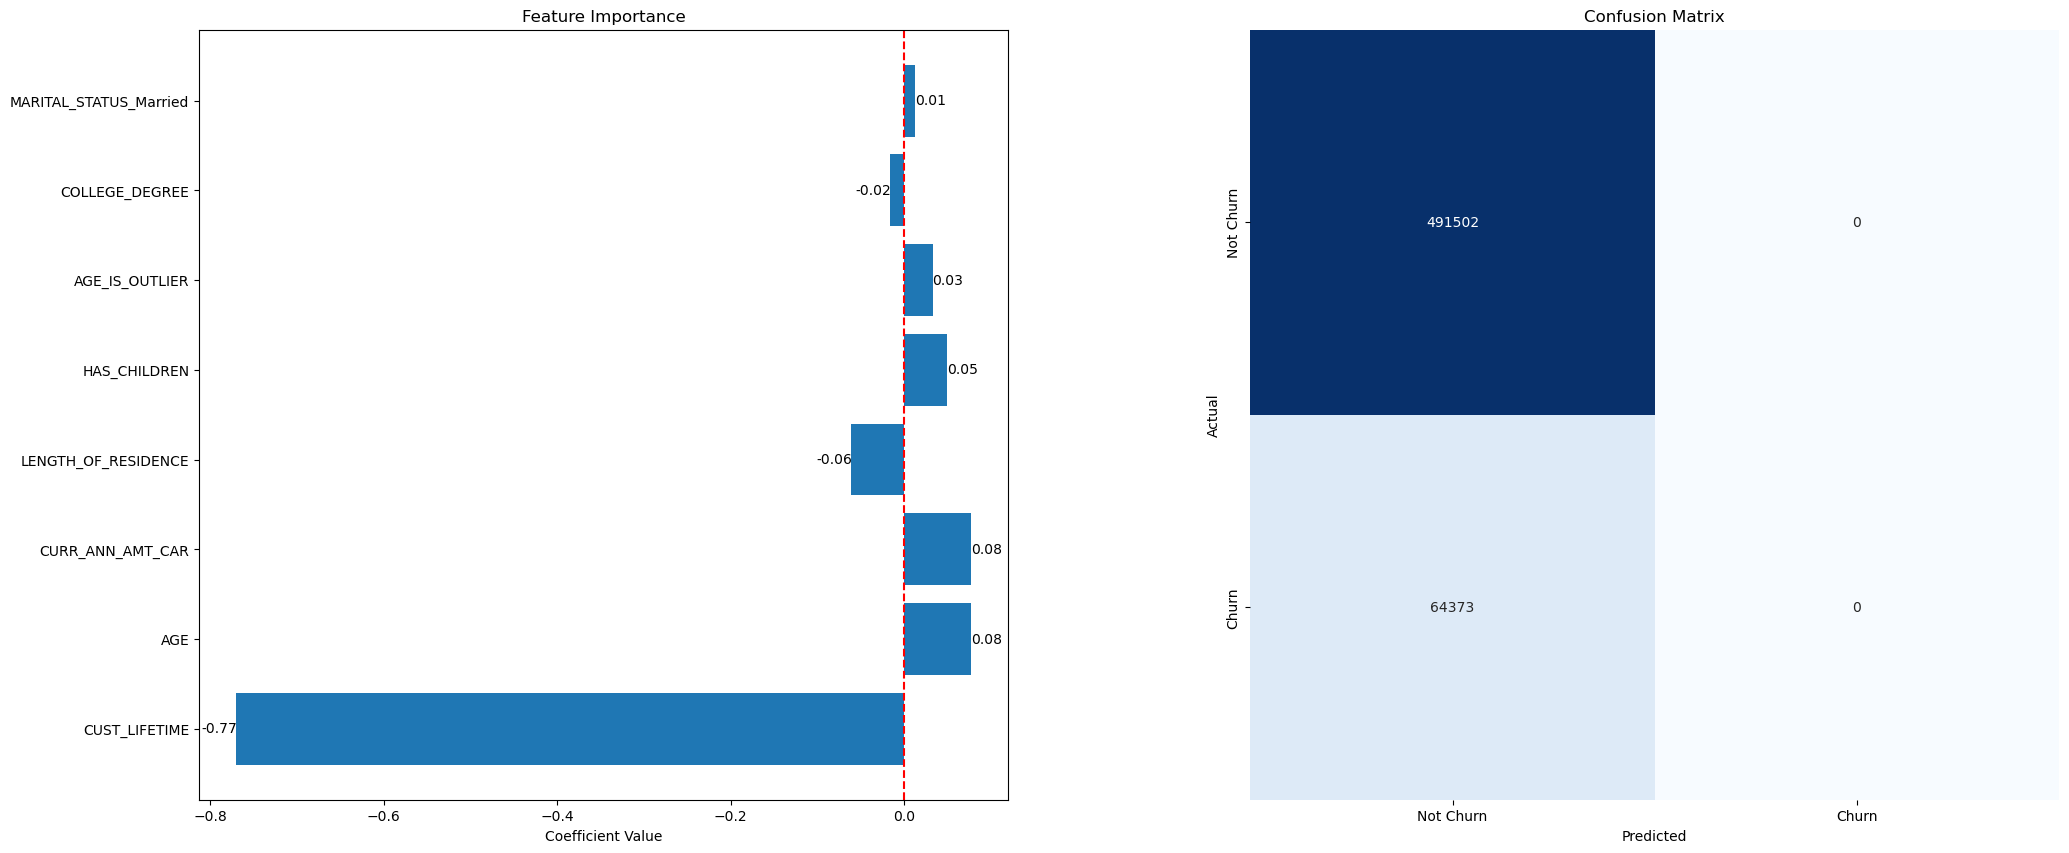

In [103]:
# Plot the coefficients and the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

selected_features_mask = best_model_sgd.named_steps['feature_selection'].get_support()
selected_feature_names = X_final.columns[selected_features_mask]

# Now selected_feature_names will correspond to the correct features
coef = best_model_sgd.named_steps['sgd'].coef_[0]
coef_df = pd.DataFrame({'Feature': selected_feature_names, 'Coefficient': coef})
coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

bars = ax[0].barh(coef_df['Feature'], coef_df['Coefficient'])
ax[0].axvline(x=0, color='red', linestyle='--')
for bar in bars:
    width = bar.get_width()
    label_x_pos = width if width > 0 else width - 0.04
    ax[0].text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')
ax[0].set_xlabel('Coefficient Value')
ax[0].set_title('Feature Importance')

# Plot the Confusion Matrix on the second subplot
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted')
ax[1].set_title('Confusion Matrix')

# Adjust layout
plt.subplots_adjust(wspace=0.3)  # Adjust this value to increase space between subplots

#plt.tight_layout()
plt.show()


The classification model presented is, frankly, ineffective and unsuitable for practical application. Despite the ostensibly high accuracy of 88%, this metric is misleading because the model has failed to identify any instances of the 'Churn' class—a critical flaw for a binary classification task aimed at churn prediction. The reported precision and recall for the 'Churn' class are 0.00, which means the model did not correctly predict any actual churn cases, rendering the high accuracy as practically meaningless. This indicates that the model is predicting 'Not Churn' for every single case, completely ignoring the minority class which is often the class of interest in churn prediction.

#### Second model and comparison of model performances.

My second model utilizes a RandomForestClassifier within a pipeline, avoiding the need for feature scaling typical of tree-based models. Hyperparameter tuning is executed via RandomizedSearchCV, offering an efficient way to optimize the model against cross-validation accuracy, balancing the trade-off between model complexity and performance. Just as in the previous model it is crucial to include `stratify = y`, because of the highly imbalanced target variable `CUST_TERM`.

In [104]:
# Define the target variable and the feature matrix
y = df_combined["CUST_TERM"]
X = df_combined.drop(columns=["CUST_TERM", "INDIVIDUAL_ID"])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Define the pipeline with RandomForestClassifier
rf_pipeline = Pipeline([("rf", RandomForestClassifier(n_estimators=100, random_state=42))])

# Define the parameter space for the grid search
param_dist_rf = {
    "rf__max_depth": [10, 20, 30, None],
    "rf__max_features": ['auto', 'sqrt'],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4],
    "rf__bootstrap": [True, False]
}

# Define RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf_pipeline, param_distributions=param_dist_rf, n_iter=10, cv=2, scoring="neg_log_loss", random_state=42, n_jobs=-1)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Best model after random search
best_model_rf = random_search_rf.best_estimator_

# Perform cross-validation
cv_scores_rf = cross_val_score(best_model_rf, X_train, y_train, cv=3, scoring="neg_log_loss", n_jobs=-1)
mean_cv_accuracy_rf = np.mean(cv_scores_rf)
print(f"Cross-validation Accuracy: {mean_cv_accuracy_rf:.2f}")

# Make predictions using the best model
y_pred_rf = best_model_rf.predict(X_test)

# Classification report
class_report_rf = classification_report(y_test, y_pred_rf, zero_division=0)
print("Classification Report:")
print(class_report_rf)

/Users/hendrik/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/hendrik/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/hendrik/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/hendrik/anaconda3/lib/python3.11/site-packages/sklearn/pipeline.py", li

Cross-validation Accuracy: -0.21
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96    655336
           1       0.97      0.45      0.62     85831

    accuracy                           0.94    741167
   macro avg       0.95      0.73      0.79    741167
weighted avg       0.94      0.94      0.92    741167



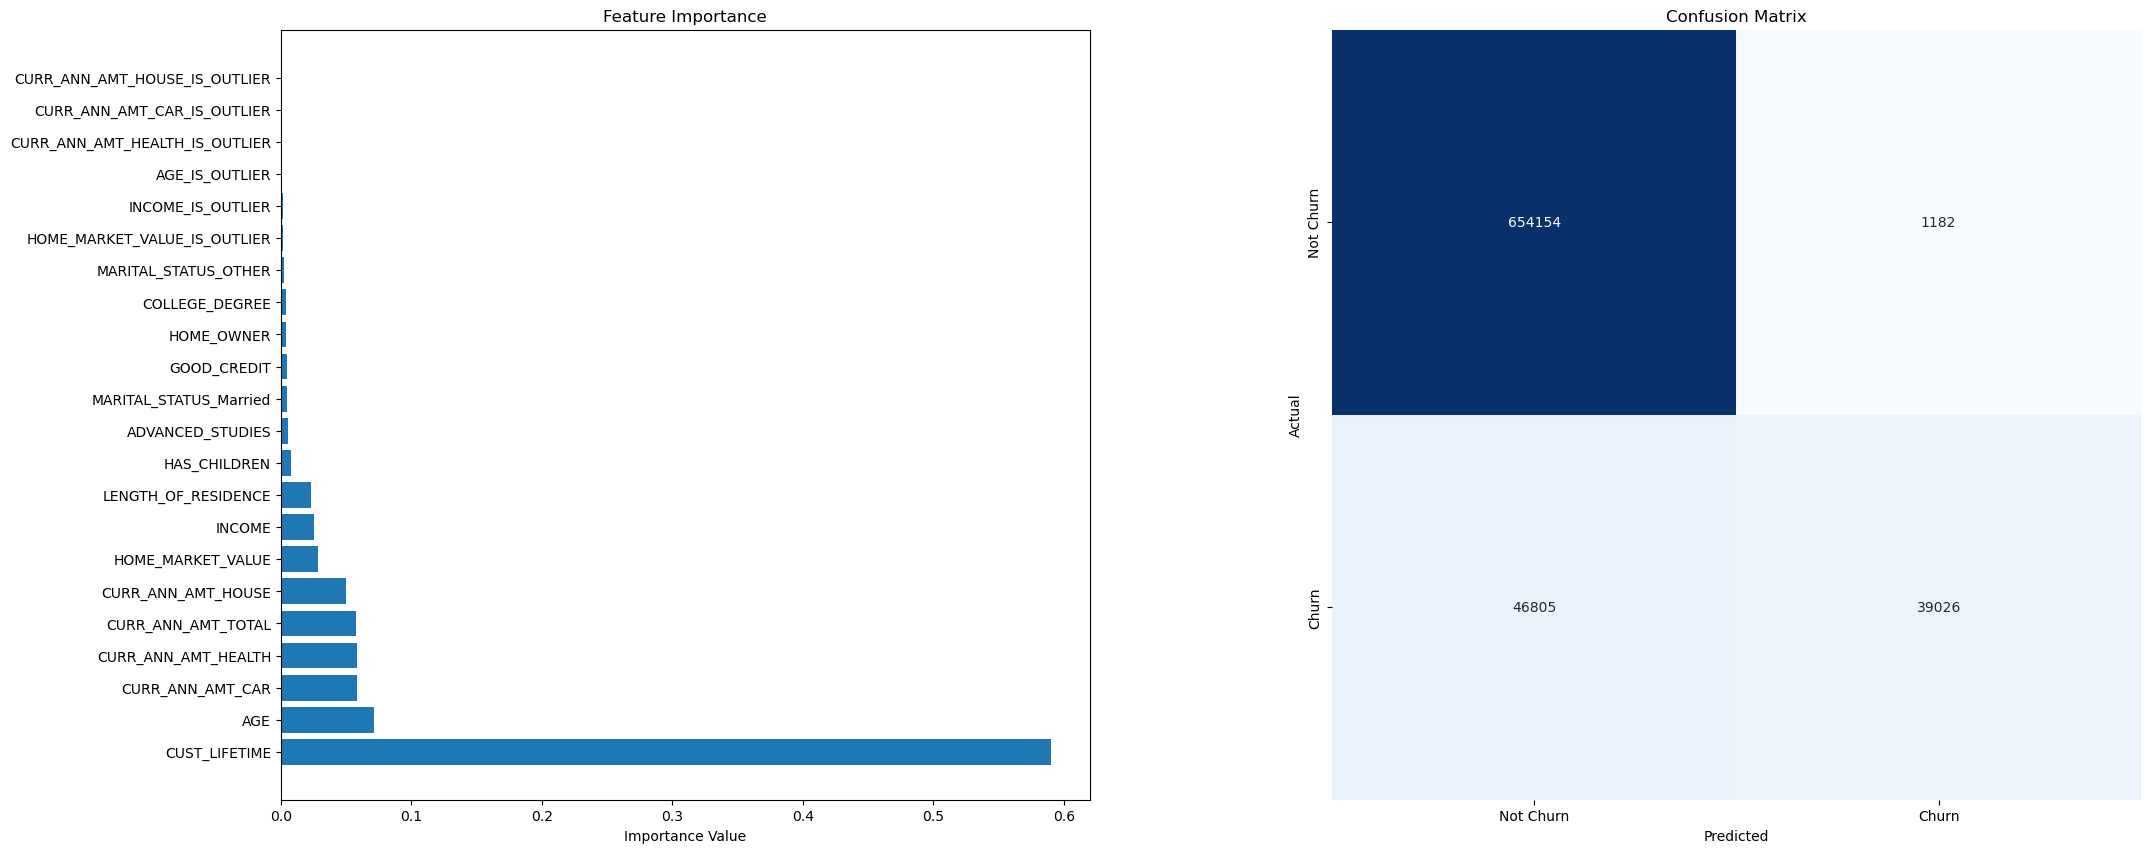

In [105]:
# Plot the feature importances and the confusion matrix
fig, ax = plt.subplots(1, 2, figsize=(24, 10))

# Random forest feature importances
feature_importances = best_model_rf.named_steps['rf'].feature_importances_
importances_df_rf = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importances_df_rf = importances_df_rf.sort_values(by='Importance', ascending=False)

# Plot Feature Importance on the first subplot
ax[0].barh(importances_df_rf['Feature'], importances_df_rf['Importance'])
ax[0].set_xlabel('Importance Value')
ax[0].set_title('Feature Importance')

# Plot the Confusion Matrix on the second subplot
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
ax[1].set_ylabel('Actual')
ax[1].set_xlabel('Predicted')
ax[1].set_title('Confusion Matrix')

# Adjust layout
plt.subplots_adjust(wspace=0.3)  # Adjust this value to increase space between subplots

plt.show()

The random forest model demonstrates a notable enhancement compared to the logistic regression model, with a precision of 0.93 for predicting non-churn and 0.97 for churn predictions. This high precision indicates the model's predictions are highly reliable. Nevertheless, the model's recall for churn at 0.45 shows that it correctly identifies 45% of the actual churn cases, missing a significant number of customers who do churn. The accuracy of the model is robust at 0.94, and the weighted average F1-score is 0.92, reflecting a strong overall performance. However, the value of the model is somewhat reduced by its inability to detect a considerable segment of churned customers. This limitation underscores the necessity for additional enhancements to improve the model's detection of churn, aiming to maintain its precision while increasing its recall, which would offer ABC Insurance a more potent instrument for proactively recognizing and mitigating customer attrition.

#### Suggestion of a model to the head of marketing based on the analysis

Between the two provided models for ABC Insurance, the random forest model is the preferable choice to present to the head of marketing. Although its recall for predicting churn is not perfect, it substantially outperforms the logistic regression model in identifying customers who are likely to churn. The random forest model has a recall of 0.46 for churn, meaning it correctly identifies 46% of the actual churn cases, compared to the logistic regression model which failed to correctly identify any churn cases.

The application scenario for the random forest model would be in creating a focused customer retention strategy. It would involve using the model's churn predictions to identify customers who are at a higher risk of leaving. The marketing team could then target these individuals with specific retention campaigns, such as personalized offers, loyalty incentives, or tailored communication, addressing the issues that might lead to their departure.

The justification for selecting the random forest model and this application scenario is as follows:

1. *Higher Sensitivity to Churn*: Despite not capturing all churn cases, the random forest model still provides actionable intelligence that the logistic regression model does not.

2. *High Precision*: The model has high precision for churn predictions, which means that the marketing campaigns can be highly targeted, reducing the risk of wasting resources on customers who are not at risk of churning.

3. *Balance of Metrics*: While not perfect, the random forest offers a more balanced suite of metrics (precision, recall, F1-score), indicating a more nuanced understanding of customer behavior patterns.

4. *Strategic Intervention*: The marketing department can use the model's predictions to take strategic actions that may directly reduce churn, thus potentially improving customer lifetime value and stabilizing the customer base.